Librerias que se requiere instalar

In [56]:
!pip install shap lime geopandas shapely folium xgboost "ipython<8.24" pandas matplotlib seaborn imbalanced-learn tensorflow scikeras "scikit-learn<1.6"


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Librerías de visualización y manipulación de datos

# Mostrar objetos (como DataFrames) de forma interactiva en notebooks (Jupyter)
from IPython.display import display
# Principal biblioteca para manipulación y análisis de datos estructurados (DataFrames)
import pandas as pd
# Biblioteca fundamental para operaciones numéricas, vectores, matrices, funciones estadísticas
import numpy as np
# Módulo de visualización tradicional (gráficos de líneas, barras, dispersión, etc.)
import matplotlib.pyplot as plt
# Biblioteca de visualización basada en matplotlib, con estilos más atractivos y funciones avanzadas
import seaborn as sns

# Preprocesamiento de datos
# Aplicar transformaciones como Box-Cox o Yeo-Johnson
from sklearn.preprocessing import PowerTransformer
# Normalización (MinMax) y estandarización (Z-score)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Codificador de variables categóricas (ordinales o nominales) a enteros
from sklearn.preprocessing import LabelEncoder

# Funciones matemáticas y estadísticas
# Módulo estándar de funciones matemáticas básicas
import math
# Extraer la función raíz cuadrada directamente para conveniencia
from math import sqrt
# Box-Cox para transformar variables
from scipy.stats import boxcox
# Tests estadísticos:
# - shapiro: normalidad
# - levene: homogeneidad de varianzas
# - f_oneway: ANOVA
# - kruskal: test no paramétrico
# - chi2_contingency: test de independencia para tablas de contingencia
from scipy.stats import shapiro, levene, f_oneway, kruskal, chi2_contingency

# Otras utilidades
# Generar todas las combinaciones posibles de elementos (usado para correlaciones en pares de variables)
from itertools import combinations

# Selector de características basado en varianza
# Eliminar automáticamente todas las columnas cuya varianza no alcance un cierto umbral
from sklearn.feature_selection import VarianceThreshold

# Dividir conjuntos de datos
# Función de scikit-learn para dividir datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

El primer paso en cualquier análisis es cargar los datos. Aquí se utilizará la librería "pandas" para leer un archivo CSV que contiene la información que se analizará. Esta operación es fundamental, ya que permite estructurar los datos en un *DataFrame*, lo que facilita su manipulación.

Antes de trabajar con los datos, es importante realizar una exploración inicial que permita conocer su forma, filas, columnas y estadísticas básicas. Esto ayuda a planificar los pasos posteriores del análisis. También es importante identificar el tipo de variables (numéricas o categóricas) para decidir qué transformaciones o análisis estadísticos se pueden aplicar posteriormente. Esta diferenciación es clave para procesos como la codificación, escalado o análisis de correlación.

In [7]:
# Ruta al archivo CSV con los datos (modifica según el nombre real de tu fichero)
dataSpecies = 'dataSpeciesES_completo_final.csv'

# Cargar los datos desde el archivo CSV y guardarlos en un DataFrame
data = pd.read_csv(dataSpecies)

# Mostrar el número de filas y columnas del dataset
print("Número de filas:", data.shape[0])
print("Número de columnas:", data.shape[1])

# Mostrar la información de cada variable (tipo y cantidad de entradas)
print("\nInformación sobre las variables")
data.info()

# Mostrar estadísticas descriptivas para las variables numéricas
print("\nEstadísticas descriptivas de las variables numéricas")
data.describe()

Número de filas: 137655
Número de columnas: 28

Información sobre las variables
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137655 entries, 0 to 137654
Data columns (total 28 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   species                             137655 non-null  object 
 1   scientificName                      137655 non-null  object 
 2   decimalLatitude                     137655 non-null  float64
 3   decimalLongitude                    137655 non-null  float64
 4   year                                137655 non-null  int64  
 5   populationTrend                     136528 non-null  object 
 6   systems                             137655 non-null  object 
 7   redlistCategory                     137655 non-null  object 
 8   iucnRedListCategory                 137655 non-null  object 
 9   BIO1_TemperaturaMediaAnual          137655 non-null  float64
 10  BIO2_RangoTe

decimalLatitude  decimalLongitude           year  \
count    137655.000000     137655.000000  137655.000000   
mean         40.001164         -3.235877    2018.131147   
std           2.409259          3.339514       5.504511   
min          27.637989        -18.120500    1999.000000   
25%          38.559017         -5.709303    2016.000000   
50%          40.246265         -3.658989    2020.000000   
75%          41.855186         -0.712218    2022.000000   
max          47.665100         27.800000    2024.000000   

       BIO1_TemperaturaMediaAnual  BIO2_RangoTempDiarioPromedio  \
count               137655.000000                 137655.000000   
mean                    14.086138                     10.920630   
std                      2.852736                      1.726942   
min                     -0.514667                      3.905555   
25%                     12.188833                      9.803667   
50%                     14.454166                     11.075000   
75%                     16.166857                     12.173667   
max                     22.695999                     15.314000   

       BIO3_Isotermalidad  BIO4_EstacionalidadTemp  BIO5_TempMaxMesMasCalido  \
count       137655.000000            137655.000000             137655.000000   
mean            39.789484               595.089025                 29.743837   
std              2.715504                91.730210                  3.477057   
min             28.957888               185.032532                 15.808000   
25%             38.036373               550.226501                 27.964001   
50%             39.662560               612.829895                 30.164000   
75%             41.403820               658.750732                 32.400002   
max             56.768154               909.376587                 43.344002   

       BIO6_TempMinMesMasFrio  BIO7_RangoTempAnual  ...  \
count           137655.000000        137655.000000  ...   
mean                 2.233832            27.510004  ...   
std                  3.224069             4.224798  ...   
min                -11.360000             8.900000  ...   
25%                  0.078000            25.195999  ...   
50%                  2.044000            28.276001  ...   
75%                  4.396000            30.504000  ...   
max                 15.100000            40.188004  ...   

       BIO10_TempMediaTrimestreCalido  BIO11_TempMediaTrimestreFrio  \
count                   137655.000000                 137655.000000   
mean                        21.828508                      7.353980   
std                          2.799544                      3.223390   
min                          8.220000                     -7.569333   
25%                         19.815332                      5.195000   
50%                         22.676666                      7.348667   
75%                         24.021334                      9.617392   
max                         34.118000                     18.633333   

       BIO12_PrecipitacionAnual  BIO13_PrecipitacionMesMasHumedo  \
count             137655.000000                    137655.000000   
mean                 598.832029                        81.665904   
std                  270.701019                        35.312604   
min                   38.000000                         6.000000   
25%                  419.000000                        55.000000   
50%                  532.000000                        76.000000   
75%                  663.000000                        95.000000   
max                 1980.000000                       306.000000   

       BIO14_PrecipitacionMesMasSeco  BIO15_EstacionalidadPrecipitacion  \
count                  137655.000000                      137655.000000   
mean                       16.805862                          42.813400   
std                        15.263002                          15.178943   
min                         0.000000                          11.

Es importante también conocer qué variables pudiesen tener valores nulos o registros duplicados y eliminar estas filas para prevenir distorsiones en el análisis. La presencia de filas duplicadas y de valores nulos puede afectar estadísticas descriptivas, modelos de predicción o análisis de correlación.

In [9]:
# Comprobar si hay valores nulos en el dataset
missing = data.isnull().sum().reset_index(name='n_missing').rename(columns={'index': 'Variable'})
print("Valores faltantes por variable")
display(missing)

# Eliminar las filas con valores faltantes
data = data.dropna()

# Eliminar las filas duplicadas si existen
data.drop_duplicates(inplace=True)

# Mostrar las dimensiones nuevas tras las eliminaciones de filas
print("Dimensiones tras eliminar filas con valores faltantes y/o duplicadas")
print("Número de filas:", data.shape[0])
print("Número de columnas:", data.shape[1])

Valores faltantes por variable


Variable  n_missing
0                              species          0
1                       scientificName          0
2                      decimalLatitude          0
3                     decimalLongitude          0
4                                 year          0
5                      populationTrend       1127
6                              systems          0
7                      redlistCategory          0
8                  iucnRedListCategory          0
9           BIO1_TemperaturaMediaAnual          0
10        BIO2_RangoTempDiarioPromedio          0
11                  BIO3_Isotermalidad          0
12             BIO4_EstacionalidadTemp          0
13            BIO5_TempMaxMesMasCalido          0
14              BIO6_TempMinMesMasFrio          0
15                 BIO7_RangoTempAnual          0
16       BIO8_TempMediaTrimestreHumedo          0
17         BIO9_TempMediaTrimestreSeco          0
18      BIO10_TempMediaTrimestreCalido          0
19        BIO11_TempMediaTrimestreFrio          0
20            BIO12_PrecipitacionAnual          0
21     BIO13_PrecipitacionMesMasHumedo          0
22       BIO14_PrecipitacionMesMasSeco          0
23   BIO15_EstacionalidadPrecipitacion          0
24  BIO16_PrecipitacionTrimestreHumedo          0
25    BIO17_PrecipitacionTrimestreSeco          0
26  BIO18_PrecipitacionTrimestreCalido          0
27    BIO19_PrecipitacionTrimestreFrio          0

Dimensiones tras eliminar filas con valores faltantes y/o duplicadas
Número de filas: 136528
Número de columnas: 28


A continuación, es importante comprobar que los registros de la variable "iucnRedListCategory" coinciden exactamente con la variable "redlistCategory". Esto debe ser así porque la variable "iucnRedListCategory" procede de la base de datos obtenida de *Global Biodiversity Information Facility* (GBIF), mientras que la variable "redlistCategory" procede de la base de datos de Lista Roja de IUCN. Dado que se unificaron ambas bases de datos para crear una base de datos más consistente y con las mismas especies, no tendría sentido que ambas variables difireran en categorías para una misma especie. Por ello, se comprobará que los registros de ambas variables coincidan, y se eliminarán las filas en las que no haya coincidencias.

In [11]:
# Filtrar registros donde 'iucnRedListCategory' coincide exactamente con 'redlistCategory'
# Diccionario de mapeo entre categorías
categoria_mapeo = {
    "CR": "Critically Endangered",
    "EN": "Endangered",
    "NT": "Near Threatened",
    "VU": "Vulnerable"
}

# Filtrar solo registros donde ambas columnas no son nulas.
data = data[data['iucnRedListCategory'].notnull() & data['redlistCategory'].notnull()].copy()

# Filtrar filas donde el mapeo entre las dos columnas coincida
data = data[data.apply(lambda row: categoria_mapeo.get(row['iucnRedListCategory']) == row['redlistCategory'], axis=1)]

# Mostrar las nuevas dimensiones tras el filtrado
print("Número de filas:", data.shape[0])
print("Número de columnas:", data.shape[1])

Número de filas: 129596
Número de columnas: 28


Ahora, es el momento de realizar el **Análisis Exploratorio de Datos (EDA)**, esencial para comprender la distribución y relaciones de las variables antes de aplicar modelos o transformaciones.

Se comenzará el análisis con la exploración gráfica de las variables para visualizar la distribución y características de las variables del conjunto de datos, tanto numéricas como categóricas, así como la variable objetivo. Esta visualización gráfica permitirá:
    - Identificar patrones, valores atípicos y posibles errores en los datos.
    - Detectar asimetrías, agrupaciones y distribuciones no normales.
    - Explorar la relación entre las variables independientes y la variable objetivo.

En primer lugar, se realizará un gráfico circular que permita observar la proporción de especies en cada categoría de la variable objetivo "iucnRedListCategory" (CR, EN, VU, NT). Esto es útil para identificar si el dataset está desbalanceado, lo cual podría afectar los modelos supervisados y aportará información sobre qué métricas utilizar para el análisis de los modelos.

Distribución de clases de 'iucnRedListCategory'


Categoria  Count
0        NT  73795
1        VU  35607
2        EN  18412
3        CR   1782

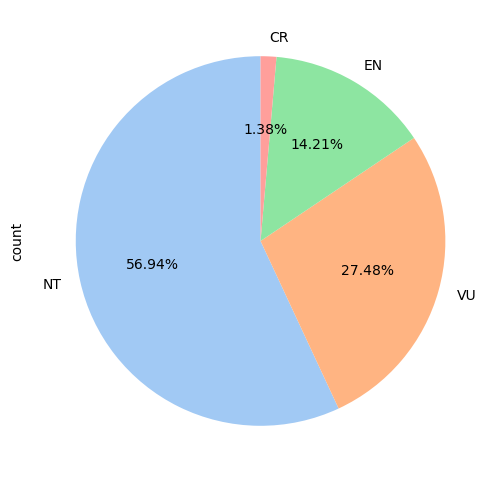

In [15]:
# Contar ocurrencias de cada categoría de la variable objetivo ('iucnRedListCategory')
class_counts = data['iucnRedListCategory'].value_counts().rename_axis('Categoria').reset_index(name='Count')
print("Distribución de clases de 'iucnRedListCategory'")
display(class_counts)

# Gráfico circular (pastel) para visualizar la distribución de clases de la variable objetivo ('iucnRedListCategory')
plt.figure(figsize=(6, 6)) # Tamaño del gráfico
data['iucnRedListCategory'].value_counts().plot.pie( # Contar las clases y generar el gráfico
    autopct='%.2f%%', # Mostrar porcentajes con dos decimales
    colors=sns.color_palette("pastel"),
    startangle=90 # Ajustar ángulo inicial
)
plt.show()

En segundo lugar, se realizarán gráficos de barras para las variables categóricas (sin incluir la variable objetivo "iucnRedListCategory"). Los gráficos de barras permiten ver cuántas observaciones hay en cada categoría de las variables nominales, como son las de la base de datos empleada. Son fundamentales para detectar clases poco representadas o posibles errores de codificación.

En este caso, podemos ver como ambas variables categóricas tienen una categoría predominante sobre las demás. La categoría "Decreasing" para la variable "populationTrend" y la categoría "Terrestrial" para la variable "systems".

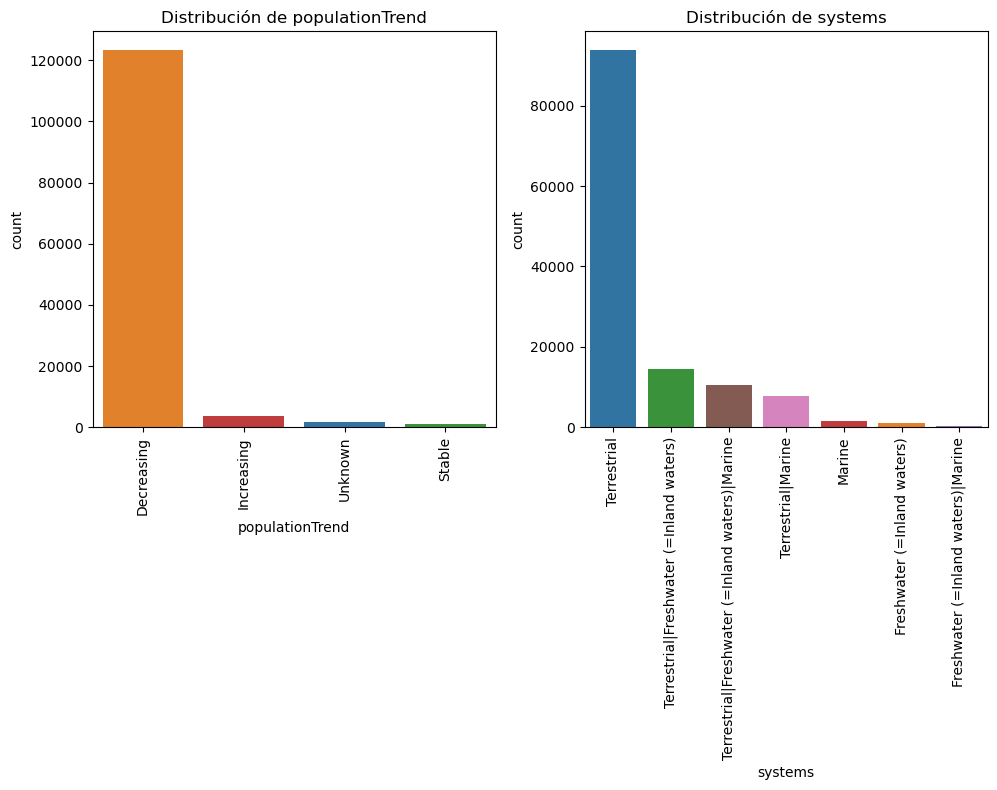

In [17]:
# Gráficos de distribución para cada variable categórica (excepto la variable objetivo 'iucnRedListCategory')
# Lista de variables categóricas a analizar
categorical_cols = ['populationTrend', 'systems']

# Definir el número de columnas para los subgráficos
cols = 3

# Calcular cuántas filas se necesitan según la cantidad de variables
rows = math.ceil(len(categorical_cols) / cols)

# Crear una figura con subgráficos (subplots)
# El tamaño del gráfico se ajusta según el número de filas
fig, axes = plt.subplots(rows, cols, figsize=(15, 8 * rows))

# Aplanar el arreglo de ejes para poder iterar fácilmente
axes = axes.flatten()

# Iterar sobre cada variable categórica y crear su gráfico de barras
for idx, col in enumerate(categorical_cols):
    sns.countplot(  # Gráfico de barras para contar la frecuencia de cada categoría
        data=data,
        x=col,
        ax=axes[idx],
        order=data[col].value_counts().index,  # Ordenar categorías por frecuencia
        hue=col,  # Usar el mismo valor para hue para colorear las barras (innecesario pero válido)
        dodge=False  # Superponer las barras (no separarlas)
    )
    axes[idx].set_title(f"Distribución de {col}")  # Título del gráfico
    axes[idx].tick_params(axis='x', rotation=90)   # Rotar etiquetas del eje x para mejor visibilidad

# Eliminar cualquier subplot no utilizado (en caso de que haya más espacios que gráficos)
for ax in axes[len(categorical_cols):]:
    fig.delaxes(ax)

# Ajustar el diseño para evitar superposición de gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Además, mediante unas tablas de contingencia se examinará la distribución relativa de la variable objetivo ("iucnRedListCategory") dentro de cada categoría de las variables categóricas ("populationTrend" y "systems"). Estas tablas permiten visualizar asociaciones aparentes y se representarán mediante *heatmaps* para facilitar la interpretación. Las tablas de contingencia son una herramienta esencial en estadística para representar frecuencias conjuntas y proporcionales entre dos variables categóricas. En este caso, permitirán detectar si ciertos estados de tendencia poblacional ("populationTrend") o sistemas ecológicos ("systems") están más frecuentemente asociados a determinadas categorías de amenaza.

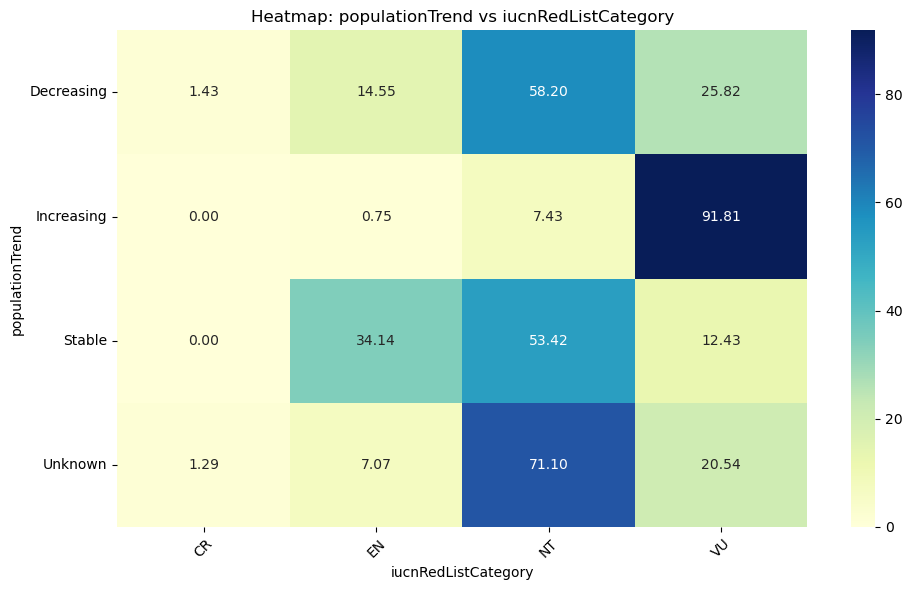

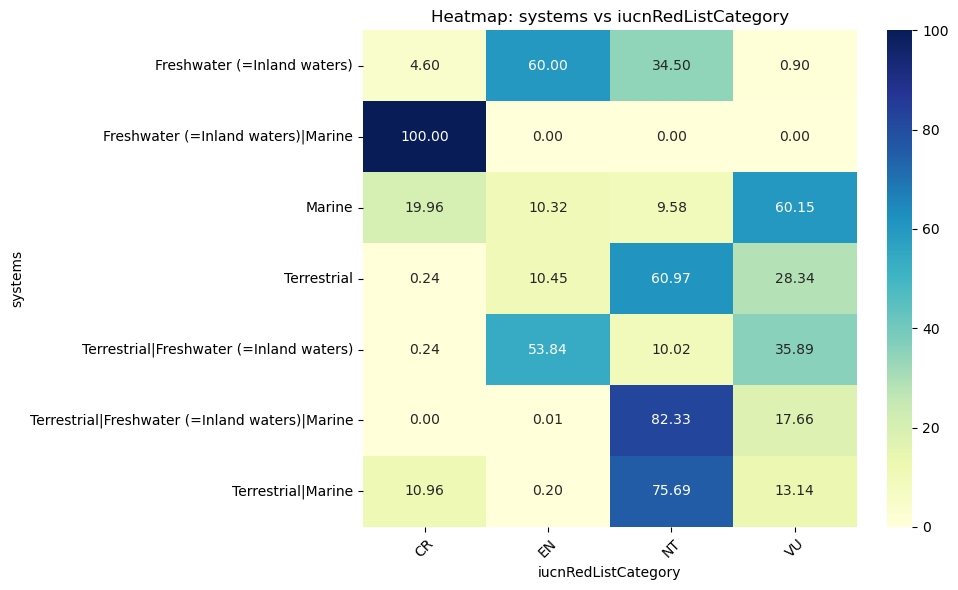

In [19]:
# Tablas de contingencia (variables categóricas)

# Lista de columnas categóricas a evaluar (excluyendo la variable objetivo)
categorical_cols = ['populationTrend', 'systems']

# Inicializar diccionario para almacenar las tablas de contingencia generadas
contingency_tables = {}

# Crear y visualizar tablas de contingencia para cada variable categórica
for col in categorical_cols:
    # Crear tabla de contingencia cruzando la variable categórica con la variable objetivo
    # Se normaliza por fila para obtener porcentajes por categoría de la variable (suma por fila = 100%)
    contingency = pd.crosstab(data[col], data['iucnRedListCategory'], normalize='index') * 100
    
    # Guardar la tabla en el diccionario para posible análisis posterior
    contingency_tables[col] = contingency
    
    # Visualizar la tabla de contingencia como un heatmap
    plt.figure(figsize=(10, 6))  # Tamaño del gráfico
    sns.heatmap(contingency, cmap='YlGnBu', fmt='.2f', annot=True, cbar=True)  # Mapa de calor con anotaciones
    
    # Títulos y etiquetas
    plt.title(f'Heatmap: {col} vs iucnRedListCategory')  # Título con el nombre de la variable analizada
    plt.ylabel(col)  # Etiqueta del eje Y
    plt.xlabel('iucnRedListCategory')  # Etiqueta del eje X
    
    # Rotar etiquetas para mejor visualización
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    # Ajustar diseño
    plt.tight_layout()
    
    # Mostrar el gráfico
    plt.show()

El último paso del análisis gráfico de variables es el análisis de las variables numéricas. Para ello, se realizarán histogramas de distribución, boxplots generales y boxplots por categoría de la variable objetivo ("iucnRedListCategory") de cada variable numérica.

Estos gráficos permiten analizar la distribución y dispersión de cada variable numérica, con carácter general y según la categoría de la variable objetivo. Se comprobará como se detectan diferencias en medianas, asimetrías y valores atípicos. Se puede observar, mediante todos los gráficos, una diferencia de escala en los datos bastante evidente, así como una cantidad elevada de valores atípicos en la mayoría de las variables, especialmente aquellas con una mayor asimetría mostrada en los histogramas.

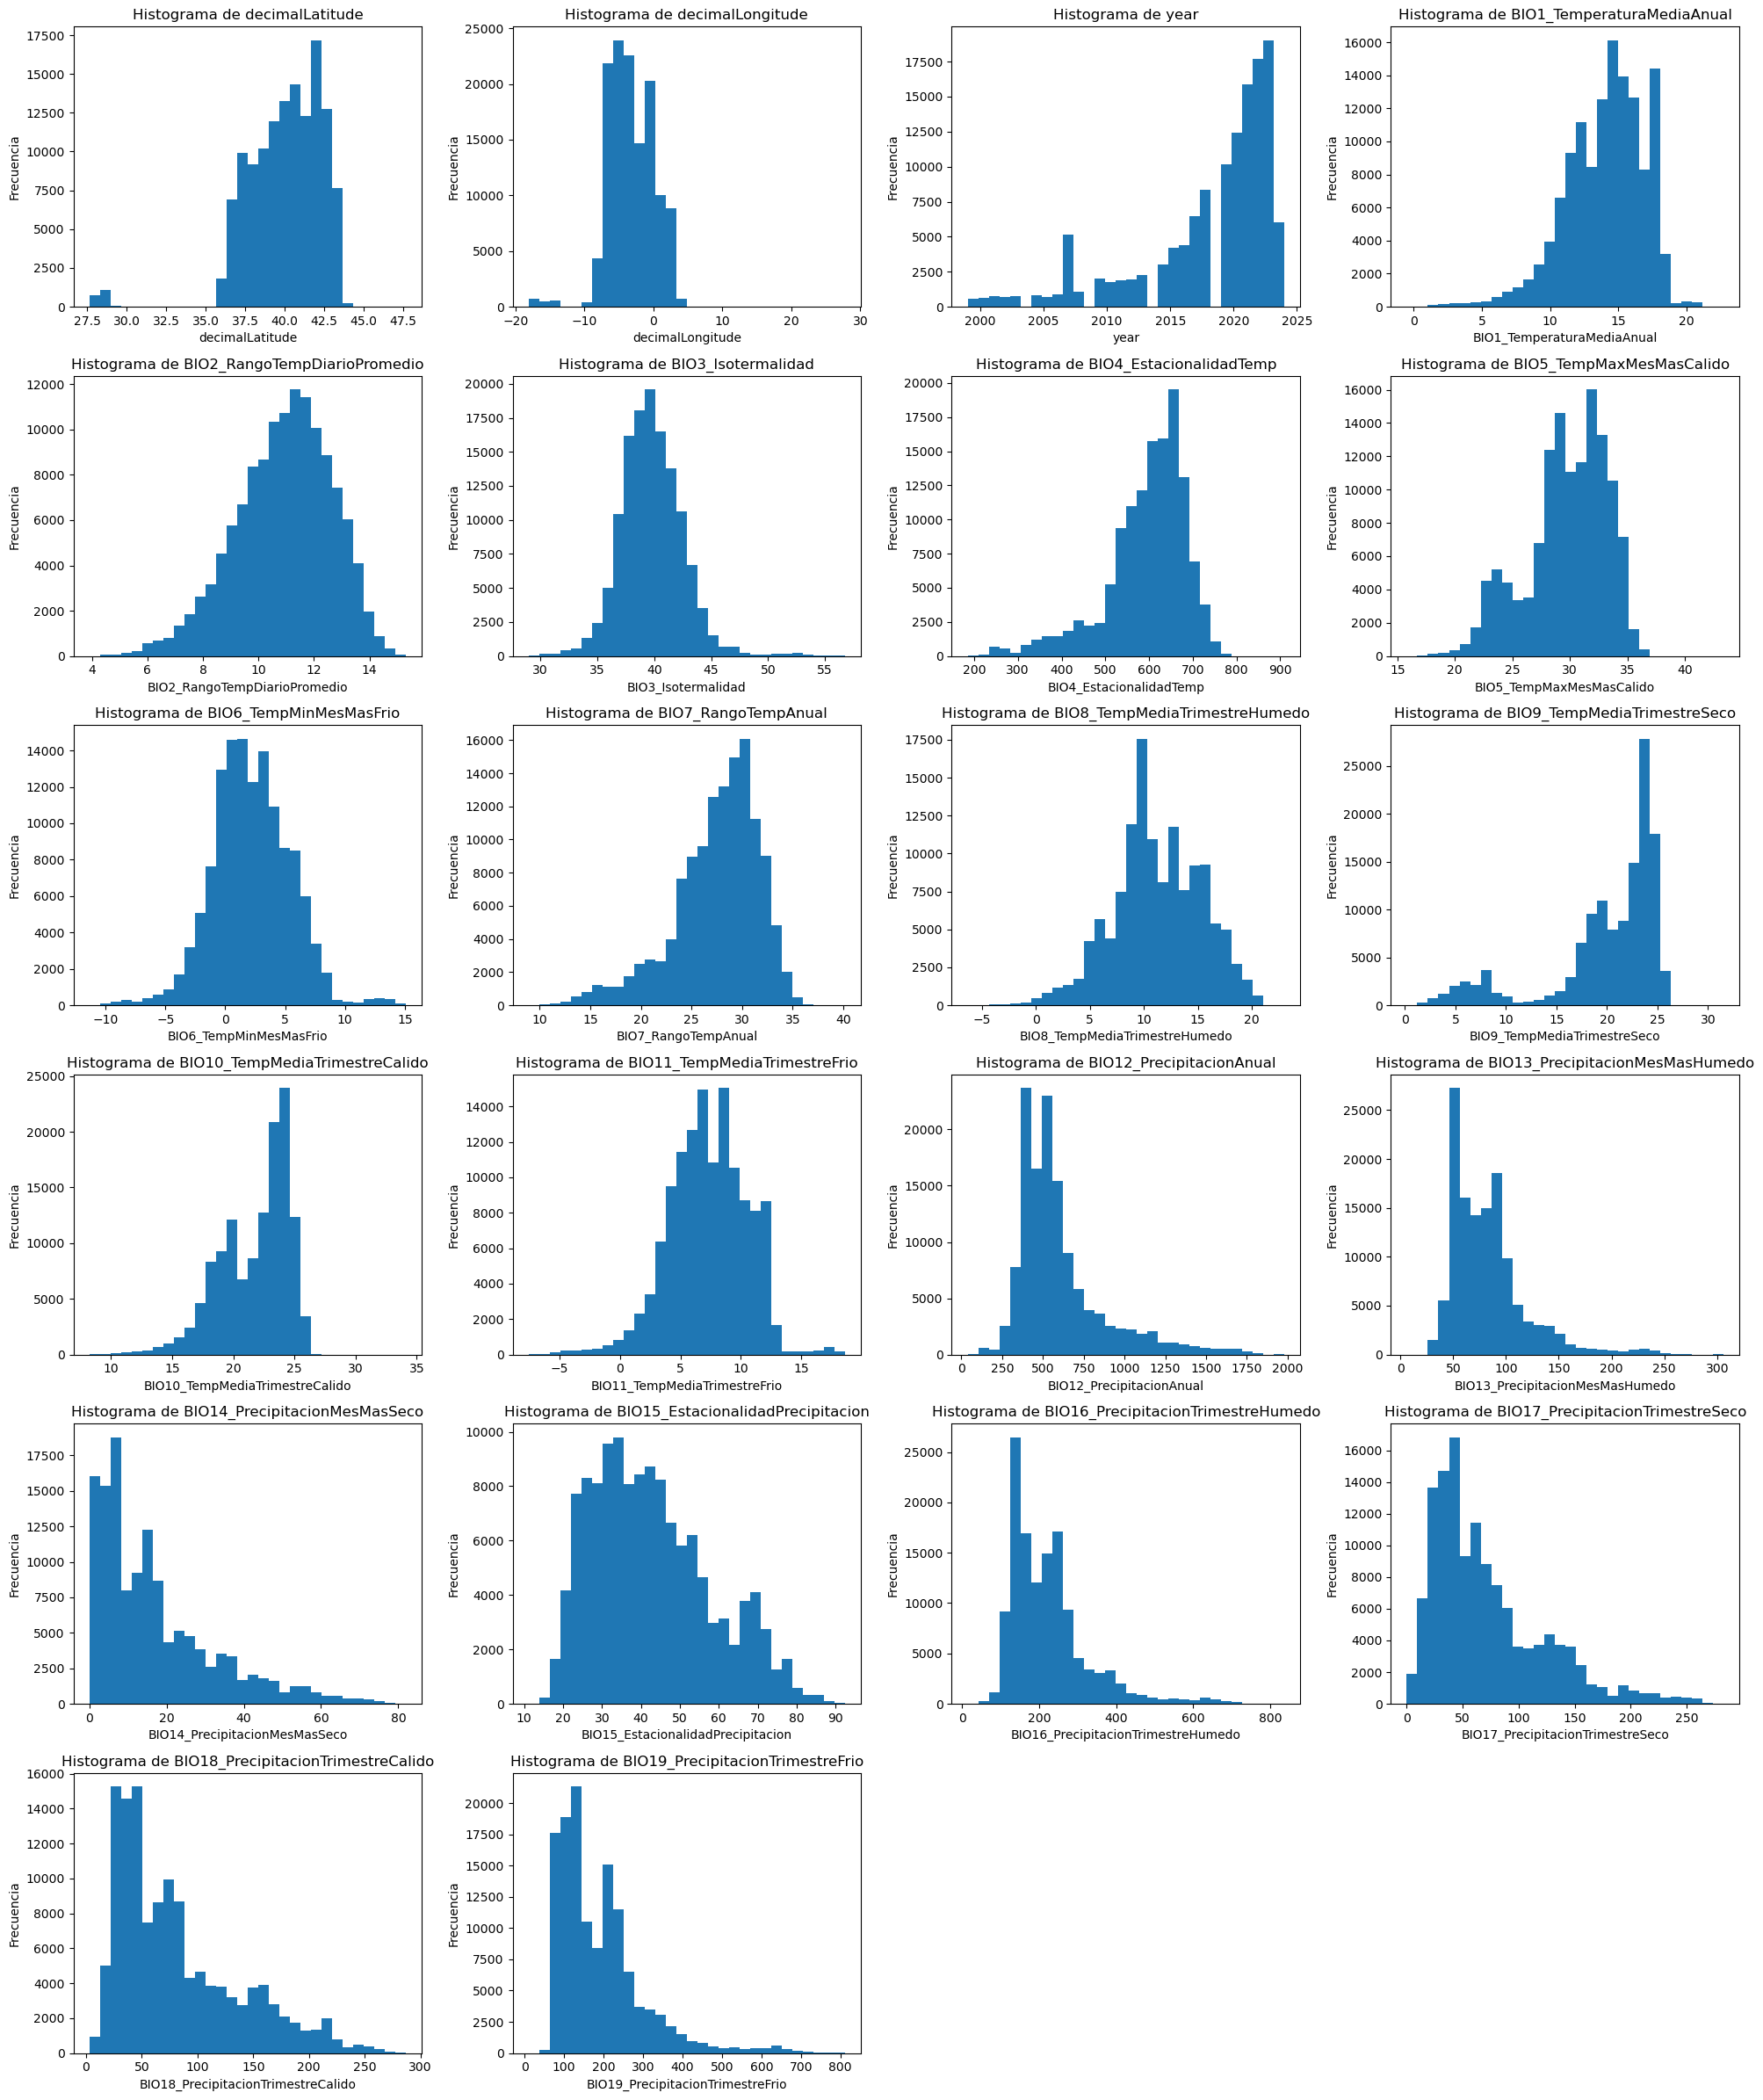

In [25]:
# Histogramas de distribución para cada variable numérica
# Obtener las columnas numéricas del DataFrame
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Configurar el tamaño y estructura de los subgráficos
num_cols = len(numeric_cols)        # Total de variables numéricas
cols = min(num_cols, 4)             # Número máximo de columnas por fila (máximo 4)
rows = math.ceil(num_cols / cols)   # Calcular cuántas filas se necesitan

# Crear los subplots (uno por variable numérica)
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))

# Aplanar el arreglo de ejes para facilitar el recorrido en bucle
axes = axes.flatten()

# Iterar sobre cada variable numérica y generar su histograma
for i, col in enumerate(numeric_cols):
    axes[i].hist(data[col].dropna(), bins=30)  # Eliminar valores nulos y usar 30 bins por defecto
    axes[i].set_title(f'Histograma de {col}')  # Título del gráfico
    axes[i].set_xlabel(col)                    # Etiqueta del eje X
    axes[i].set_ylabel('Frecuencia')           # Etiqueta del eje Y

# Eliminar cualquier subplot no utilizado (en caso de que haya más espacios que variables)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño para evitar solapamientos entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

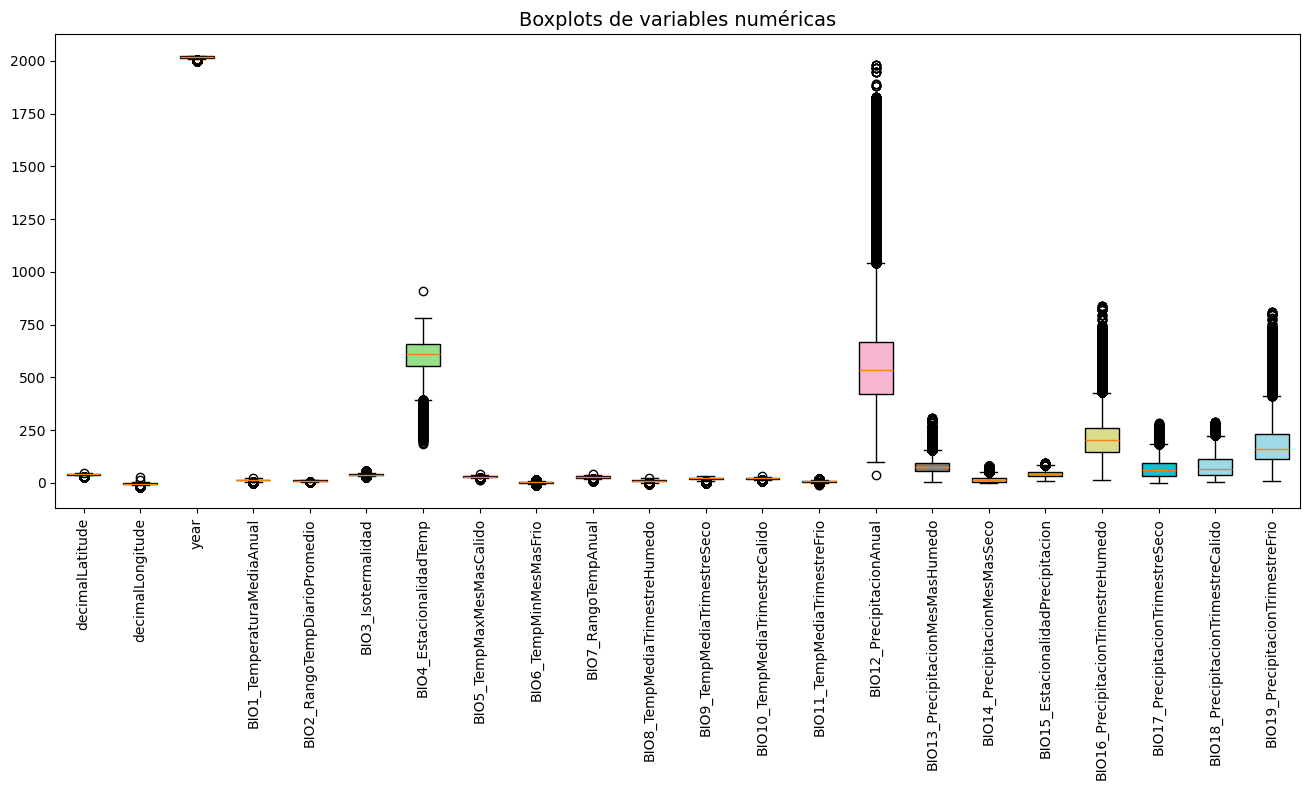

In [26]:
# Boxplots para cada variable numérica

# Obtener las columnas que contienen datos numéricos
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Preparar los datos: eliminar valores nulos para cada variable numérica
data_boxplots = [data[col].dropna() for col in numeric_cols]

# Crear una figura y un solo eje (ax) para dibujar todos los boxplots
# El ancho de la figura se escala con la cantidad de variables
fig, ax = plt.subplots(figsize=(0.6 * len(numeric_cols), 8))  # ancho dinámico, alto fijo

# Dibujar el boxplot
box = ax.boxplot(
    data_boxplots,
    patch_artist=True,  # Permite colorear el interior de las cajas
    widths=0.6           # Grosor estándar de las cajas
)

# Aplicar una paleta de colores para diferenciar las cajas
colors = plt.cm.tab20(np.linspace(0, 1, len(numeric_cols)))  # Obtener tantos colores como variables
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)  # Asignar color a cada caja

# Configurar etiquetas del eje X con los nombres de las variables
ax.set_xticks(np.arange(1, len(numeric_cols) + 1))                  # Posiciones en el eje X
ax.set_xticklabels(numeric_cols, rotation=90, fontsize=10)         # Nombres de las variables rotados

# Título del gráfico y estilo del eje Y
ax.set_title("Boxplots de variables numéricas", fontsize=14)
ax.tick_params(axis='y', labelsize=10)  # Tamaño de fuente del eje Y

# Ajustar distribución de los elementos para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

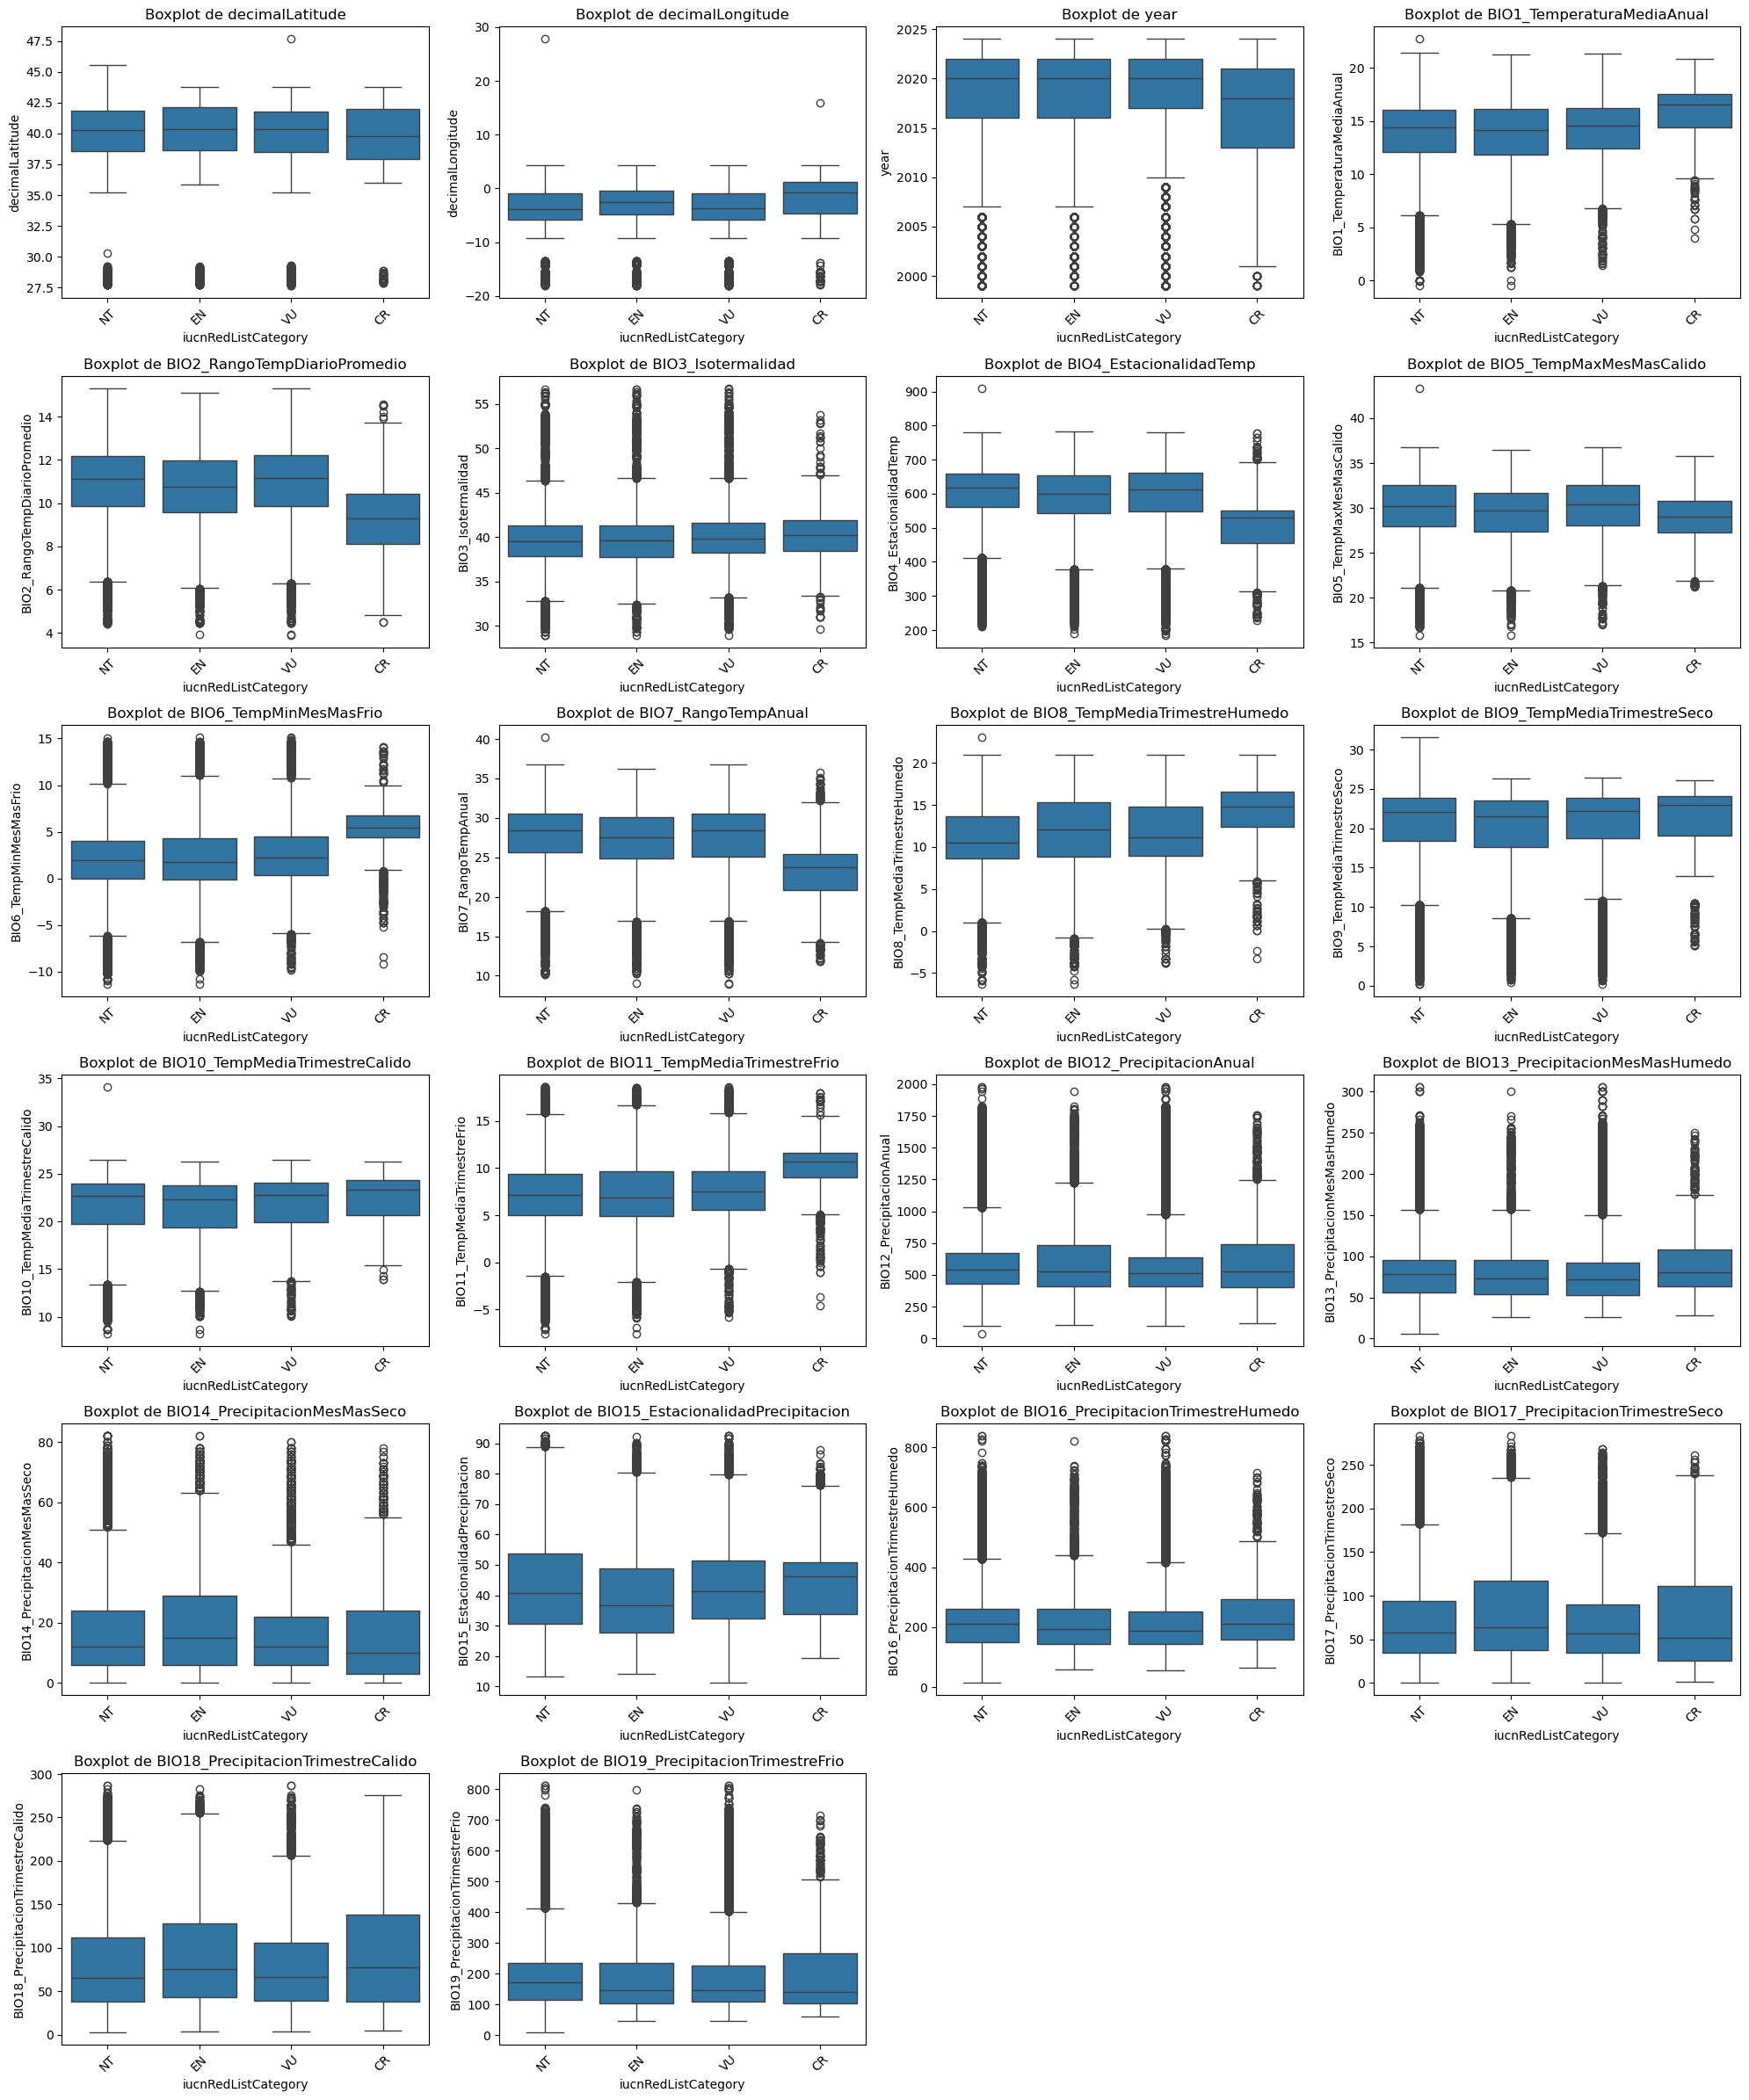

In [27]:
# Boxplots por categoría de la variable objetivo ('iucnRedListCategory') para cada variable numérica
# Obtener todas las columnas numéricas del DataFrame
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Configurar la estructura del gráfico con subplots
num_cols = len(numeric_cols)       # Número total de variables numéricas
cols = min(num_cols, 4)            # Número máximo de columnas por fila (máximo 4)
rows = math.ceil(num_cols / cols)  # Calcular el número de filas necesarias

# Crear figura y subgráficos
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))

# Aplanar la estructura de ejes para iterar fácilmente
axes = axes.flatten()

# Iterar sobre cada variable numérica y generar su boxplot
for i, col in enumerate(numeric_cols):
    sns.boxplot(
        x='iucnRedListCategory',  # Categoría (variable objetivo)
        y=col,                    # Variable numérica
        data=data,
        ax=axes[i]
    )
    axes[i].set_title(f'Boxplot de {col}')             # Título del gráfico
    axes[i].tick_params(axis='x', rotation=45)         # Rotar etiquetas del eje X para mejor lectura

# Eliminar subplots vacíos (en caso de que sobren espacios)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar diseño para evitar solapamientos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

El siguiente paso es realizar la detección y el tratamiento de *outliers* de las variables numéricas, que pueden distorsionar las estadísticas descriptivas, afectar las pruebas de hipótesis y sesgar los modelos predictivos. Esta tarea se dividirá en dos partes principales: la detección inicial de outliers mediante IQR y la selección y aplicación de transformaciones que minimicen la cantidad de outliers.

Se comenzará con la detección de los *outliers* mediante el método IQR. El método IQR (*Interquartile Range*) es un enfoque robusto y no paramétrico para identificar valores extremos fuera del rango esperado. Para cada variable numérica (exceptuando coordenadas y año), se calculan los cuartiles (Q1, Q3) y se determinan los valores atípicos como aquellos fuera del rango [Q1 - 1.5xIQR, Q3 + 1.5xIQR].

Es importante destacar que las variables numéricas "decimalLatitude", "decimalLongitude" (coordenadas), "year" (año de estudio de la especie) se excluirán de este análisis y tratamiento posterior, puesto que para las coordenadas y los años no se puede contemplar que los *outliers* puedan ser errores de medición, dado que, aunque son numéricos, son fijos.  

In [32]:
# Detección de outliers usando el método IQR (Rango Intercuartílico)

# Obtener las columnas numéricas del DataFrame
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Especificar variables que se deben excluir del análisis (no tiene sentido detectar outliers en coordenadas o año)
excluir = ['decimalLatitude', 'decimalLongitude', 'year']

# Filtrar las columnas numéricas, excluyendo las variables definidas anteriormente
numeric_cols_filtradas = [col for col in numeric_cols if col not in excluir]

# Crear una lista vacía para almacenar información sobre los outliers encontrados
outlier_info = []

# Iterar sobre cada variable numérica seleccionada
for col in numeric_cols_filtradas:
    # Calcular el primer y tercer cuartil
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    
    # Calcular el rango intercuartílico (IQR)
    IQR = Q3 - Q1
    
    # Definir los límites inferior y superior para detectar outliers
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Contar cuántos valores están fuera de estos límites
    n_outliers = data[(data[col] < lower) | (data[col] > upper)][col].shape[0]

    # Guardar los resultados en una lista como diccionario
    outlier_info.append({
        'Variable': col,
        'n_outliers': n_outliers,
        '%_outliers': n_outliers / data.shape[0] * 100  # Porcentaje respecto al total de registros
    })

# Crear un DataFrame con el resumen de outliers por variable
outlier_df = pd.DataFrame(outlier_info)

# Mostrar el resumen
print("Resumen de outliers por variable")
display(outlier_df)

Resumen de outliers por variable


Variable  n_outliers  %_outliers
0           BIO1_TemperaturaMediaAnual        1676    1.293250
1         BIO2_RangoTempDiarioPromedio        1136    0.876570
2                   BIO3_Isotermalidad        2854    2.202228
3              BIO4_EstacionalidadTemp        5855    4.517886
4             BIO5_TempMaxMesMasCalido        1243    0.959135
5               BIO6_TempMinMesMasFrio        2417    1.865027
6                  BIO7_RangoTempAnual        4206    3.245471
7        BIO8_TempMediaTrimestreHumedo         788    0.608043
8          BIO9_TempMediaTrimestreSeco       14660   11.312078
9       BIO10_TempMediaTrimestreCalido        1022    0.788605
10        BIO11_TempMediaTrimestreFrio        2144    1.654372
11            BIO12_PrecipitacionAnual       11145    8.599802
12     BIO13_PrecipitacionMesMasHumedo        5238    4.041791
13       BIO14_PrecipitacionMesMasSeco        5775    4.456156
14   BIO15_EstacionalidadPrecipitacion         341    0.263125
15  BIO16_PrecipitacionTrimestreHumedo        5703    4.400599
16    BIO17_PrecipitacionTrimestreSeco        5142    3.967715
17  BIO18_PrecipitacionTrimestreCalido        1973    1.522424
18    BIO19_PrecipitacionTrimestreFrio        5408    4.172968

A continuación, se realiza el tratamiento de *outliers*. Las transformaciones como *log1p*, *sqrt*, *boxcox*, y *yeo-johnson* permiten normalizar o estabilizar la varianza, reduciendo la cantidad de outliers detectados. Lo que se hará aquí será probar todas estas transformaciones para cada variable y seleccionar y aplicar la transformación que genere menos *outliers*. Se volverá a realizar la detección de outliers nuevamente tras aplicar la mejor transformación, lo que permitirá comprobar la efectividad de las transformaciones.

In [35]:
# Transformación de los outliers detectados para reducir su impacto

# Obtener columnas numéricas del DataFrame
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Definir variables que se deben excluir del análisis (coordenadas y año)
excluir = ['decimalLatitude', 'decimalLongitude', 'year']

# Filtrar las columnas numéricas, excluyendo las especificadas
numeric_cols_filtradas = [col for col in numeric_cols if col not in excluir]

# Función para contar outliers usando el método del rango intercuartílico (IQR)
def detect_outliers_iqr(x):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((x < lower) | (x > upper)).sum()

# Diccionario para guardar la mejor transformación aplicada a cada variable
transformaciones_aplicadas = {}

# Evaluar diferentes transformaciones para cada variable
for col in numeric_cols_filtradas:
    x = data[col].dropna()  # Eliminar valores nulos
    resultados = {}

    # Evaluar sin transformar (base)
    resultados['original'] = detect_outliers_iqr(x)

    # Evaluar transformación logarítmica log1p (requiere valores >= 0)
    if (x >= 0).all():
        resultados['log1p'] = detect_outliers_iqr(np.log1p(x))

    # Evaluar transformación raíz cuadrada (requiere valores >= 0)
    if (x >= 0).all():
        resultados['sqrt'] = detect_outliers_iqr(np.sqrt(x))

    # Evaluar transformación Box-Cox (requiere valores > 0)
    if (x > 0).all():
        try:
            transformed, _ = boxcox(x)
            resultados['boxcox'] = detect_outliers_iqr(transformed)
        except:
            pass  # Si falla (por ejemplo, por valores constantes), se omite

    # Evaluar transformación Yeo-Johnson (acepta valores negativos y ceros)
    try:
        pt = PowerTransformer(method='yeo-johnson', standardize=False)
        x_reshaped = x.values.reshape(-1, 1)
        transformed = pt.fit_transform(x_reshaped).flatten()
        resultados['yeo-johnson'] = detect_outliers_iqr(transformed)
    except:
        pass

    # Identificar la transformación que produce menos outliers
    mejor = min(resultados, key=resultados.get)
    print(f"{col} -> Mejor transformación: {mejor} ({resultados})")

    # Registrar transformación aplicada
    transformaciones_aplicadas[col] = mejor

    # Aplicar la mejor transformación al DataFrame original
    if mejor == 'original':
        continue
    elif mejor == 'log1p':
        data[col] = np.log1p(data[col])
    elif mejor == 'sqrt':
        data[col] = np.sqrt(data[col])
    elif mejor == 'boxcox':
        # Box-Cox requiere valores > 0, así que aplicamos un desplazamiento si es necesario
        shift = 1 - data[col].min() if data[col].min() <= 0 else 0
        data[col], _ = boxcox(data[col] + shift)
    elif mejor == 'yeo-johnson':
        pt = PowerTransformer(method='yeo-johnson', standardize=False)
        data[col] = pt.fit_transform(data[col].values.reshape(-1, 1))

# ------------------------------------------
# Detección de outliers nuevamente mediante IQR tras aplicar las transformaciones

# Crear una lista vacía para almacenar información sobre los outliers encontrados
outlier_info = []

# Iterar sobre cada variable numérica seleccionada
for col in numeric_cols_filtradas:
    # Calcular el primer y tercer cuartil
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    
    # Calcular el rango intercuartílico (IQR)
    IQR = Q3 - Q1
    
    # Definir los límites inferior y superior para detectar outliers
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Contar cuántos valores están fuera de estos límites
    n_outliers = data[(data[col] < lower) | (data[col] > upper)][col].shape[0]

    # Guardar los resultados en una lista como diccionario
    outlier_info.append({
        'Variable': col,
        'n_outliers': n_outliers,
        '%_outliers': n_outliers / data.shape[0] * 100  # Porcentaje respecto al total de registros
    })

# Crear DataFrame con resumen final de outliers tras transformación óptima
outlier_df_transformado = pd.DataFrame(outlier_info)

# Mostrar resultados
print("\nResumen de outliers por variable (tras transformación óptima)")
display(outlier_df_transformado)


BIO1_TemperaturaMediaAnual -> Mejor transformación: yeo-johnson ({'original': 1676, 'yeo-johnson': 178})
BIO2_RangoTempDiarioPromedio -> Mejor transformación: boxcox ({'original': 1136, 'log1p': 2686, 'sqrt': 2026, 'boxcox': 45, 'yeo-johnson': 65})
BIO3_Isotermalidad -> Mejor transformación: log1p ({'original': 2854, 'log1p': 2587, 'sqrt': 2596, 'boxcox': 2605, 'yeo-johnson': 2605})
BIO4_EstacionalidadTemp -> Mejor transformación: boxcox ({'original': 5855, 'log1p': 7918, 'sqrt': 6855, 'boxcox': 100, 'yeo-johnson': 100})
BIO5_TempMaxMesMasCalido -> Mejor transformación: boxcox ({'original': 1243, 'log1p': 3194, 'sqrt': 2077, 'boxcox': 1, 'yeo-johnson': 1})
BIO6_TempMinMesMasFrio -> Mejor transformación: original ({'original': 2417, 'yeo-johnson': 2464})
BIO7_RangoTempAnual -> Mejor transformación: boxcox ({'original': 4206, 'log1p': 6324, 'sqrt': 5224, 'boxcox': 66, 'yeo-johnson': 66})
BIO8_TempMediaTrimestreHumedo -> Mejor transformación: yeo-johnson ({'original': 788, 'yeo-johnson': 

Variable  n_outliers  %_outliers
0           BIO1_TemperaturaMediaAnual         178    0.137350
1         BIO2_RangoTempDiarioPromedio          45    0.034723
2                   BIO3_Isotermalidad        2587    1.996204
3              BIO4_EstacionalidadTemp         100    0.077163
4             BIO5_TempMaxMesMasCalido           1    0.000772
5               BIO6_TempMinMesMasFrio        2417    1.865027
6                  BIO7_RangoTempAnual          66    0.050927
7        BIO8_TempMediaTrimestreHumedo         310    0.239205
8          BIO9_TempMediaTrimestreSeco           1    0.000772
9       BIO10_TempMediaTrimestreCalido           1    0.000772
10        BIO11_TempMediaTrimestreFrio        1570    1.211457
11            BIO12_PrecipitacionAnual        2919    2.252384
12     BIO13_PrecipitacionMesMasHumedo         230    0.177475
13       BIO14_PrecipitacionMesMasSeco           0    0.000000
14   BIO15_EstacionalidadPrecipitacion           0    0.000000
15  BIO16_PrecipitacionTrimestreHumedo         400    0.308652
16    BIO17_PrecipitacionTrimestreSeco         992    0.765456
17  BIO18_PrecipitacionTrimestreCalido           0    0.000000
18    BIO19_PrecipitacionTrimestreFrio          13    0.010031

Para comprobar cómo han quedado las variables tras aplicar las transformaciones que les proporcionaban el menor número de *outliers* se volverán a realizar boxplots por categoría de la variable objetivo ("iucnRedListCategory") de cada variable numérica. Se podrá observar cómo todas las variables transformadas han mejorado en términos de *outliers*, aunque aún se observará la diferencia de escalas y la asimetría, que se corregirá más adelante.

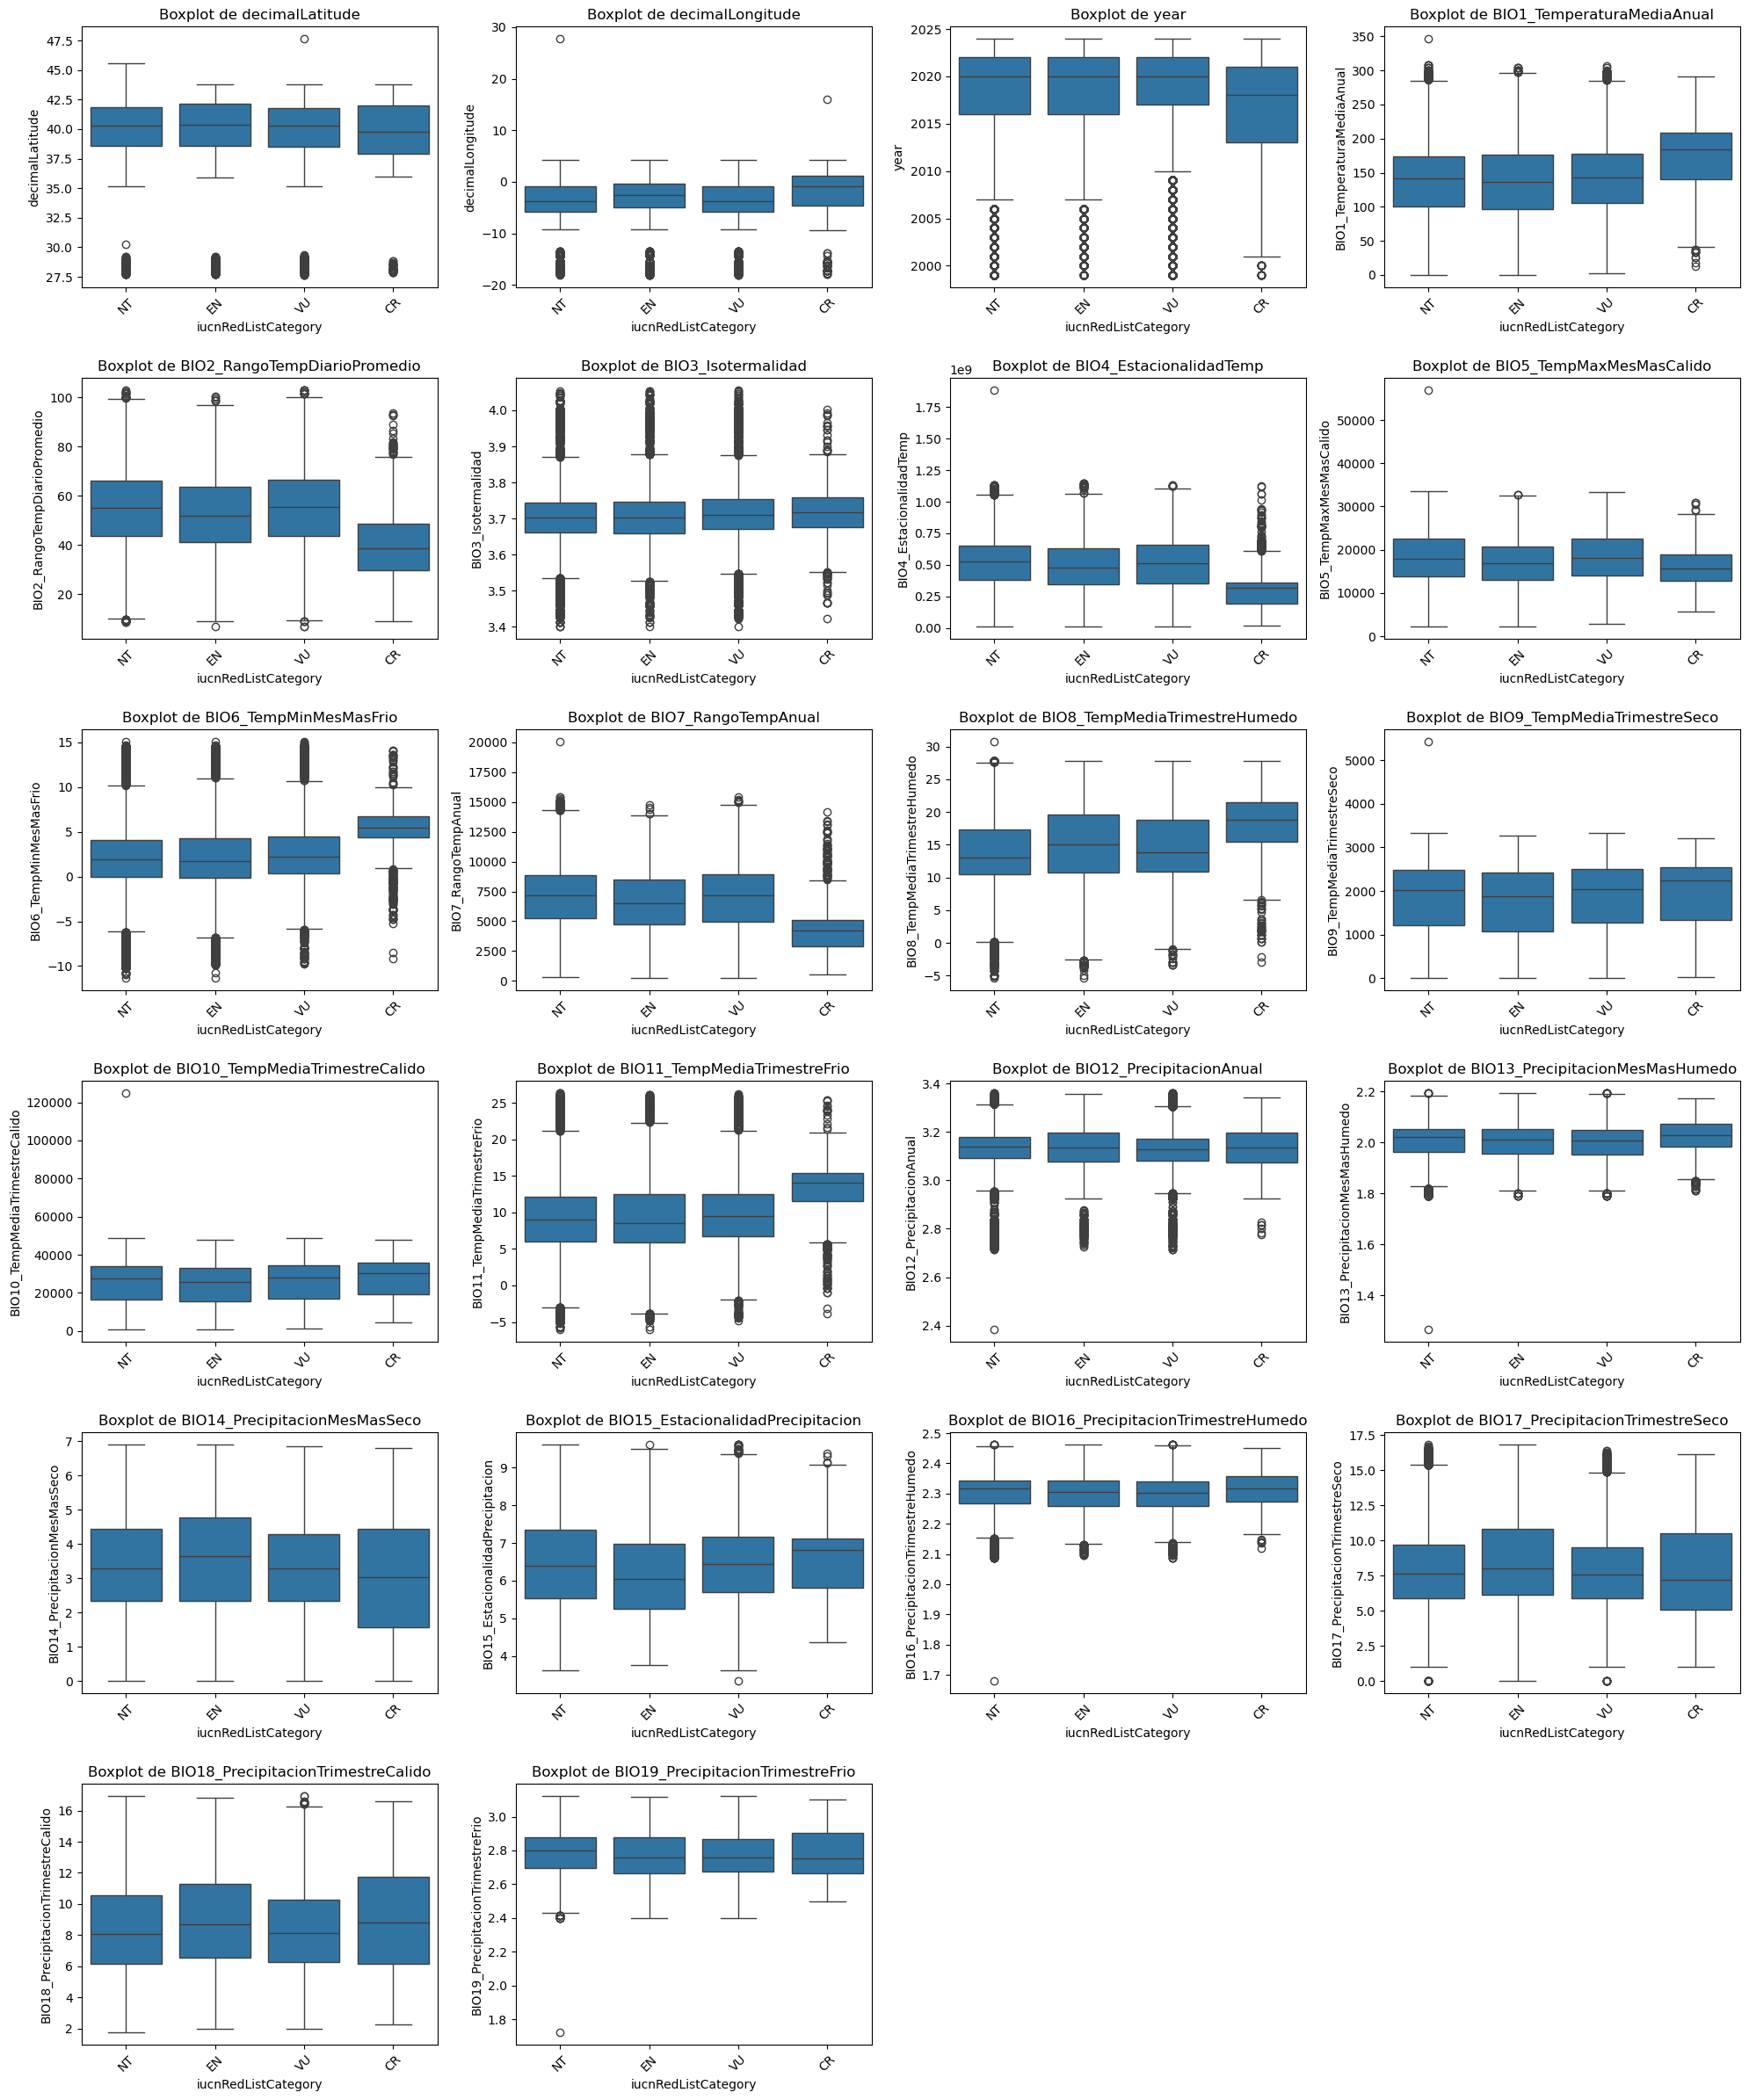

In [38]:
# Boxplots por categoría de la variable objetivo ('iucnRedListCategory') para cada variable numérica con outliers transformados
# Obtener todas las columnas numéricas del DataFrame
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Configurar la estructura del gráfico con subplots
num_cols = len(numeric_cols)       # Número total de variables numéricas
cols = min(num_cols, 4)            # Número máximo de columnas por fila (máximo 4)
rows = math.ceil(num_cols / cols)  # Calcular el número de filas necesarias

# Crear figura y subgráficos
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))

# Aplanar la estructura de ejes para iterar fácilmente
axes = axes.flatten()

# Iterar sobre cada variable numérica y generar su boxplot
for i, col in enumerate(numeric_cols):
    sns.boxplot(
        x='iucnRedListCategory',  # Categoría (variable objetivo)
        y=col,                    # Variable numérica
        data=data,
        ax=axes[i]
    )
    axes[i].set_title(f'Boxplot de {col}')             # Título del gráfico
    axes[i].tick_params(axis='x', rotation=45)         # Rotar etiquetas del eje X para mejor lectura

# Eliminar subplots vacíos (en caso de que sobren espacios)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar diseño para evitar solapamientos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

La etapa siguiente a realizar es el análisis de correlaciones entre las variables predictoras y la variable objetivo ("iucnRedListCategory") para entender relaciones potenciales y detectar redundancias entre variables.

Este análisis se hará separando las variables numéricas de las variables categóricas, puesto que la manera de analizarlas es diferente. Por un lado, la correlación de Pearson medirá la relación lineal entre las variables numéricas. Esta correlación ayuda a identificar predictores útiles y eliminar variables redundantes (colinealidad).

Por otro lado, el coeficiente de Cramér’s V medirá la asociación entre variables categóricas, incluida la variable objetivo, ya que se utiliza cuando las variables no son numéricas.

El objetivo es identificar variables altamente correlacionadas entre sí (por ejemplo, |r| > 0.8) dado que es fundamental para prevenir multicolinealidad en modelos predictivos, así como observar la correlación entre todas la variables predictoras con la variable objetivo.

Los resultados que podemos observar son claros: las variable categóricas son las que más correlación tienen con la variable objetivo, sin mostrar posible multicolinealidad entre ellas; mientras que para las variables numéricas se puede detectar que muchas están altamente correlacionadas entre sí, por lo que más adelante se seleccionarán aquellas variables con las que se pueda evitar multicolinealidad.

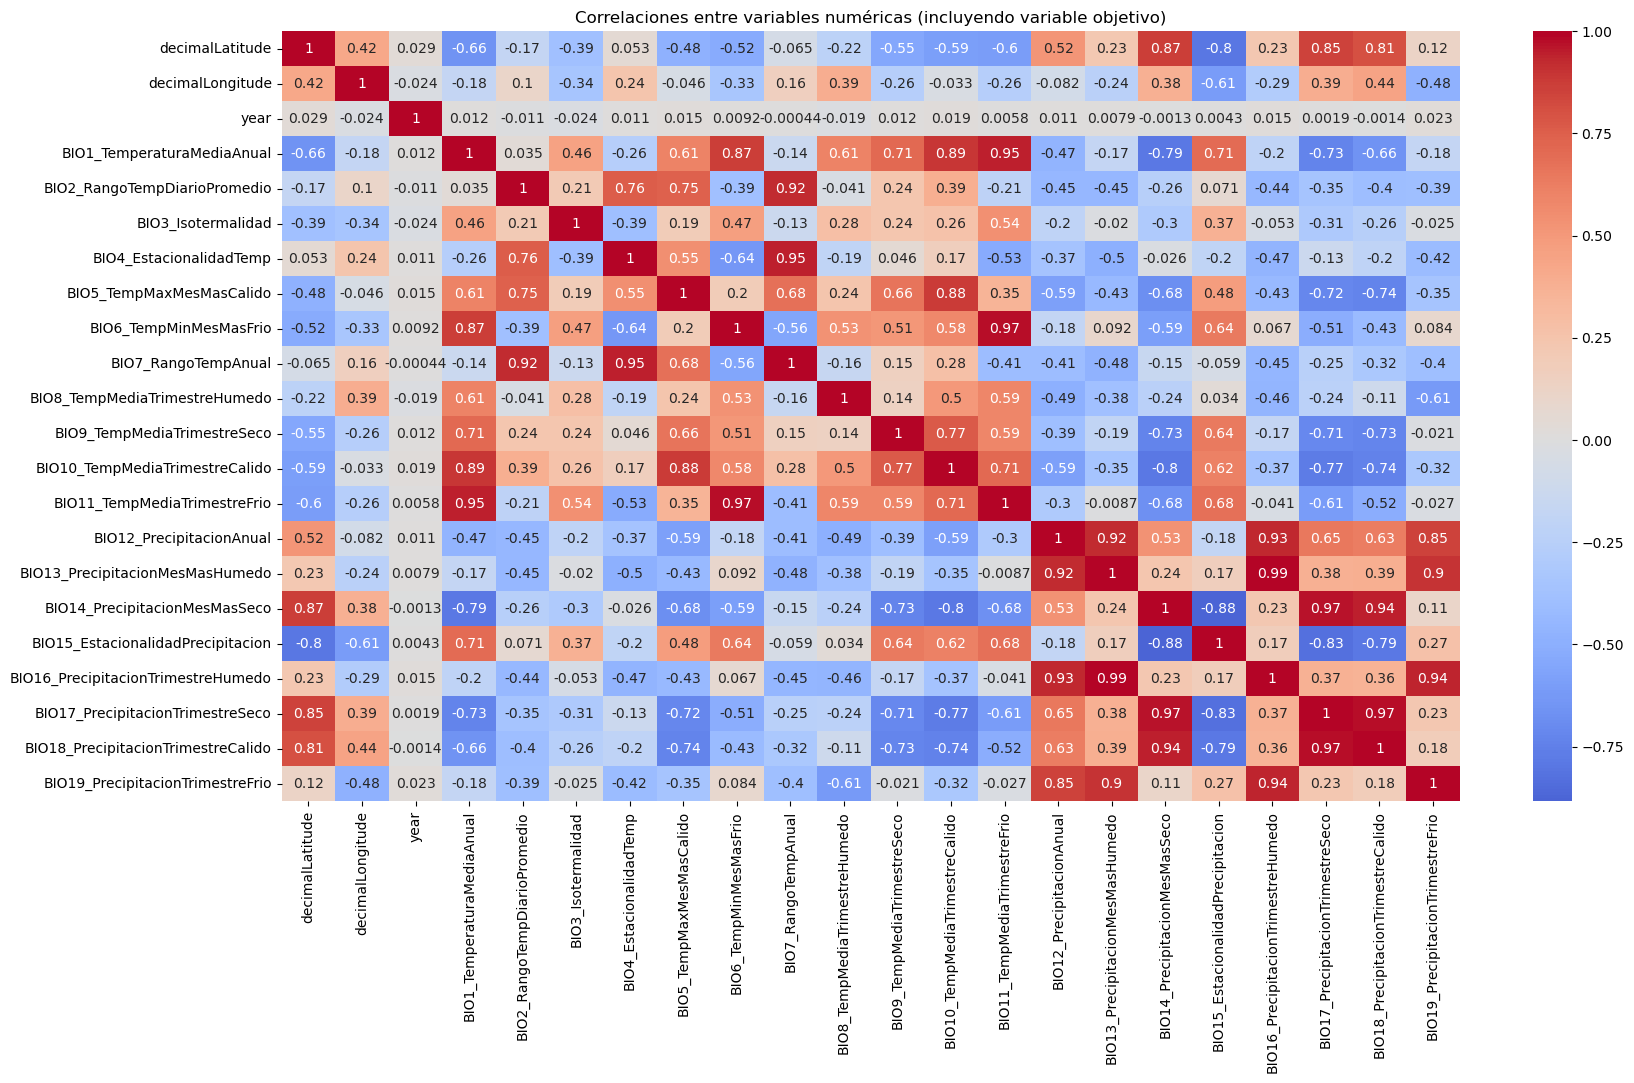

Pares de variables numéricas altamente correlacionadas


Variable_1                          Variable_2  \
0                      decimalLatitude       BIO14_PrecipitacionMesMasSeco   
1                      decimalLatitude    BIO17_PrecipitacionTrimestreSeco   
2                      decimalLatitude  BIO18_PrecipitacionTrimestreCalido   
3           BIO1_TemperaturaMediaAnual              BIO6_TempMinMesMasFrio   
4           BIO1_TemperaturaMediaAnual      BIO10_TempMediaTrimestreCalido   
5           BIO1_TemperaturaMediaAnual        BIO11_TempMediaTrimestreFrio   
6         BIO2_RangoTempDiarioPromedio                 BIO7_RangoTempAnual   
7              BIO4_EstacionalidadTemp                 BIO7_RangoTempAnual   
8             BIO5_TempMaxMesMasCalido      BIO10_TempMediaTrimestreCalido   
9               BIO6_TempMinMesMasFrio        BIO11_TempMediaTrimestreFrio   
10            BIO12_PrecipitacionAnual     BIO13_PrecipitacionMesMasHumedo   
11            BIO12_PrecipitacionAnual  BIO16_PrecipitacionTrimestreHumedo   
12            BIO12_PrecipitacionAnual    BIO19_PrecipitacionTrimestreFrio   
13     BIO13_PrecipitacionMesMasHumedo  BIO16_PrecipitacionTrimestreHumedo   
14     BIO13_PrecipitacionMesMasHumedo    BIO19_PrecipitacionTrimestreFrio   
15       BIO14_PrecipitacionMesMasSeco   BIO15_EstacionalidadPrecipitacion   
16       BIO14_PrecipitacionMesMasSeco    BIO17_PrecipitacionTrimestreSeco   
17       BIO14_PrecipitacionMesMasSeco  BIO18_PrecipitacionTrimestreCalido   
18   BIO15_EstacionalidadPrecipitacion    BIO17_PrecipitacionTrimestreSeco   
19  BIO16_PrecipitacionTrimestreHumedo    BIO19_PrecipitacionTrimestreFrio   
20    BIO17_PrecipitacionTrimestreSeco  BIO18_PrecipitacionTrimestreCalido   

    Correlación  
0      0.869390  
1      0.850993  
2      0.807616  
3      0.870621  
4      0.893221  
5      0.947177  
6      0.923511  
7      0.945134  
8      0.875546  
9      0.974893  
10     0.919812  
11     0.932512  
12     0.849431  
13     0.989217  
14     0.900321  
15    -0.883977  
16     0.969342  
17     0.942967  
18    -0.826154  
19     0.938795  
20     0.973642

In [41]:
# Correlaciones de variables numéricas

# Seleccionar las columnas numéricas del dataset
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Crear subconjunto con las columnas numéricas
data_numeric_corr = data[numeric_cols]

# Calcular matriz de correlación usando el coeficiente de Pearson
correlation_matrix = data_numeric_corr.corr(method='pearson')

# Visualizar la matriz de correlación como un mapa de calor (heatmap)
plt.figure(figsize=(19, 10))  # Tamaño del gráfico
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, center=0)  # Color, valores anotados, centrado en 0
plt.title("Correlaciones entre variables numéricas (incluyendo variable objetivo)")
plt.show()

# ------------------------------------------
# Buscar pares de variables numéricas que estén altamente correlacionadas entre sí (>|0.8|)

high_corr_pairs = []
threshold = 0.8  # Umbral de correlación fuerte

for col1, col2 in combinations(numeric_cols, 2):  # Evaluar cada par único de variables
    corr_val = correlation_matrix.loc[col1, col2]
    if abs(corr_val) > threshold:  # Si la correlación es fuerte (positiva o negativa)
        high_corr_pairs.append((col1, col2, corr_val))

# Crear DataFrame con los pares altamente correlacionados
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Variable_1', 'Variable_2', 'Correlación'])

# Mostrar la tabla
print("Pares de variables numéricas altamente correlacionadas")
display(high_corr_df)

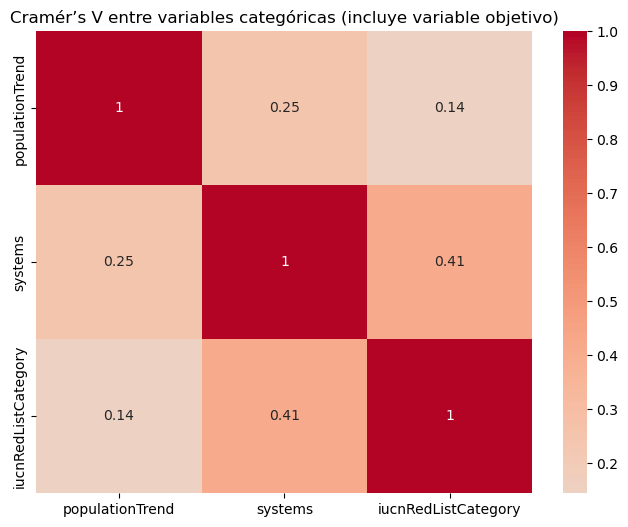

In [43]:
# Análisis de correlación entre variables categóricas usando Cramér's V

# Lista de columnas categóricas a evaluar (excluyendo la variable objetivo)
categorical_cols = ['populationTrend', 'systems']

# Definir función para calcular Cramér's V entre dos variables categóricas
# Cramér's V mide la asociación entre dos variables categóricas (0 = sin relación, 1 = relación perfecta)
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)  # Tabla de contingencia
    chi2, _, _, _ = chi2_contingency(confusion_matrix)  # Test Chi-cuadrado
    n = confusion_matrix.sum().sum()  # Total de observaciones
    phi2 = chi2 / n  # Phi-cuadrado
    r, k = confusion_matrix.shape  # Número de filas y columnas
    return sqrt(phi2 / min(k - 1, r - 1))  # Fórmula de Cramér's V

# Crear una matriz de Cramér’s V para todas las combinaciones entre variables categóricas (incluyendo la variable objetivo)
cat_cols_plus_target = categorical_cols + ['iucnRedListCategory']  # Añadir la variable objetivo a la lista

# Inicializar matriz vacía con las variables como filas y columnas
cramer_matrix = pd.DataFrame(index=cat_cols_plus_target, columns=cat_cols_plus_target)

# Calcular Cramér’s V para cada par de variables categóricas
for col1 in cat_cols_plus_target:
    for col2 in cat_cols_plus_target:
        cramer_matrix.loc[col1, col2] = cramers_v(data[col1], data[col2])

# Convertir a tipo float para poder graficar con seaborn
cramer_matrix = cramer_matrix.astype(float)

# ------------------------------------------
# Visualizar la matriz de Cramér’s V con un heatmap
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.heatmap(cramer_matrix, annot=True, cmap='coolwarm', center=0)  # Colormap, valores anotados
plt.title("Cramér’s V entre variables categóricas (incluye variable objetivo)")
plt.show()

El contraste de hipótesis evaluará la relación entre variables predictoras y la variable objetivo "iucnRedListCategory", diferenciando según el tipo de variable (numérica o categórica). Esto permite identificar si hay diferencias significativas en las distribuciones de las variables según la categoría de amenaza de las especies.

Se aplicarán contrastes de hipótesis para evaluar si las diferencias observadas entre grupos de la variable objetivo son estadísticamente significativas:

   * Para variables numéricas, se realiza primero una prueba de normalidad (Shapiro-Wilk) y una prueba de homogeneidad de varianzas (Levene). Si se cumplen los supuestos se realizará el ANOVA de un factor, y si no se cumplen se realizará la prueba Kruskal-Wallis (no paramétrica).
   * Para variables categóricas, se utiliza el test de Chi-cuadrado de independencia sobre las tablas de contingencia.

Se comprobará el valor p (*p-value*) para determinar la relevancia estadística de la relación de las variantes utilizando un nivel de significancia del 5%.

Los resultados que se obtienen son claros, todas las variables predictorias son significativas para determinar la categoría de amenaza de las especies (categorías de "iucnRedListCategory").

In [46]:
# Contraste de hipótesis

# Análisis para variables numéricas

# Obtener todas las columnas numéricas del dataset
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Lista para almacenar los resultados del análisis estadístico por variable
results_num = []

# Evaluar cada variable numérica individualmente
for col in numeric_cols:
    # Agrupar los valores de la variable numérica por cada categoría de 'iucnRedListCategory'
    groups = [group[col].dropna() for name, group in data.groupby('iucnRedListCategory')]
    
    # Verificar si todos los grupos tienen al menos 3 observaciones para aplicar Shapiro
    if all(len(group) >= 3 for group in groups):
        # Prueba de normalidad de Shapiro-Wilk en una muestra (máx 5000 datos)
        shapiro_p = shapiro(data[col].dropna().sample(min(5000, len(data[col].dropna())), random_state=1)).pvalue
    else:
        shapiro_p = np.nan  # No se puede aplicar si hay pocos datos

    # Prueba de homogeneidad de varianzas (Levene)
    try:
        levene_p = levene(*groups).pvalue
    except:
        levene_p = np.nan  # Fallo por estructura de datos

    # Decidir qué prueba aplicar según normalidad y homocedasticidad
    if shapiro_p > 0.05 and levene_p > 0.05:
        # Si pasa normalidad y homogeneidad, usar ANOVA
        try:
            test_name = "ANOVA"
            p_value = f_oneway(*groups).pvalue
        except:
            p_value = np.nan
    else:
        # Si no cumple supuestos, usar prueba no paramétrica de Kruskal-Wallis
        try:
            test_name = "Kruskal-Wallis"
            p_value = kruskal(*groups).pvalue
        except:
            p_value = np.nan

    # Guardar resultados para la variable actual
    results_num.append({
        'Variable': col,
        'Shapiro_p': shapiro_p,
        'Levene_p': levene_p,
        'Test': test_name,
        'p_value': p_value,
        'Significativa (<0.05)': p_value < 0.05 if not np.isnan(p_value) else False
    })

# ------------------------------------------
# Análisis para variables categóricas

# Lista de columnas categóricas (excluyendo la variable objetivo)
categorical_cols = ['populationTrend', 'systems']
results_cat = []

# Evaluar independencia entre variables categóricas y la variable objetivo
for col in categorical_cols:
    # Crear tabla de contingencia entre la variable categórica y la variable objetivo
    contingency = pd.crosstab(data[col], data['iucnRedListCategory'])
    
    # Aplicar prueba de Chi-cuadrado de independencia
    try:
        chi2, p, dof, expected = chi2_contingency(contingency)
    except:
        p = np.nan  # Puede fallar si la tabla es muy escasa

    # Guardar resultados
    results_cat.append({
        'Variable': col,
        'Test': 'Chi-cuadrado',
        'p_value': p,
        'Significativa (<0.05)': p < 0.05 if not np.isnan(p) else False
    })

# ------------------------------------------
# Conversión de resultados en DataFrames ordenados

# Resultados de variables numéricas, ordenadas por menor p-valor
results_num_df = pd.DataFrame(results_num).sort_values(by='p_value').reset_index(drop=True)

# Resultados de variables categóricas, ordenadas por menor p-valor
results_cat_df = pd.DataFrame(results_cat).sort_values(by='p_value').reset_index(drop=True)

# Mostrar los resultados
display(results_num_df)
display(results_cat_df)

Variable     Shapiro_p       Levene_p  \
0        BIO8_TempMediaTrimestreHumedo  6.489656e-15  7.461193e-203   
1                     decimalLongitude  2.954499e-40   5.077027e-60   
2         BIO2_RangoTempDiarioPromedio  3.623638e-10   4.353610e-20   
3         BIO11_TempMediaTrimestreFrio  1.708323e-13  1.664314e-158   
4              BIO4_EstacionalidadTemp  1.569589e-13  7.007919e-128   
5               BIO6_TempMinMesMasFrio  4.480184e-15  1.851824e-125   
6                  BIO7_RangoTempAnual  3.292442e-13   1.268627e-97   
7           BIO1_TemperaturaMediaAnual  1.551061e-20  1.420128e-129   
8             BIO5_TempMaxMesMasCalido  1.898822e-23  9.748605e-102   
9    BIO15_EstacionalidadPrecipitacion  1.904197e-24  7.043325e-230   
10    BIO19_PrecipitacionTrimestreFrio  1.577765e-23  1.700167e-142   
11            BIO12_PrecipitacionAnual  6.746476e-29  2.409005e-158   
12  BIO16_PrecipitacionTrimestreHumedo  8.481009e-18  5.313407e-102   
13                  BIO3_Isotermalidad  1.624612e-22   4.040705e-14   
14      BIO10_TempMediaTrimestreCalido  6.199508e-33   2.533461e-44   
15         BIO9_TempMediaTrimestreSeco  2.323495e-45   2.226529e-53   
16     BIO13_PrecipitacionMesMasHumedo  2.052232e-19   1.369697e-74   
17  BIO18_PrecipitacionTrimestreCalido  9.130710e-36  9.548031e-100   
18       BIO14_PrecipitacionMesMasSeco  5.660145e-20  3.956879e-148   
19    BIO17_PrecipitacionTrimestreSeco  1.363960e-29  1.006269e-180   
20                                year  3.169965e-58   2.083218e-40   
21                     decimalLatitude  1.784273e-52   2.619224e-91   

              Test        p_value  Significativa (<0.05)  
0   Kruskal-Wallis   0.000000e+00                   True  
1   Kruskal-Wallis   0.000000e+00                   True  
2   Kruskal-Wallis   0.000000e+00                   True  
3   Kruskal-Wallis   0.000000e+00                   True  
4   Kruskal-Wallis   0.000000e+00                   True  
5   Kruskal-Wallis   0.000000e+00                   True  
6   Kruskal-Wallis   0.000000e+00                   True  
7   Kruskal-Wallis  5.208130e-229                   True  
8   Kruskal-Wallis  6.003273e-217                   True  
9   Kruskal-Wallis  1.848027e-200                   True  
10  Kruskal-Wallis  3.200514e-142                   True  
11  Kruskal-Wallis  3.399767e-115                   True  
12  Kruskal-Wallis  1.008212e-111                   True  
13  Kruskal-Wallis  1.287735e-109                   True  
14  Kruskal-Wallis  9.323841e-103                   True  
15  Kruskal-Wallis   3.240020e-99                   True  
16  Kruskal-Wallis   5.230887e-97                   True  
17  Kruskal-Wallis   1.123291e-93                   True  
18  Kruskal-Wallis   3.011940e-86                   True  
19  Kruskal-Wallis   5.105075e-80                   True  
20  Kruskal-Wallis   8.437365e-61                   True  
21  Kruskal-Wallis   1.178458e-15                   True

Variable          Test  p_value  Significativa (<0.05)
0  populationTrend  Chi-cuadrado      0.0                   True
1          systems  Chi-cuadrado      0.0                   True

Una vez estudiadas todas las variables predictoras, para poder seleccionar las variables numéricas más significativas, primero se va a estudiar cuáles de estas variables tienen varianza cero o cercana a cero. Estas variables serán eliminadas, junto con una selección de las variables que tienen una mayor correlación entre sí, para crear el conjunto de datos de variables significativas más adelantes.

In [49]:
# Estudio de la varianza de las variables numéricas

# Obtener todas las columnas numéricas del dataset
numeric_cols = data.select_dtypes(include=[np.number])

# Filtrar variables numéricas con varianza menor a un umbral 0.01
threshold = 0.01
# Inicializar el selector de características basado en varianza
selector = VarianceThreshold(threshold=threshold)
# Calcular la varianza de cada columna y realizar la selección
selector.fit(numeric_cols)

# Obtener el array de varianzas calculadas por columna
varianzas = selector.variances_

# Asociar varianzas con los nombres de las columnas
varianza_por_variable = pd.Series(varianzas, index=numeric_cols.columns)

# Obtener nombres de las columnas que no pasan el filtro (varianza < umbral)
num_vars_drop = varianza_por_variable[varianza_por_variable < threshold]
# Obtener nombres de las columnas que pasan el filtro (varianza >= umbral)
num_vars_keep = varianza_por_variable[varianza_por_variable >= threshold]

# Mostrar resultados
# Lista de columnas numéricas que deberían eliminarse por tener varianza baja
print("Variables numéricas a eliminar (varianza < {:.2f}):".format(threshold))
for col, var in num_vars_drop.items():
    print(f" - {col}: varianza = {var:.5f}")

# Lista de columnas numéricas que se conservarán por tener suficiente variabilidad
print("\nVariables numéricas a conservar (varianza ≥ {:.2f}):".format(threshold))
for col, var in num_vars_keep.items():
    print(f" - {col}: varianza = {var:.5f}")


Variables numéricas a eliminar (varianza < 0.01):
 - BIO3_Isotermalidad: varianza = 0.00440
 - BIO12_PrecipitacionAnual: varianza = 0.00613
 - BIO13_PrecipitacionMesMasHumedo: varianza = 0.00399
 - BIO16_PrecipitacionTrimestreHumedo: varianza = 0.00302

Variables numéricas a conservar (varianza ≥ 0.01):
 - decimalLatitude: varianza = 5.91724
 - decimalLongitude: varianza = 11.13163
 - year: varianza = 30.10236
 - BIO1_TemperaturaMediaAnual: varianza = 2510.60787
 - BIO2_RangoTempDiarioPromedio: varianza = 255.38080
 - BIO4_EstacionalidadTemp: varianza = 42285821688243208.00000
 - BIO5_TempMaxMesMasCalido: varianza = 36360516.11871
 - BIO6_TempMinMesMasFrio: varianza = 10.41858
 - BIO7_RangoTempAnual: varianza = 7212092.48321
 - BIO8_TempMediaTrimestreHumedo: varianza = 30.31122
 - BIO9_TempMediaTrimestreSeco: varianza = 742391.69938
 - BIO10_TempMediaTrimestreCalido: varianza = 106777281.94174
 - BIO11_TempMediaTrimestreFrio: varianza = 19.46658
 - BIO14_PrecipitacionMesMasSeco: varian

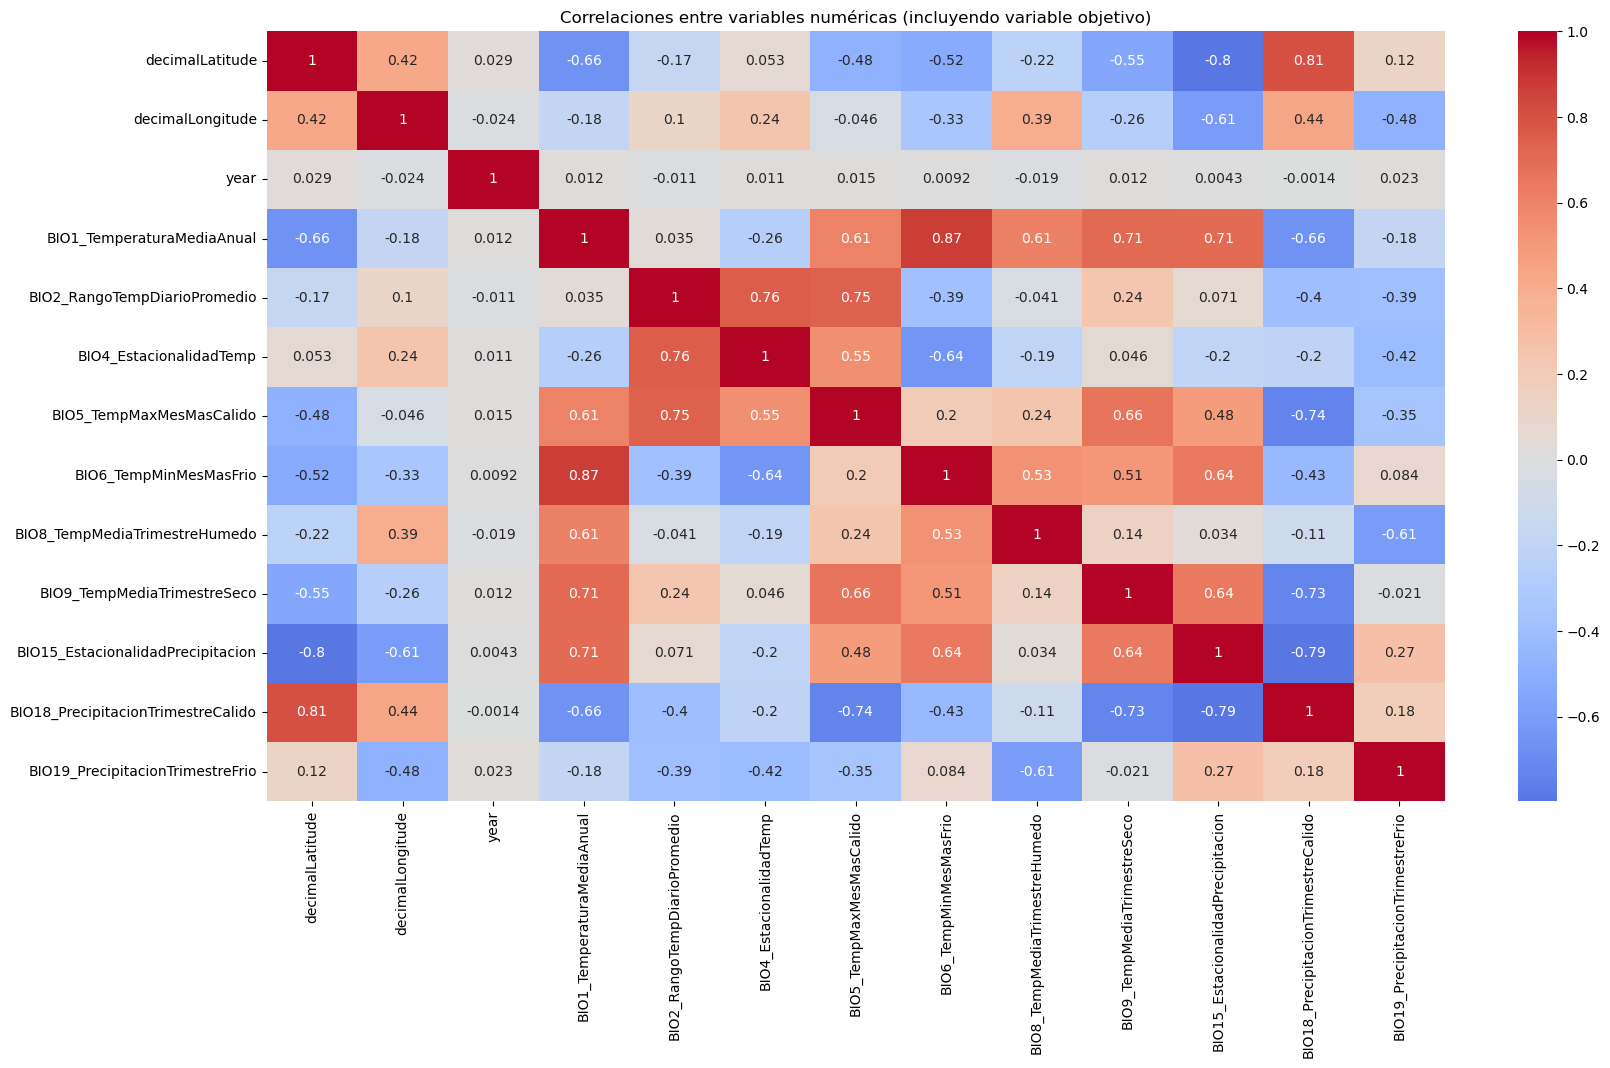

In [51]:
# Correlaciones de variables significativas (aquellas con varianza > 0.01 y que no presentan alta multicolinealidad)

# Seleccionar las columnas numéricas significativas del dataset
sig_var = [
    'decimalLatitude', 'decimalLongitude', 'year', 'BIO1_TemperaturaMediaAnual',
    'BIO2_RangoTempDiarioPromedio', 'BIO4_EstacionalidadTemp', 'BIO5_TempMaxMesMasCalido',
    'BIO6_TempMinMesMasFrio', 'BIO8_TempMediaTrimestreHumedo',
    'BIO9_TempMediaTrimestreSeco', 'BIO15_EstacionalidadPrecipitacion',
    'BIO18_PrecipitacionTrimestreCalido', 'BIO19_PrecipitacionTrimestreFrio'
]

# Crear subconjunto con las columnas numéricas significativas
data_numeric_corr = data[sig_var]

# Calcular matriz de correlación usando el coeficiente de Pearson
correlation_matrix = data_numeric_corr.corr(method='pearson')

# Visualizar la matriz de correlación como un mapa de calor (heatmap)
plt.figure(figsize=(19, 10))  # Tamaño del gráfico
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, center=0)  # Color, valores anotados, centrado en 0
plt.title("Correlaciones entre variables numéricas (incluyendo variable objetivo)")
plt.show()

El último paso antes de realizar los modelos de Machine Learning es dejar el conjunto de datos original ("data") y un nuevo conjunto de datos con las variables significativas ("data_sig") preparados antes de modelar con los algoritmos de *Machine Learning*, ya que de estos se obtendrán los conjuntos de datos normalizados y estandarizados necesarios. En primer lugar, en "data" se van a eliminar las variables que contienen información que no es útil para los análisis:

   * "species": Nombre de las especies.
   * "scientificName": Nombre científico de las especies.
   * "redlistCategory": Categoría de amenaza de las especies que coinciden exactamente con las categorías de "iucnRedListCategory" (variable objetivo).

En segundo lugar, también en "data", las variables categóricas deben transformarse en valores numéricos para ser interpretables por la mayoría de algoritmos de *Machine Learning* que no aceptan directamente entradas categóricas. Se transformarán en enteros int32, que son codificaciones *one-hot* para categorías, mediante 'LabelEncoder'.

Por último, se realizará la selección de variables significativas para evitar problemas de multicolinealidad, que puede distorsionar los resultados de muchos modelos predictivos, especialmente aquellos sensibles a relaciones lineales entre variables. Se obtendrá del conjunto de datos original ("data") aquellas variables que no tenían varianza cero o cercana a cero, y que el análisis de correlaciones, no presentaron alta colinealidad entre sí y para aquellas que sí la presentaron, se eliminarán aquellas que tuviesen alta colinealidad con un mayor número de variables. Las variables significativas finalmente serán las siguientes: 'decimalLatitude', 'decimalLongitude', 'year', 'populationTrend', 'systems', 'iucnRedListCategory', 'BIO1_TemperaturaMediaAnual', 'BIO2_RangoTempDiarioPromedio', 'BIO4_EstacionalidadTemp', 'BIO5_TempMaxMesMasCalido', 'BIO6_TempMinMesMasFrio', 'BIO8_TempMediaTrimestreHumedo', 'BIO9_TempMediaTrimestreSeco', 'BIO15_EstacionalidadPrecipitacion', 'BIO18_PrecipitacionTrimestreCalido', 'BIO19_PrecipitacionTrimestreFrio'.

Finalmente, se obtendrán dos *dataframes*, uno con todas la variables útiles sin escalar ("data") y con todas la variables significativas sin escalar ("data_sig"), aunque solo se utilizará "data_sig" para realizar la división y escalado para los sucesivos análisis con *Machine Learning*.

In [79]:
# Preparación de los dataframes antes de la división en entrenamiento y prueba

# Eliminar columnas que no son útiles para el modelado
# Estas columnas no aportan valor predictivo directamente o son duplicadas de la variable objetivo
data = data.drop(['species', 'scientificName', 'redlistCategory'], axis=1)

# Codificación de variables categóricas usando, 'LabelEncoder', a valores enteros int32 (codificaciones one-hot para categorías)
# Para los datos originales
data['populationTrend'] = LabelEncoder().fit_transform(data['populationTrend']).astype('int32')
data['systems'] = LabelEncoder().fit_transform(data['systems']).astype('int32')
data['iucnRedListCategory'] = LabelEncoder().fit_transform(data['iucnRedListCategory']).astype('int32')

# Selección de variables significativas elegidas previamente por criterios estadísticos (correlaciones y contraste de hipótesis)
sig_var = [
    'decimalLatitude', 'decimalLongitude', 'year', 'populationTrend', 'systems','iucnRedListCategory',
    'BIO1_TemperaturaMediaAnual', 'BIO2_RangoTempDiarioPromedio', 'BIO4_EstacionalidadTemp',
    'BIO5_TempMaxMesMasCalido', 'BIO6_TempMinMesMasFrio', 'BIO8_TempMediaTrimestreHumedo',
    'BIO9_TempMediaTrimestreSeco', 'BIO15_EstacionalidadPrecipitacion',
    'BIO18_PrecipitacionTrimestreCalido', 'BIO19_PrecipitacionTrimestreFrio'
]

# Crear nuevo DataFrame que contiene solo las variables significativas
data_sig = data[sig_var].copy()

In [80]:
# Mostrar información general sobre cada DataFrame para comprobar las modificaciones
data.info()
data_sig.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129596 entries, 0 to 137654
Data columns (total 25 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   decimalLatitude                     129596 non-null  float64
 1   decimalLongitude                    129596 non-null  float64
 2   year                                129596 non-null  int64  
 3   populationTrend                     129596 non-null  int32  
 4   systems                             129596 non-null  int32  
 5   iucnRedListCategory                 129596 non-null  int32  
 6   BIO1_TemperaturaMediaAnual          129596 non-null  float64
 7   BIO2_RangoTempDiarioPromedio        129596 non-null  float64
 8   BIO3_Isotermalidad                  129596 non-null  float64
 9   BIO4_EstacionalidadTemp             129596 non-null  float64
 10  BIO5_TempMaxMesMasCalido            129596 non-null  float64
 11  BIO6_TempMinMesMasFrio         

En este apartado se va a realizar la división en conjuntos de entrenamiento y prueba del *dataframe* "data_sig", manteniendo la proporción de clases de la variable objetivo "iucnRedListCategory" mediante muestreo estratificado.

Dividir el conjunto de datos garantiza que el modelo se entrene sobre un subconjunto y se evalúe en otro que no ha visto antes, evitando el sobreajuste (overfitting) y permitiendo medir su capacidad de generalización. El muestreo estratificado preserva la distribución de clases, lo cual es crucial si la variable objetivo está desbalanceada, y se realiza con el atributo 'stratify'. Se crearán *dataframes* de entrenamiento y prueba, utilizando la función 'train_test_split', con el 70% de las muestras para entrenamiento y el 30% para prueba, que son los porcentajes utilizados de manera generalizada para entrenar y validar los modelos de *Machine Learning*.

In [81]:
# División en entrenamiento y prueba

# -------------- División para data (todas) -------------------
# Variables predictoras (todas menos la columna objetivo)
X = data.drop(columns=['iucnRedListCategory'])

# Variable objetivo
y = data['iucnRedListCategory']

# División estratificada: 70% para entrenamiento, 30% para prueba
# - stratify=y_norm asegura que se mantenga la proporción de clases en ambos subconjuntos
# - random_state=42 garantiza reproducibilidad
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# -------------- División para data_sig (significativas) -------------------
# Variables predictoras (todas menos la columna objetivo)
X_sig = data_sig.drop(columns=['iucnRedListCategory'])

# Variable objetivo
y_sig = data_sig['iucnRedListCategory']

# División estratificada: 70% para entrenamiento, 30% para prueba
X_sig_train, X_sig_test, y_sig_train, y_sig_test = train_test_split(X_sig, y_sig, test_size=0.3, stratify=y_sig, random_state=42)


# Comprobación de la división de todas las variables
print(f"Número de entradas para los datos de entrenamiento: {X_train.shape[0]}")
print(f"Número de entradas para los datos de test: {X_test.shape[0]}")

# Comprobación de la división de las variables significativas
print(f"Número de entradas para los datos de entrenamiento: {X_sig_train.shape[0]}")
print(f"Número de entradas para los datos de test: {X_sig_test.shape[0]}")

Número de entradas para los datos de entrenamiento: 90717
Número de entradas para los datos de test: 38879
Número de entradas para los datos de entrenamiento: 90717
Número de entradas para los datos de test: 38879


**MACHINE LEARNING**

Algoritmo KNN sin ajuste de hiperparámetros

<Figure size 800x600 with 0 Axes>

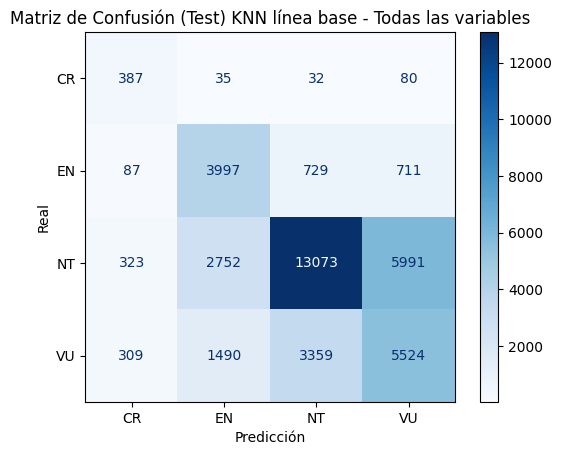

<Figure size 800x600 with 0 Axes>

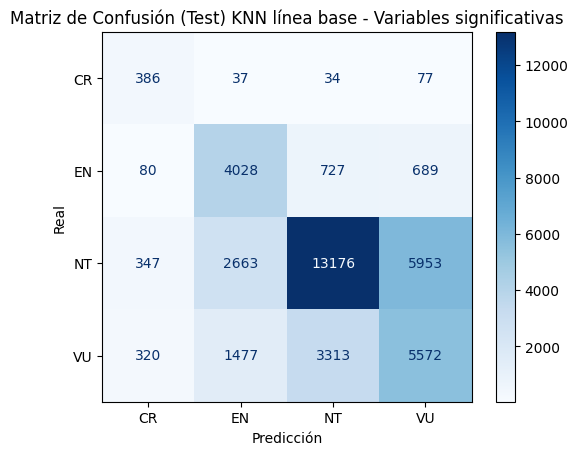


Resultados finales del algoritmo KNN en línea base:


Datos  Test Accuracy  Test Recall  Test F1-score  \
0       Todas las variables       0.591090     0.638979       0.549165   
1  Variables significativas       0.595746     0.642201       0.551001   

   Test Roc-auc  Test Kappa  CV Accuracy  CV Recall_macro  CV F1_macro  \
0      0.796308    0.351549     0.591256         0.640159     0.546537   
1      0.799349    0.358437     0.594056         0.643539     0.548327   

   CV Roc-auc  CV Kappa  
0    0.798023  0.352526  
1    0.800689  0.355966

In [26]:
# Importación de bibliotecas necesarias
from sklearn.neighbors import KNeighborsClassifier  # Clasificador K-Nearest Neighbors
from sklearn.model_selection import StratifiedKFold, cross_val_score  # Validación cruzada estratificada y evaluación por CV
from sklearn.metrics import (  # Métricas de evaluación
    accuracy_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score
)
from sklearn.preprocessing import MinMaxScaler # Normalización MinMax
from imblearn.over_sampling import SMOTE  # Técnica de sobremuestreo para equilibrar clases minoritarias
from imblearn.pipeline import Pipeline as ImbPipeline #Creación de pipelines

# Definición de la función para entrenar, validar y evaluar un modelo KNN usando un pipeline
def evaluate_knn(X_train, X_test, y_train, y_test, data_type):
    results = {} # Diccionario para almacenar las métricas de evaluación

    # Pipeline de procesamiento y modelado con técnicas de balanceo y escalado 
    pipeline = ImbPipeline([
        ('scaler', MinMaxScaler()), # Escalado MinMax
        ('smote', SMOTE(random_state=42)), # Balanceo con SMOTE
        ('knn', KNeighborsClassifier()) # Algoritmo KNN para entrenar
    ])

    # Configura la validación cruzada estratificada de 5 particiones, con barajado
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Lista de métricas a evaluar usando cross_val_score
    metrics = ['accuracy', 'recall_macro', 'f1_macro']

    # Recorre cada métrica para evaluarla mediante validación cruzada
    for metric in metrics:
        # Calcula la media de la métrica en las 5 particiones
        score = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=metric).mean()
        # Guarda la métrica con formato legible
        results[f'CV {metric.capitalize()}'] = score

    # Inicializa listas para guardar AUC y Kappa por cada fold manualmente
    auc_scores = []
    kappa_scores = []

    # Validación cruzada manual para calcular AUC y Kappa (no soportados directamente en cross_val_score)
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        # Entrena el modelo en el fold actual
        pipeline.fit(X_tr, y_tr)

        # Intenta predecir probabilidades para calcular AUC (puede fallar si no se soporta)
        try:
            probas = pipeline.predict_proba(X_val)
            # AUC multiclase usando estrategia "one-vs-rest" y promedio macro
            auc = roc_auc_score(y_val, probas, multi_class='ovr', average='macro')
            auc_scores.append(auc)
        except:
            # Si no se puede calcular, añade un NaN
            auc_scores.append(np.nan)

        # Predicción de clases para calcular Kappa
        y_val_pred = pipeline.predict(X_val)
        # Añade el valor de Kappa para el fold actual
        kappa_scores.append(cohen_kappa_score(y_val, y_val_pred))

    # Calcula el promedio de AUC (ignorando NaNs) y Kappa
    results['CV Roc-auc'] = np.nanmean(auc_scores)
    results['CV Kappa'] = np.mean(kappa_scores)

    # Entrena el modelo final sobre todo el conjunto de entrenamiento
    pipeline.fit(X_train, y_train)

    # Realiza predicciones sobre el conjunto de prueba
    y_pred = pipeline.predict(X_test)

    # Almacena el tipo de datos evaluado
    results['Datos'] = data_type

    # Calcula las métricas de evaluación en el conjunto de prueba
    results['Test Accuracy'] = accuracy_score(y_test, y_pred) # Precisión
    results['Test Recall'] = recall_score(y_test, y_pred, average='macro') # Recall macro
    results['Test F1-score'] = f1_score(y_test, y_pred, average='macro')  # F1-score macro
    results['Test Kappa'] = cohen_kappa_score(y_test, y_pred) # Kappa de Cohen

    # Intenta calcular el AUC sobre el conjunto de prueba
    try:
        y_proba = pipeline.predict_proba(X_test)
        results['Test Roc-auc'] = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
    except:
        results['Test Roc-auc'] = 'N/A' # Si falla, se asigna 'N/A'

    # Genera la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Define las etiquetas de clase en formato interpretable
    class_labels = ['CR', 'EN', 'NT', 'VU']

    # Inicializa el objeto para visualizar la matriz
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

    # Configura el tamaño de la figura
    plt.figure(figsize=(8, 6))

    # Muestra la matriz con estilo azul y valores como enteros
    disp.plot(cmap='Blues', values_format='d')

    # Título ejes
    plt.title(f'Matriz de Confusión (Test) KNN línea base - {data_type}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')

    # Muestra el gráfico
    plt.show()

    # Devuelve el diccionario con todas las métricas
    return results

# Ejecuta la función de evaluación sobre cada conjunto de datos

# Inicializa lista para almacenar resultados de los datasets
knn_results = []

# Todas las variables
knn_results.append(evaluate_knn(X_train.values, X_test.values, y_train.values, y_test.values, 'Todas las variables'))

# Variables significativas
knn_results.append(evaluate_knn(X_sig_train.values, X_sig_test.values, y_sig_train.values, y_sig_test.values, 'Variables significativas'))

# Crea un DataFrame con todos los resultados recopilados
knn_df = pd.DataFrame(knn_results)

# Muestra los resultados seleccionados de forma tabular
print("\nResultados finales del algoritmo KNN en línea base:")
display(knn_df[
    ['Datos',
     'Test Accuracy', 'Test Recall', 'Test F1-score', 'Test Roc-auc', 'Test Kappa',
     'CV Accuracy', 'CV Recall_macro', 'CV F1_macro', 'CV Roc-auc', 'CV Kappa']
])

Algoritmo KNN con ajuste de hiperparámetros

Mejores hiperparámetros para KNN - Todas las variables :
 - knn__algorithm: ball_tree
 - knn__metric: euclidean
 - knn__n_neighbors: 1
 - knn__weights: uniform


<Figure size 800x600 with 0 Axes>

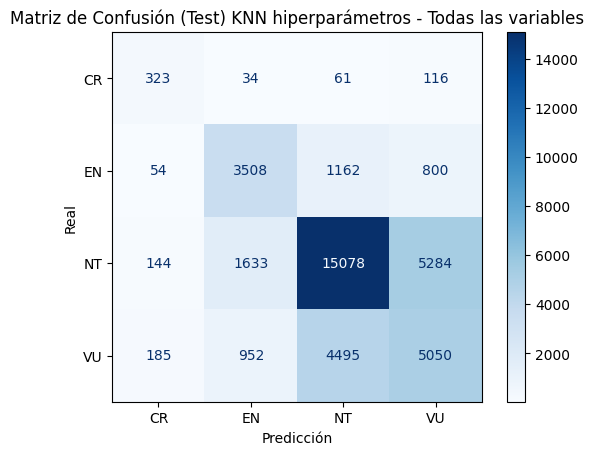

Mejores hiperparámetros para KNN - Variables significativas :
 - knn__algorithm: brute
 - knn__metric: euclidean
 - knn__n_neighbors: 1
 - knn__weights: uniform


<Figure size 800x600 with 0 Axes>

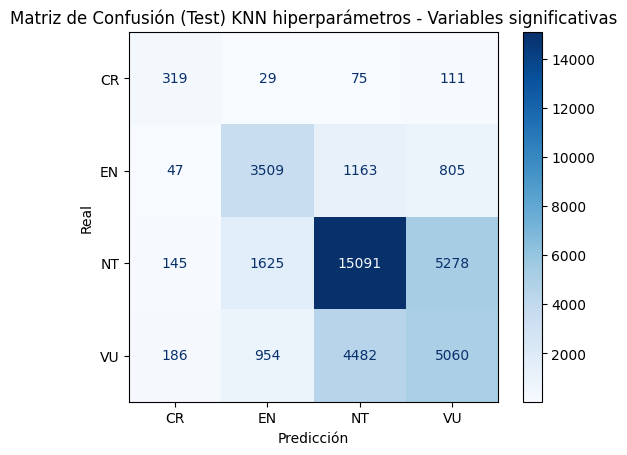


Resultados finales del algoritmo KNN con ajuste de hiperparámetros:


Datos  Test Accuracy  Test Recall  Test F1-score  \
0       Todas las variables       0.616245     0.598434       0.571507   
1  Variables significativas       0.616760     0.596987       0.571303   

   Test Roc-auc  Test Kappa  CV Accuracy  CV Recall_macro  CV F1_macro  \
0      0.717971    0.353158     0.612123         0.595655     0.565173   
1      0.717317    0.353798     0.614141         0.599188     0.567642   

   CV Roc-auc  CV Kappa  
0    0.715707  0.346981  
1    0.717848  0.350070

In [27]:
# Importación de bibliotecas necesarias
from sklearn.neighbors import KNeighborsClassifier  # Clasificador K-Nearest Neighbors
# Validación cruzada estratificada, evaluación por CV y búsqueda de hiperparámetros por CV
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import (  # Métricas de evaluación
    accuracy_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score
)
from sklearn.preprocessing import MinMaxScaler # Normalización MinMax
from imblearn.over_sampling import SMOTE  # Técnica de sobremuestreo para equilibrar clases minoritarias
from imblearn.pipeline import Pipeline as ImbPipeline #Creación de pipelines


# Función para buscar mejores hiperparámetros de KNN
def get_best_knn_params(X, y, data_type):

    # Definición de la grilla de búsqueda de hiperparámetros de KNN
    param_grid = {
        'knn__n_neighbors': [1, 3, 5, 7, 9],
        'knn__weights': ['uniform', 'distance'],
        'knn__metric': ['euclidean', 'manhattan'],
        'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }

    # Pipeline de procesamiento y modelado con técnicas de balanceo y escalado
    pipeline = ImbPipeline([
        ('scaler', MinMaxScaler()), # Escalado MinMax
        ('smote', SMOTE(random_state=42)), # Balanceo con SMOTE
        ('knn', KNeighborsClassifier()) # Algoritmo KNN para entrenar
    ])

    # Configura la validación cruzada estratificada de 5 particiones, con barajado
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Búsqueda de hiperparámetros con GridSearch mediante validación cruzada y puntuación basada en F1-score macro
    grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring='f1_macro', n_jobs=-1)
    # Ajuste del modelo con búsqueda de hiperparámetros
    grid.fit(X, y)

    # Recuperar los hiperparámetros óptimos encontrados
    print(f"Mejores hiperparámetros para KNN - {data_type} :")
    for k, v in grid.best_params_.items():
        print(f" - {k}: {v}")

    # Obtener esos mejores hiperparámetros
    return grid.best_params_


# Función para ajustar hiperparámetros, entrenar y evaluar KNN
def evaluate_knn_with_params(X_train, X_test, y_train, y_test, data_type, best_params):
    results = {} # Diccionario para almacenar las métricas de evaluación

    # Diseño del modelo KNN con los mejores hiperparámetros encontrados con la función
    knn = KNeighborsClassifier(
        n_neighbors=best_params['knn__n_neighbors'],
        weights=best_params['knn__weights'],
        metric=best_params['knn__metric'],
        algorithm=best_params['knn__algorithm']
    )

    # Pipeline de procesamiento y modelado con técnicas de balanceo y escalado
    pipeline = ImbPipeline([
        ('scaler', MinMaxScaler()), # Escalado MinMax
        ('smote', SMOTE(random_state=42)), # Balanceo con SMOTE
        ('knn', knn) # Algoritmo KNN con hiperparámetros para entrenar
    ])

    # Configura la validación cruzada estratificada de 5 particiones, con barajado
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Recorre cada métrica para evaluarla mediante validación cruzada
    for metric in ['accuracy', 'recall_macro', 'f1_macro']:
        # Calcula la media de la métrica en las 5 particiones
        score = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=metric).mean()
        # Guarda la métrica con formato legible
        results[f'CV {metric.capitalize()}'] = score

    # Inicializa listas para guardar AUC y Kappa por cada fold manualmente
    auc_scores = []
    kappa_scores = []

    # Validación cruzada manual para calcular AUC y Kappa (no soportados directamente en cross_val_score)
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        # Entrena el modelo en el fold actual
        pipeline.fit(X_tr, y_tr)

        # Intenta predecir probabilidades para calcular AUC (puede fallar si no se soporta)
        try:
            probas = pipeline.predict_proba(X_val)
            # AUC multiclase usando estrategia "one-vs-rest" y promedio macro
            auc = roc_auc_score(y_val, probas, multi_class='ovr', average='macro')
            auc_scores.append(auc)
        except:
            # Si no se puede calcular, añade un NaN
            auc_scores.append(np.nan)

        # Predicción de clases para calcular Kappa
        y_val_pred = pipeline.predict(X_val)
        # Añade el valor de Kappa para el fold actual
        kappa_scores.append(cohen_kappa_score(y_val, y_val_pred))

    # Calcula el promedio de AUC (ignorando NaNs) y Kappa
    results['CV Roc-auc'] = np.nanmean(auc_scores)
    results['CV Kappa'] = np.mean(kappa_scores)

    # Entrena el modelo final sobre todo el conjunto de entrenamiento
    pipeline.fit(X_train, y_train)

    # Realiza predicciones sobre el conjunto de prueba
    y_pred = pipeline.predict(X_test)

    # Almacena el tipo de datos evaluado
    results['Datos'] = data_type
    
    # Calcula las métricas de evaluación en el conjunto de prueba
    results['Test Accuracy'] = accuracy_score(y_test, y_pred) # Precisión
    results['Test Recall'] = recall_score(y_test, y_pred, average='macro') # Recall macro
    results['Test F1-score'] = f1_score(y_test, y_pred, average='macro')  # F1-score macro
    results['Test Kappa'] = cohen_kappa_score(y_test, y_pred) # Kappa de Cohen

    # Intenta calcular el AUC sobre el conjunto de prueba
    try:
        y_proba = pipeline.predict_proba(X_test)
        results['Test Roc-auc'] = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
    except:
        results['Test Roc-auc'] = 'N/A' # Si falla, se asigna 'N/A'

    # Genera la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Define las etiquetas de clase en formato interpretable
    class_labels = ['CR', 'EN', 'NT', 'VU']

    # Inicializa el objeto para visualizar la matriz
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

    # Configura el tamaño de la figura
    plt.figure(figsize=(8, 6))

    # Muestra la matriz con estilo azul y valores como enteros
    disp.plot(cmap='Blues', values_format='d')

    # Título ejes
    plt.title(f'Matriz de Confusión (Test) KNN hiperparámetros - {data_type}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')

    # Muestra el gráfico
    plt.show()

    # Devuelve el diccionario con todas las métricas
    return results

# Ejecuta las funciones sobre cada conjunto de datos
    
# Inicializa lista para almacenar resultados de los datasets
knn_tuned_results = []

# Buscar mejores hiperparámetros para los datasets con todas las variables
best_knn_params = get_best_knn_params(X_train.values, y_train.values, 'Todas las variables')

# Todas las variables
knn_tuned_results.append(evaluate_knn_with_params(X_train.values, X_test.values, y_train.values, y_test.values,
                                                  'Todas las variables', best_params=best_knn_params))

# Buscar mejores hiperparámetros para los datasets con las variables significativas
best_knn_params_sig = get_best_knn_params(X_sig_train.values, y_sig_train.values, 'Variables significativas')

# Variables significativas
knn_tuned_results.append(evaluate_knn_with_params(X_sig_train.values, X_sig_test.values, y_sig_train.values, y_sig_test.values,
                                                  'Variables significativas', best_params=best_knn_params_sig))

# Crea un DataFrame con todos los resultados recopilados
knn_tuned_df = pd.DataFrame(knn_tuned_results)

# Muestra los resultados seleccionados de forma tabular
print("\nResultados finales del algoritmo KNN con ajuste de hiperparámetros:")
display(knn_tuned_df[
    ['Datos',
     'Test Accuracy', 'Test Recall', 'Test F1-score', 'Test Roc-auc', 'Test Kappa',
     'CV Accuracy', 'CV Recall_macro', 'CV F1_macro', 'CV Roc-auc', 'CV Kappa']
])


Algortimo Regresión Logística sin ajuste de hiperparámetros

<Figure size 800x600 with 0 Axes>

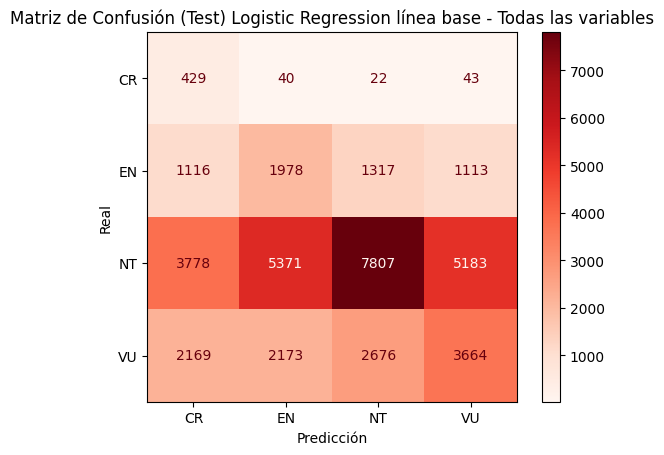

<Figure size 800x600 with 0 Axes>

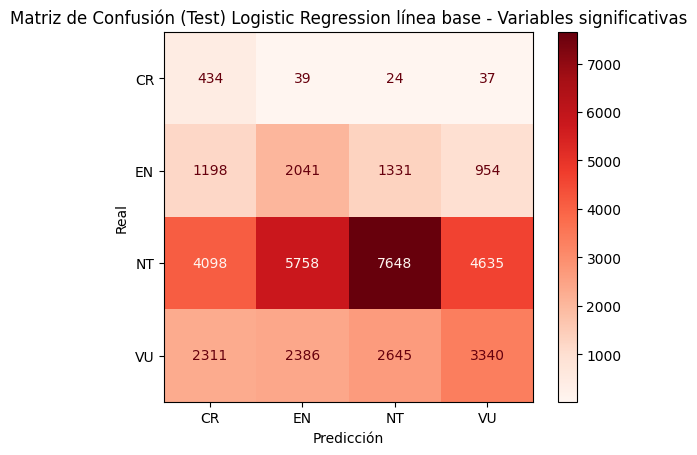


Resultados finales del algoritmo Regresión Logística en línea base:


Datos  Test Accuracy  Test Recall  Test F1-score  \
0       Todas las variables       0.356954     0.464272       0.295790   
1  Variables significativas       0.346279     0.460085       0.288284   

   Test Roc-auc  Test Kappa  CV Accuracy  CV Recall_macro  CV F1_macro  \
0      0.658665    0.105105     0.360660         0.468244     0.298920   
1      0.650413    0.099354     0.346738         0.459219     0.288483   

   CV Roc-auc  CV Kappa  
0    0.662583  0.111774  
1    0.650098  0.101330

In [28]:
# Importación de bibliotecas necesarias
from sklearn.linear_model import LogisticRegression # CLasificador Regresión Logística
from sklearn.model_selection import StratifiedKFold, cross_val_score  # Validación cruzada estratificada y evaluación por CV
from sklearn.metrics import (  # Métricas de evaluación
    accuracy_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score
)
from sklearn.preprocessing import StandardScaler # Estandarización Z-score
from imblearn.over_sampling import SMOTE  # Técnica de sobremuestreo para equilibrar clases minoritarias
from imblearn.pipeline import Pipeline as ImbPipeline #Creación de pipelines

# Definición de la función para entrenar, validar y evaluar un modelo Regresión Logística usando un pipeline
def evaluate_logreg(X_train, X_test, y_train, y_test, data_type):
    results = {} # Diccionario para almacenar las métricas de evaluación

    # Pipeline de procesamiento y modelado con técnicas de balanceo y escalado
    pipeline = ImbPipeline([
        ('scaler', StandardScaler()),  # Escalado Z-score
        ('smote', SMOTE(random_state=42)), # Balanceo con SMOTE
        ('logreg', LogisticRegression(max_iter=1000, random_state=42)) # Algoritmo Regresión Logística para entrenar
    ])

    # Configura la validación cruzada estratificada de 5 particiones, con barajado
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Lista de métricas a evaluar usando cross_val_score
    metrics = ['accuracy', 'recall_macro', 'f1_macro']

    # Recorre cada métrica para evaluarla mediante validación cruzada
    for metric in metrics:
        # Calcula la media de la métrica en las 5 particiones
        score = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=metric).mean()
        # Guarda la métrica con formato legible
        results[f'CV {metric.capitalize()}'] = score

    # Inicializa listas para guardar AUC y Kappa por cada fold manualmente
    auc_scores = []
    kappa_scores = []

    # Validación cruzada manual para calcular AUC y Kappa (no soportados directamente en cross_val_score)
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        # Entrena el modelo en el fold actual
        pipeline.fit(X_tr, y_tr)

        # Intenta predecir probabilidades para calcular AUC (puede fallar si no se soporta)
        try:
            probas = pipeline.predict_proba(X_val)
            # AUC multiclase usando estrategia "one-vs-rest" y promedio macro
            auc = roc_auc_score(y_val, probas, multi_class='ovr', average='macro')
            auc_scores.append(auc)
        except:
            # Si no se puede calcular, añade un NaN
            auc_scores.append(np.nan)

        # Predicción de clases para calcular Kappa
        y_val_pred = pipeline.predict(X_val)
        # Añade el valor de Kappa para el fold actual
        kappa_scores.append(cohen_kappa_score(y_val, y_val_pred))

    # Calcula el promedio de AUC (ignorando NaNs) y Kappa
    results['CV Roc-auc'] = np.nanmean(auc_scores)
    results['CV Kappa'] = np.mean(kappa_scores)

    # Entrena el modelo final sobre todo el conjunto de entrenamiento
    pipeline.fit(X_train, y_train)

    # Realiza predicciones sobre el conjunto de prueba
    y_pred = pipeline.predict(X_test)

    # Almacena el tipo de datos evaluado
    results['Datos'] = data_type

    # Calcula las métricas de evaluación en el conjunto de prueba
    results['Test Accuracy'] = accuracy_score(y_test, y_pred) # Precisión
    results['Test Recall'] = recall_score(y_test, y_pred, average='macro') # Recall macro
    results['Test F1-score'] = f1_score(y_test, y_pred, average='macro')  # F1-score macro
    results['Test Kappa'] = cohen_kappa_score(y_test, y_pred) # Kappa de Cohen

    # Intenta calcular el AUC sobre el conjunto de prueba
    try:
        y_proba = pipeline.predict_proba(X_test)
        results['Test Roc-auc'] = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
    except:
        results['Test Roc-auc'] = 'N/A' # Si falla, se asigna 'N/A'

    # Genera la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Define las etiquetas de clase en formato interpretable
    class_labels = ['CR', 'EN', 'NT', 'VU']

    # Inicializa el objeto para visualizar la matriz
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

    # Configura el tamaño de la figura
    plt.figure(figsize=(8, 6))

    # Muestra la matriz con estilo azul y valores como enteros
    disp.plot(cmap='Reds', values_format='d')

    # Título ejes
    plt.title(f'Matriz de Confusión (Test) Logistic Regression línea base - {data_type}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')

    # Muestra el gráfico
    plt.show()

    # Devuelve el diccionario con todas las métricas
    return results

# Ejecuta la función de evaluación sobre cada conjunto de datos

# Inicializa lista para almacenar resultados de los datasets
logreg_results = []

# Todas las variables
logreg_results.append(evaluate_logreg(X_train.values, X_test.values, y_train.values, y_test.values, 'Todas las variables'))

# Variables significativas
logreg_results.append(evaluate_logreg(X_sig_train.values, X_sig_test.values, y_sig_train.values, y_sig_test.values, 'Variables significativas'))

# Crea un DataFrame con todos los resultados recopilados
logreg_df = pd.DataFrame(logreg_results)

# Muestra los resultados seleccionados de forma tabular
print("\nResultados finales del algoritmo Regresión Logística en línea base:")
display(logreg_df[
    ['Datos',
     'Test Accuracy', 'Test Recall', 'Test F1-score', 'Test Roc-auc', 'Test Kappa',
     'CV Accuracy', 'CV Recall_macro', 'CV F1_macro', 'CV Roc-auc', 'CV Kappa']
])


Algortimo Regresión Logística con ajuste de hiperparámetros

Mejores hiperparámetros para Regresión Logística - Todas las variables :
 - logreg__C: 1
 - logreg__penalty: l2
 - logreg__solver: lbfgs


<Figure size 800x600 with 0 Axes>

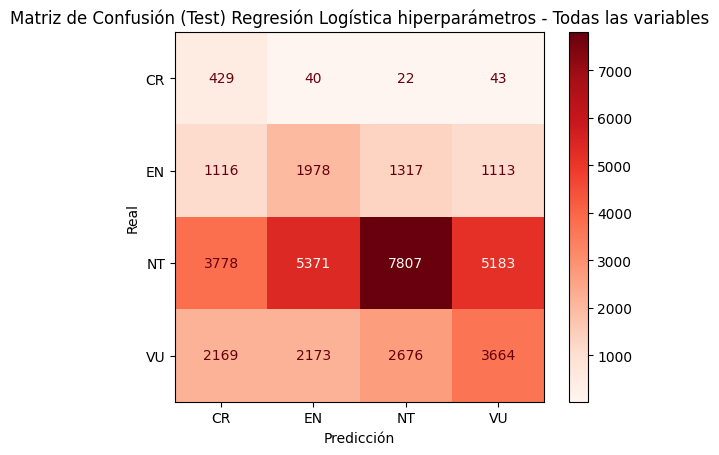

c:\Users\Jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Mejores hiperparámetros para Regresión Logística - Variables significativas :
 - logreg__C: 0.01
 - logreg__penalty: None
 - logreg__solver: newton-cg


c:\Users\Jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_rati

<Figure size 800x600 with 0 Axes>

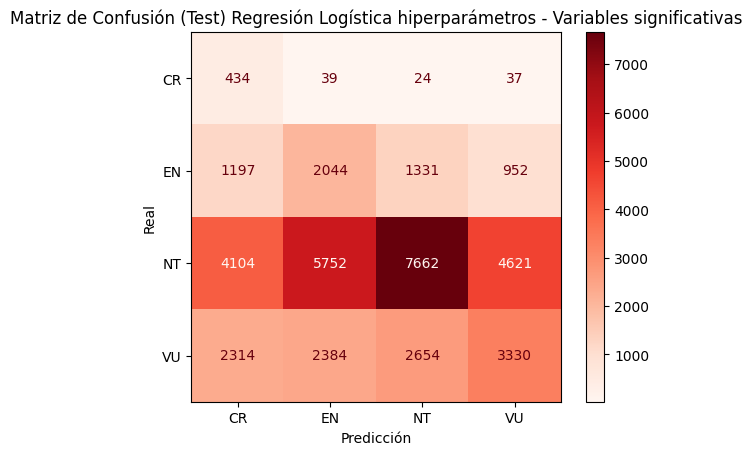


Resultados finales del algoritmo Regresión Logística con ajuste de hiperparámetros:


Datos  Test Accuracy  Test Recall  Test F1-score  \
0       Todas las variables       0.356954     0.464272       0.295790   
1  Variables significativas       0.346460     0.460145       0.288364   

   Test Roc-auc  Test Kappa  CV Accuracy  CV Recall_macro  CV F1_macro  \
0      0.658665    0.105105     0.360660         0.468244     0.298920   
1      0.650384    0.099431     0.347079         0.459249     0.288693   

   CV Roc-auc  CV Kappa  
0    0.662583  0.111774  
1    0.650089  0.101639

In [30]:
# Importación de bibliotecas necesarias
from sklearn.linear_model import LogisticRegression
# Validación cruzada estratificada, evaluación por CV y búsqueda de hiperparámetros por CV
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import (  # Métricas de evaluación
    accuracy_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score
)
from sklearn.preprocessing import StandardScaler # Estandarización Z-score
from imblearn.over_sampling import SMOTE  # Técnica de sobremuestreo para equilibrar clases minoritarias
from imblearn.pipeline import Pipeline as ImbPipeline #Creación de pipelines

# Función para buscar mejores hiperparámetros de Regresión Logística
def get_best_logreg_params(X, y, data_type):

    # Definición de la grilla de búsqueda de hiperparámetros de Regresión Logística
    param_grid = {
        'logreg__penalty': ['l2', None],
        'logreg__C': [0.01, 0.1, 1, 10, 100],
        'logreg__solver': ['lbfgs', 'saga', 'newton-cg']
    }

    # Pipeline de procesamiento y modelado con técnicas de balanceo y escalado
    pipeline = ImbPipeline([
        ('scaler', StandardScaler()), # Escalado Z-score
        ('smote', SMOTE(random_state=42)), # Balanceo con SMOTE
        ('logreg', LogisticRegression(max_iter=5000, random_state=42)) # Algoritmo Regresión Logística para entrenar
    ])

    # Configura la validación cruzada estratificada de 5 particiones, con barajado
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Búsqueda de hiperparámetros con GridSearch mediante validación cruzada y puntuación basada en F1-score macro
    grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring='f1_macro', n_jobs=-1)
    # Ajuste del modelo con búsqueda de hiperparámetros
    grid.fit(X, y)

    # Recuperar los hiperparámetros óptimos encontrados
    print(f"Mejores hiperparámetros para Regresión Logística - {data_type} :")
    for k, v in grid.best_params_.items():
        print(f" - {k}: {v}")

    # Obtener esos mejores hiperparámetros
    return grid.best_params_

# Función para ajustar hiperparámetros, entrenar y evaluar Regresión Logística
def evaluate_logreg_with_params(X_train, X_test, y_train, y_test, data_type, best_params):
    results = {} # Diccionario para almacenar las métricas de evaluación

    # Diseño del modelo Regresión Logística con los mejores hiperparámetros encontrados con la función
    logreg = LogisticRegression(
        penalty=best_params['logreg__penalty'],
        C=best_params['logreg__C'],
        solver=best_params['logreg__solver'],
        max_iter=5000,
        random_state=42
    )

    # Pipeline de procesamiento y modelado con técnicas de balanceo y escalado
    pipeline = ImbPipeline([
        ('scaler', StandardScaler()), # Escalado Z-score
        ('smote', SMOTE(random_state=42)), # Balanceo con SMOTE
        ('logreg', logreg) # Algoritmo Regresión Logística con hiperparámetros para entrenar
    ])

    # Configura la validación cruzada estratificada de 5 particiones, con barajado
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Recorre cada métrica para evaluarla mediante validación cruzada
    for metric in ['accuracy', 'recall_macro', 'f1_macro']:
        # Calcula la media de la métrica en las 5 particiones
        score = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=metric).mean()
        # Guarda la métrica con formato legible
        results[f'CV {metric.capitalize()}'] = score

    # Inicializa listas para guardar AUC y Kappa por cada fold manualmente
    auc_scores = []
    kappa_scores = []

    # Validación cruzada manual para calcular AUC y Kappa (no soportados directamente en cross_val_score)
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        # Entrena el modelo en el fold actual
        pipeline.fit(X_tr, y_tr)

        # Intenta predecir probabilidades para calcular AUC (puede fallar si no se soporta)
        try:
            probas = pipeline.predict_proba(X_val)
            # AUC multiclase usando estrategia "one-vs-rest" y promedio macro
            auc = roc_auc_score(y_val, probas, multi_class='ovr', average='macro')
            auc_scores.append(auc)
        except:
            # Si no se puede calcular, añade un NaN
            auc_scores.append(np.nan)

        # Predicción de clases para calcular Kappa
        y_val_pred = pipeline.predict(X_val)
        kappa_scores.append(cohen_kappa_score(y_val, y_val_pred))

    # Calcula el promedio de AUC (ignorando NaNs) y Kappa
    results['CV Roc-auc'] = np.nanmean(auc_scores)
    results['CV Kappa'] = np.mean(kappa_scores)

    # Entrena el modelo final sobre todo el conjunto de entrenamiento
    pipeline.fit(X_train, y_train)

    # Realiza predicciones sobre el conjunto de prueba
    y_pred = pipeline.predict(X_test)

    # Almacena el tipo de datos evaluado
    results['Datos'] = data_type
    
    # Calcula las métricas de evaluación en el conjunto de prueba
    results['Test Accuracy'] = accuracy_score(y_test, y_pred) # Precisión
    results['Test Recall'] = recall_score(y_test, y_pred, average='macro') # Recall macro
    results['Test F1-score'] = f1_score(y_test, y_pred, average='macro')  # F1-score macro
    results['Test Kappa'] = cohen_kappa_score(y_test, y_pred) # Kappa de Cohen

    # Intenta calcular el AUC sobre el conjunto de prueba
    try:
        y_proba = pipeline.predict_proba(X_test)
        results['Test Roc-auc'] = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
    except:
        results['Test Roc-auc'] = 'N/A' # Si falla, se asigna 'N/A'

    # Genera la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Define las etiquetas de clase en formato interpretable
    class_labels = ['CR', 'EN', 'NT', 'VU']

    # Inicializa el objeto para visualizar la matriz
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

    # Configura el tamaño de la figura
    plt.figure(figsize=(8, 6))

    # Muestra la matriz con estilo azul y valores como enteros
    disp.plot(cmap='Reds', values_format='d')

    # Título ejes
    plt.title(f'Matriz de Confusión (Test) Regresión Logística hiperparámetros - {data_type}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')

    # Muestra el gráfico
    plt.show()

    # Devuelve el diccionario con todas las métricas
    return results

# Ejecuta las funciones sobre cada conjunto de datos

# Inicializa lista para almacenar resultados de los datasets
logreg_tuned_results = []

# Buscar mejores hiperparámetros para los datasets con todas las variables
best_logreg_params = get_best_logreg_params(X_train.values, y_train.values, 'Todas las variables')

# Todas las variables
logreg_tuned_results.append(evaluate_logreg_with_params(X_train.values, X_test.values, y_train.values, y_test.values,
                                                        'Todas las variables', best_params=best_logreg_params))

# Buscar mejores hiperparámetros para los datasets con las variables significativas
best_logreg_params_sig = get_best_logreg_params(X_sig_train.values, y_sig_train.values, 'Variables significativas')

# Variables significativas
logreg_tuned_results.append(evaluate_logreg_with_params(X_sig_train.values, X_sig_test.values, y_sig_train.values, y_sig_test.values,
                                                        'Variables significativas', best_params=best_logreg_params_sig))

# Crea un DataFrame con todos los resultados recopilados
logreg_tuned_df = pd.DataFrame(logreg_tuned_results)

# Muestra los resultados seleccionados de forma tabular
print("\nResultados finales del algoritmo Regresión Logística con ajuste de hiperparámetros:")
display(logreg_tuned_df[
    ['Datos',
     'Test Accuracy', 'Test Recall', 'Test F1-score', 'Test Roc-auc', 'Test Kappa',
     'CV Accuracy', 'CV Recall_macro', 'CV F1_macro', 'CV Roc-auc', 'CV Kappa']
])


Algoritmo Random Forest sin ajuste de hiperparámetros

<Figure size 800x600 with 0 Axes>

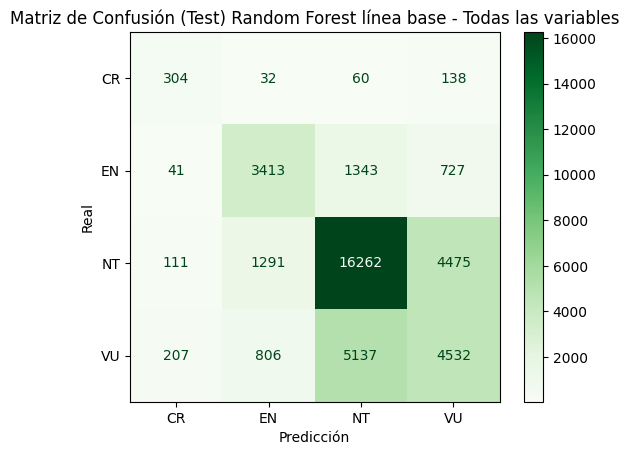

<Figure size 800x600 with 0 Axes>

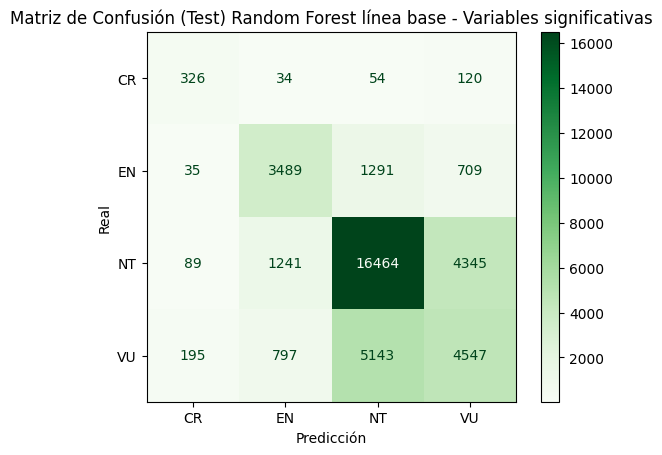


Resultados finales del algoritmo Random Forest en línea base:


Datos  Test Accuracy  Test Recall  Test F1-score  \
0       Todas las variables       0.630443     0.586486       0.572368   
1  Variables significativas       0.638545     0.602857       0.589621   

   Test Roc-auc  Test Kappa  CV Accuracy  CV Recall_macro  CV F1_macro  \
0      0.813831    0.358168     0.629452         0.578239     0.568090   
1      0.823918    0.370936     0.637709         0.595619     0.583346   

   CV Roc-auc  CV Kappa  
0    0.813752  0.354152  
1    0.823622  0.368158

In [31]:
# Importación de bibliotecas necesarias
from sklearn.ensemble import RandomForestClassifier # Clasificador Random Forest
from sklearn.model_selection import StratifiedKFold, cross_val_score  # Validación cruzada estratificada y evaluación por CV
from sklearn.metrics import (  # Métricas de evaluación
    accuracy_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score
)
from imblearn.over_sampling import SMOTE  # Técnica de sobremuestreo para equilibrar clases minoritarias
from imblearn.pipeline import Pipeline as ImbPipeline #Creación de pipelines

# Definición de la función para entrenar, validar y evaluar un modelo Random Forest usando un pipeline
def evaluate_rf(X_train, X_test, y_train, y_test, data_type):
    results = {} # Diccionario para almacenar las métricas de evaluación

    # Pipeline de procesamiento y modelado con técnicas de balanceo
    pipeline = ImbPipeline([ # Sin escalado
        ('smote', SMOTE(random_state=42)), # Balanceo con SMOTE
        ('rf', RandomForestClassifier(random_state=42)) # Algoritmo Random Forest para entrenar
    ])

    # Configura la validación cruzada estratificada de 5 particiones, con barajado
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Lista de métricas a evaluar usando cross_val_score
    metrics = ['accuracy', 'recall_macro', 'f1_macro']

    # Recorre cada métrica para evaluarla mediante validación cruzada
    for metric in metrics:
        # Calcula la media de la métrica en las 5 particiones
        score = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=metric).mean()
        # Guarda la métrica con formato legible
        results[f'CV {metric.capitalize()}'] = score

    # Inicializa listas para guardar AUC y Kappa por cada fold manualmente
    auc_scores = []
    kappa_scores = []

    # Validación cruzada manual para calcular AUC y Kappa (no soportados directamente en cross_val_score)
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        # Entrena el modelo en el fold actual
        pipeline.fit(X_tr, y_tr)

        # Intenta predecir probabilidades para calcular AUC (puede fallar si no se soporta)
        try:
            probas = pipeline.predict_proba(X_val)
            # AUC multiclase usando estrategia "one-vs-rest" y promedio macro
            auc = roc_auc_score(y_val, probas, multi_class='ovr', average='macro')
            auc_scores.append(auc)
        except:
            # Si no se puede calcular, añade un NaN
            auc_scores.append(np.nan)

        # Predicción de clases para calcular Kappa
        y_val_pred = pipeline.predict(X_val)
        # Añade el valor de Kappa para el fold actual
        kappa_scores.append(cohen_kappa_score(y_val, y_val_pred))

    # Calcula el promedio de AUC (ignorando NaNs) y Kappa
    results['CV Roc-auc'] = np.nanmean(auc_scores)
    results['CV Kappa'] = np.mean(kappa_scores)

    # Entrena el modelo final sobre todo el conjunto de entrenamiento
    pipeline.fit(X_train, y_train)

    # Realiza predicciones sobre el conjunto de prueba
    y_pred = pipeline.predict(X_test)

    # Almacena el tipo de datos evaluado
    results['Datos'] = data_type

    # Calcula las métricas de evaluación en el conjunto de prueba
    results['Test Accuracy'] = accuracy_score(y_test, y_pred) # Precisión
    results['Test Recall'] = recall_score(y_test, y_pred, average='macro') # Recall macro
    results['Test F1-score'] = f1_score(y_test, y_pred, average='macro')  # F1-score macro
    results['Test Kappa'] = cohen_kappa_score(y_test, y_pred) # Kappa de Cohen

    # Intenta calcular el AUC sobre el conjunto de prueba
    try:
        y_proba = pipeline.predict_proba(X_test)
        results['Test Roc-auc'] = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
    except:
        results['Test Roc-auc'] = 'N/A' # Si falla, se asigna 'N/A'

    # Genera la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Define las etiquetas de clase en formato interpretable
    class_labels = ['CR', 'EN', 'NT', 'VU']

    # Inicializa el objeto para visualizar la matriz
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

    # Configura el tamaño de la figura
    plt.figure(figsize=(8, 6))

    # Muestra la matriz con estilo verde y valores como enteros
    disp.plot(cmap='Greens', values_format='d')

    # Título ejes
    plt.title(f'Matriz de Confusión (Test) Random Forest línea base - {data_type}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')

    # Muestra el gráfico
    plt.show()

    # Devuelve el diccionario con todas las métricas
    return results

# Ejecuta la función de evaluación sobre cada conjunto de datos

# Inicializa lista para almacenar resultados de los datasets
rf_results = []

# Todas las variables
rf_results.append(evaluate_rf(X_train.values, X_test.values, y_train.values, y_test.values, 'Todas las variables'))

# Variables significativas
rf_results.append(evaluate_rf(X_sig_train.values, X_sig_test.values, y_sig_train.values, y_sig_test.values, 'Variables significativas'))

# Crea un DataFrame con todos los resultados recopilados
rf_df = pd.DataFrame(rf_results)

# Muestra los resultados seleccionados de forma tabular
print("\nResultados finales del algoritmo Random Forest en línea base:")
display(rf_df[
    ['Datos',
     'Test Accuracy', 'Test Recall', 'Test F1-score', 'Test Roc-auc', 'Test Kappa',
     'CV Accuracy', 'CV Recall_macro', 'CV F1_macro', 'CV Roc-auc', 'CV Kappa']
])


Algoritmo Random Forest con ajuste de hiperparámetros

c:\Users\Jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores hiperparámetros para Random Forest - Todas las variables :
 - rf__bootstrap: True
 - rf__criterion: entropy
 - rf__max_depth: 20
 - rf__min_samples_leaf: 2
 - rf__min_samples_split: 5
 - rf__n_estimators: 200


<Figure size 800x600 with 0 Axes>

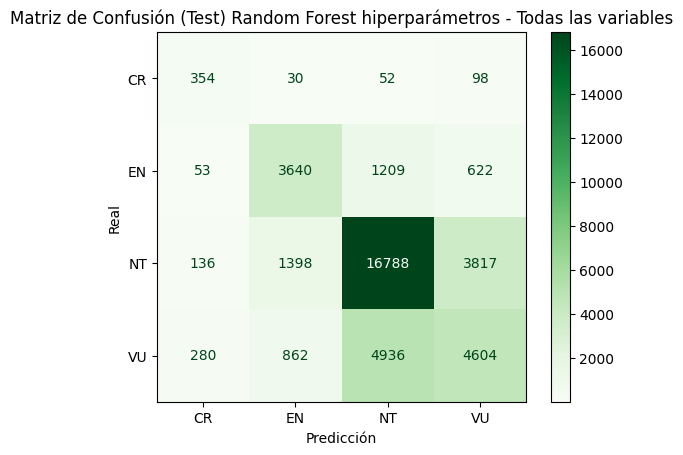

c:\Users\Jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores hiperparámetros para Random Forest - Variables significativas :
 - rf__bootstrap: True
 - rf__criterion: entropy
 - rf__max_depth: 20
 - rf__min_samples_leaf: 2
 - rf__min_samples_split: 2
 - rf__n_estimators: 200


<Figure size 800x600 with 0 Axes>

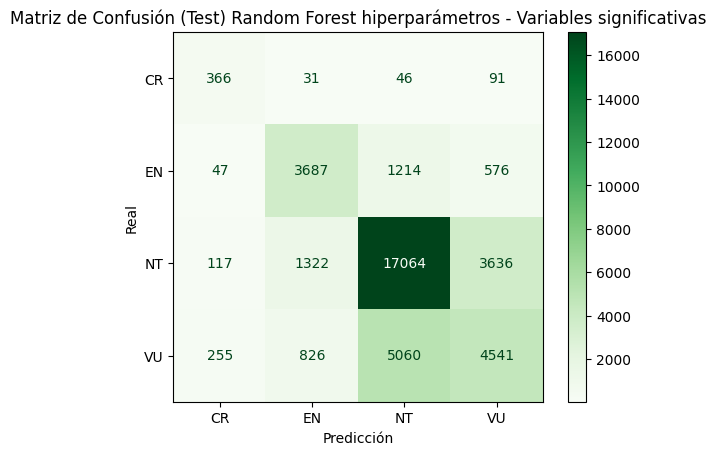


Resultados finales del algoritmos Random Forest con ajuste de hiperparámetros:


Datos  Test Accuracy  Test Recall  Test F1-score  \
0       Todas las variables       0.652949     0.627792       0.591480   
1  Variables significativas       0.659945     0.637180       0.604297   

   Test Roc-auc  Test Kappa  CV Accuracy  CV Recall_macro  CV F1_macro  \
0      0.841125    0.398312     0.650396         0.618467     0.588990   
1      0.847152    0.406844     0.658146         0.631932     0.603012   

   CV Roc-auc  CV Kappa  
0    0.840136  0.390484  
1    0.847342  0.402167

In [32]:
# Importación de bibliotecas necesarias
from sklearn.ensemble import RandomForestClassifier # Clasificador Random Forest
# Validación cruzada estratificada, evaluación por CV y búsqueda de hiperparámetros por CV
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import (  # Métricas de evaluación
    accuracy_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score
)
from imblearn.over_sampling import SMOTE  # Técnica de sobremuestreo para equilibrar clases minoritarias
from imblearn.pipeline import Pipeline as ImbPipeline #Creación de pipelines

# Función para buscar mejores hiperparámetros de Random Forest
def get_best_rf_params(X, y, data_type):

    # Definición de la grilla de búsqueda de hiperparámetros de Random Forest
    param_grid = {
        'rf__n_estimators': [10, 50, 100, 200],
        'rf__criterion': ['gini', 'entropy', 'log_loss'],
        'rf__max_depth': [None, 5, 10, 20],
        'rf__min_samples_split': [2, 5],
        'rf__min_samples_leaf': [1, 2],
        'rf__bootstrap': [True, False]
    }

    # Pipeline de procesamiento y modelado con técnicas de balanceo
    pipeline = ImbPipeline([ # Sin escalado
        ('smote', SMOTE(random_state=42)), # Balanceo con SMOTE
        ('rf', RandomForestClassifier(random_state=42)) # Algoritmo Random Forest para entrenar
    ])

    # Configura la validación cruzada estratificada de 5 particiones, con barajado
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Búsqueda de hiperparámetros con GridSearch mediante validación cruzada y puntuación basada en F1-score macro
    grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring='f1_macro', n_jobs=-1)
    # Ajuste del modelo con búsqueda de hiperparámetros
    grid.fit(X, y)

    # Recuperar los hiperparámetros óptimos encontrados
    print(f"Mejores hiperparámetros para Random Forest - {data_type} :")
    for k, v in grid.best_params_.items():
        print(f" - {k}: {v}")

    # Obtener esos mejores hiperparámetros
    return grid.best_params_

# Función para ajustar hiperparámetros, entrenar y evaluar Random Forest
def evaluate_rf_with_params(X_train, X_test, y_train, y_test, data_type, best_params):
    results = {} # Diccionario para almacenar las métricas de evaluación

    # Diseño del modelo Random Forest con los mejores hiperparámetros encontrados con la función
    rf = RandomForestClassifier(
        n_estimators=best_params['rf__n_estimators'],
        criterion=best_params['rf__criterion'],
        max_depth=best_params['rf__max_depth'],
        min_samples_split=best_params['rf__min_samples_split'],
        min_samples_leaf=best_params['rf__min_samples_leaf'],
        bootstrap=best_params['rf__bootstrap'],
        random_state=42
    )

    # Pipeline de procesamiento y modelado con técnicas de balanceo
    pipeline = ImbPipeline([ # Sin escalado
        ('smote', SMOTE(random_state=42)), # Balanceo con SMOTE
        ('rf', rf) # Algoritmo Random Forest con hiperparámetros para entrenar
    ])

    # Configura la validación cruzada estratificada de 5 particiones, con barajado
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Recorre cada métrica para evaluarla mediante validación cruzada
    for metric in ['accuracy', 'recall_macro', 'f1_macro']:
        # Calcula la media de la métrica en las 5 particiones
        score = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=metric).mean()
        # Guarda la métrica con formato legible
        results[f'CV {metric.capitalize()}'] = score

    # Inicializa listas para guardar AUC y Kappa por cada fold manualmente
    auc_scores, kappa_scores = [], []

    # Validación cruzada manual para calcular AUC y Kappa (no soportados directamente en cross_val_score)
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        # Entrena el modelo en el fold actual
        pipeline.fit(X_tr, y_tr)

        # Intenta predecir probabilidades para calcular AUC (puede fallar si no se soporta)
        try:
            probas = pipeline.predict_proba(X_val)
            # AUC multiclase usando estrategia "one-vs-rest" y promedio macro
            auc = roc_auc_score(y_val, probas, multi_class='ovr', average='macro')
            auc_scores.append(auc)
        except:
            # Si no se puede calcular, añade un NaN
            auc_scores.append(np.nan)

        # Predicción de clases para calcular Kappa
        y_val_pred = pipeline.predict(X_val)
        # Añade el valor de Kappa para el fold actual
        kappa_scores.append(cohen_kappa_score(y_val, y_val_pred))

    # Calcula el promedio de AUC (ignorando NaNs) y Kappa
    results['CV Roc-auc'] = np.nanmean(auc_scores)
    results['CV Kappa'] = np.mean(kappa_scores)

    # Entrena el modelo final sobre todo el conjunto de entrenamiento
    pipeline.fit(X_train, y_train)

    # Realiza predicciones sobre el conjunto de prueba
    y_pred = pipeline.predict(X_test)

    # Almacena el tipo de datos evaluado
    results['Datos'] = data_type

    # Calcula las métricas de evaluación en el conjunto de prueba
    results['Test Accuracy'] = accuracy_score(y_test, y_pred) # Precisión
    results['Test Recall'] = recall_score(y_test, y_pred, average='macro') # Recall macro
    results['Test F1-score'] = f1_score(y_test, y_pred, average='macro')  # F1-score macro
    results['Test Kappa'] = cohen_kappa_score(y_test, y_pred) # Kappa de Cohen

    # Intenta calcular el AUC sobre el conjunto de prueba
    try:
        y_proba = pipeline.predict_proba(X_test)
        results['Test Roc-auc'] = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
    except:
        results['Test Roc-auc'] = 'N/A' # Si falla, se asigna 'N/A'

    # Genera la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Define las etiquetas de clase en formato interpretable
    class_labels = ['CR', 'EN', 'NT', 'VU']

    # Inicializa el objeto para visualizar la matriz
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

    # Configura el tamaño de la figura
    plt.figure(figsize=(8, 6))

    # Muestra la matriz con estilo verde y valores como enteros
    disp.plot(cmap='Greens', values_format='d')

    # Título ejes
    plt.title(f'Matriz de Confusión (Test) Random Forest hiperparámetros - {data_type}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')

    # Muestra el gráfico
    plt.show()

    # Devuelve el diccionario con todas las métricas
    return results

# Ejecuta las funciones sobre cada conjunto de datos

# Inicializa lista para almacenar resultados de los datasets
rf_tuned_results = []

# Buscar mejores hiperparámetros para los datasets con todas las variables
best_rf_params = get_best_rf_params(X_train.values, y_train.values, 'Todas las variables')

# Todas las variables
rf_tuned_results.append(evaluate_rf_with_params(X_train.values, X_test.values, y_train.values, y_test.values,
                                                'Todas las variables', best_params=best_rf_params))

# Buscar mejores hiperparámetros para los datasets con las variables significativas
best_rf_params_sig = get_best_rf_params(X_sig_train.values, y_sig_train.values, 'Variables significativas')

# Variables significativas
rf_tuned_results.append(evaluate_rf_with_params(X_sig_train.values, X_sig_test.values, y_sig_train.values, y_sig_test.values,
                                                'Variables significativas', best_params=best_rf_params_sig))

# Crea un DataFrame con todos los resultados recopilados
rf_tuned_df = pd.DataFrame(rf_tuned_results)

# Muestra los resultados seleccionados de forma tabular
print("\nResultados finales del algoritmos Random Forest con ajuste de hiperparámetros:")
display(rf_tuned_df[
    ['Datos',
     'Test Accuracy', 'Test Recall', 'Test F1-score', 'Test Roc-auc', 'Test Kappa',
     'CV Accuracy', 'CV Recall_macro', 'CV F1_macro', 'CV Roc-auc', 'CV Kappa']
])


Algoritmo XGBoost sin ajuste de hiperparámetros

<Figure size 800x600 with 0 Axes>

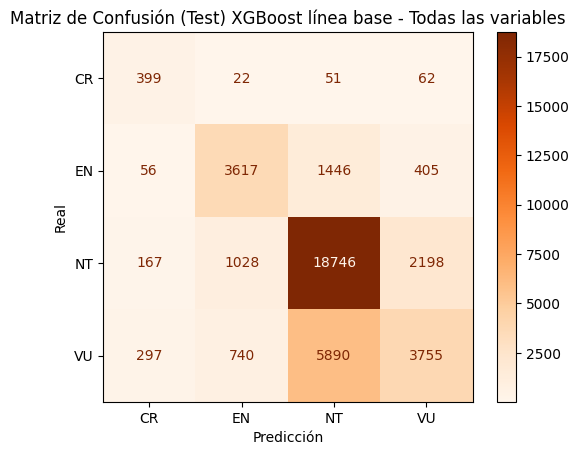

<Figure size 800x600 with 0 Axes>

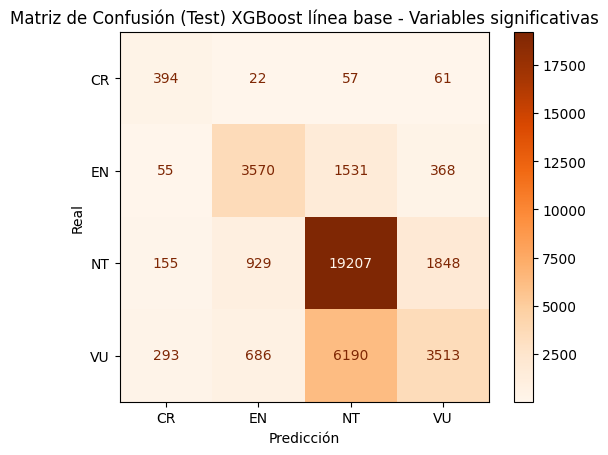


Resultados finales del algoritmo XGBoost en línea base:


Datos  Test Accuracy  Test Recall  Test F1-score  \
0       Todas las variables       0.682039     0.650059       0.606702   
1  Variables significativas       0.686335     0.645133       0.606137   

   Test Roc-auc  Test Kappa  CV Accuracy  CV Recall_macro  CV F1_macro  \
0      0.852888    0.423770     0.682199         0.643492     0.605733   
1      0.852274    0.423946     0.684414         0.640510     0.604441   

   CV Roc-auc  CV Kappa  
0    0.855901  0.423075  
1    0.855806  0.420449

In [35]:
# Importación de bibliotecas necesarias
from xgboost import XGBClassifier # Clasificador XGBoost
from sklearn.model_selection import StratifiedKFold, cross_val_score  # Validación cruzada estratificada y evaluación por CV
from sklearn.metrics import (  # Métricas de evaluación
    accuracy_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score
)
from imblearn.over_sampling import SMOTE  # Técnica de sobremuestreo para equilibrar clases minoritarias
from imblearn.pipeline import Pipeline as ImbPipeline #Creación de pipelines

# Definición de la función para entrenar, validar y evaluar un modelo XGBoost usando un pipeline
def evaluate_xgb(X_train, X_test, y_train, y_test, data_type):
    results = {}  # Diccionario para almacenar las métricas de evaluación

    # Creación del algoritmo XGBoost para entrenar
    xgb = XGBClassifier(       
        eval_metric='mlogloss',
        objective='multi:softprob',
        random_state=42
    )

    # Pipeline de procesamiento y modelado con técnicas de balanceo
    pipeline = ImbPipeline([ # Sin escalado
        ('smote', SMOTE(random_state=42)),  # Balanceo con SMOTE
        ('xgb', xgb)  # Algoritmo XGBoost para entrenar
    ])

    # Configura la validación cruzada estratificada de 5 particiones, con barajado
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Lista de métricas a evaluar usando cross_val_score
    metrics = ['accuracy', 'recall_macro', 'f1_macro']

    # Recorre cada métrica para evaluarla mediante validación cruzada
    for metric in metrics:
        # Calcula la media de la métrica en las 5 particiones
        score = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=metric).mean()
        # Guarda la métrica con formato legible
        results[f'CV {metric.capitalize()}'] = score

    # Inicializa listas para guardar AUC y Kappa por cada fold manualmente
    auc_scores = []
    kappa_scores = []

    # Validación cruzada manual para calcular AUC y Kappa (no soportados directamente en cross_val_score)
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        # Entrena el modelo en el fold actual
        pipeline.fit(X_tr, y_tr)

        # Intenta predecir probabilidades para calcular AUC (puede fallar si no se soporta)
        try:
            probas = pipeline.predict_proba(X_val)
            # AUC multiclase usando estrategia "one-vs-rest" y promedio macro
            auc = roc_auc_score(y_val, probas, multi_class='ovr', average='macro')
            auc_scores.append(auc)
        except:
            # Si no se puede calcular, añade un NaN
            auc_scores.append(np.nan)

        # Predicción de clases para calcular Kappa
        y_val_pred = pipeline.predict(X_val)
        # Añade el valor de Kappa para el fold actual
        kappa_scores.append(cohen_kappa_score(y_val, y_val_pred))

    # Calcula el promedio de AUC (ignorando NaNs) y Kappa
    results['CV Roc-auc'] = np.nanmean(auc_scores)
    results['CV Kappa'] = np.mean(kappa_scores)

    # Entrena el modelo final sobre todo el conjunto de entrenamiento
    pipeline.fit(X_train, y_train)

    # Realiza predicciones sobre el conjunto de prueba
    y_pred = pipeline.predict(X_test)

    # Almacena el tipo de datos evaluado
    results['Datos'] = data_type

    # Calcula las métricas de evaluación en el conjunto de prueba
    results['Test Accuracy'] = accuracy_score(y_test, y_pred)  # Precisión
    results['Test Recall'] = recall_score(y_test, y_pred, average='macro')  # Recall macro
    results['Test F1-score'] = f1_score(y_test, y_pred, average='macro')  # F1-score macro
    results['Test Kappa'] = cohen_kappa_score(y_test, y_pred)  # Kappa de Cohen

    # Intenta calcular el AUC sobre el conjunto de prueba
    try:
        y_proba = pipeline.predict_proba(X_test)
        results['Test Roc-auc'] = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
    except:
        results['Test Roc-auc'] = 'N/A'  # Si falla, se asigna 'N/A'

    # Genera la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Define las etiquetas de clase en formato interpretable
    class_labels = ['CR', 'EN', 'NT', 'VU']

    # Inicializa el objeto para visualizar la matriz
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

    # Configura el tamaño de la figura
    plt.figure(figsize=(8, 6))

    # Muestra la matriz con estilo azul y valores como enteros
    disp.plot(cmap='Oranges', values_format='d')

    # Título ejes
    plt.title(f'Matriz de Confusión (Test) XGBoost línea base - {data_type}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')

    # Muestra el gráfico
    plt.show()

    # Devuelve el diccionario con todas las métricas
    return results

# Ejecuta la función de evaluación sobre cada conjunto de datos

# Inicializa lista para almacenar resultados de los datasets
xgb_results = []

# Todas las variables
xgb_results.append(evaluate_xgb(X_train.values, X_test.values, y_train.values, y_test.values, 'Todas las variables'))

# Variables significativas
xgb_results.append(evaluate_xgb(X_sig_train.values, X_sig_test.values, y_sig_train.values, y_sig_test.values, 'Variables significativas'))

# Crea un DataFrame con todos los resultados recopilados
xgb_df = pd.DataFrame(xgb_results)

# Muestra los resultados seleccionados de forma tabular
print("\nResultados finales del algoritmo XGBoost en línea base:")
display(xgb_df[
    ['Datos',
     'Test Accuracy', 'Test Recall', 'Test F1-score', 'Test Roc-auc', 'Test Kappa',
     'CV Accuracy', 'CV Recall_macro', 'CV F1_macro', 'CV Roc-auc', 'CV Kappa']
])


Algoritmo XGBoost con ajuste de hiperparámetros

c:\Users\Jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores hiperparámetros para XGBoost - Todas las variables :
 - xgb__booster: gbtree
 - xgb__learning_rate: 0.1
 - xgb__max_depth: 9
 - xgb__n_estimators: 200


<Figure size 800x600 with 0 Axes>

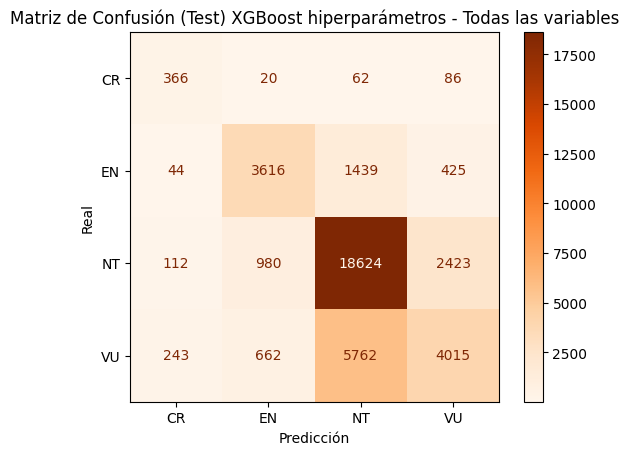

Mejores hiperparámetros para XGBoost - Variables significativas :
 - xgb__booster: gbtree
 - xgb__learning_rate: 0.1
 - xgb__max_depth: 9
 - xgb__n_estimators: 200


<Figure size 800x600 with 0 Axes>

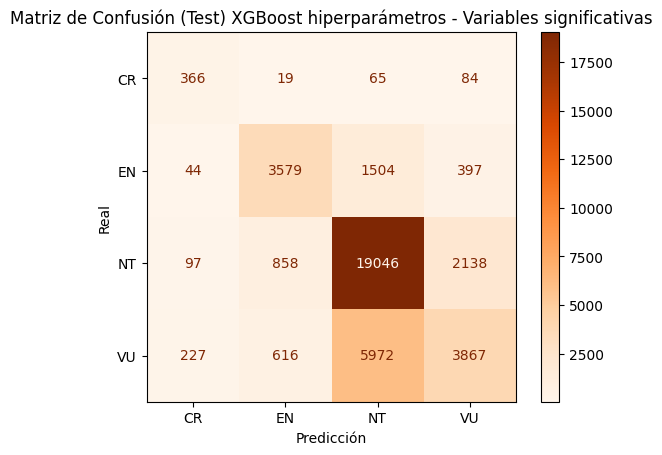


Resultados finales del algoritmo XGBoost con ajuste de hiperparámetros:


Datos  Test Accuracy  Test Recall  Test F1-score  \
0       Todas las variables       0.684714     0.639272       0.616011   
1  Variables significativas       0.690810     0.638899       0.621268   

   Test Roc-auc  Test Kappa  CV Accuracy  CV Recall_macro  CV F1_macro  \
0      0.858601    0.429022     0.684844         0.633771     0.616404   
1      0.857819    0.433686     0.687269         0.630911     0.613959   

   CV Roc-auc  CV Kappa  
0    0.859762  0.427328  
1    0.860157  0.426827

In [37]:
# Importación de bibliotecas necesarias
from xgboost import XGBClassifier # Clasificador XGBoost
# Validación cruzada estratificada, evaluación por CV y búsqueda de hiperparámetros por CV
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import (  # Métricas de evaluación
    accuracy_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score
)
from imblearn.over_sampling import SMOTE  # Técnica de sobremuestreo para equilibrar clases minoritarias
from imblearn.pipeline import Pipeline as ImbPipeline #Creación de pipelines

# Función para buscar mejores hiperparámetros de XGBoost
def get_best_xgb_params(X, y, data_type):

    # Definición de la grilla de búsqueda de hiperparámetros de XGBoost
    param_grid = {
        'xgb__n_estimators': [10, 50, 100, 200],
        'xgb__max_depth': [3, 5, 7, 9],
        'xgb__learning_rate': [0.01, 0.1, 1.0, 2.0],
        'xgb__booster': ['gbtree', 'gblinear', 'dart']
    }

    # Definición del modelo base XGBoost con configuración fija
    xgb = XGBClassifier(
        eval_metric='mlogloss',
        objective='multi:softprob',
        random_state=42
    )

    # Pipeline de procesamiento y modelado con técnicas de balanceo
    pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=42)), # Balanceo con SMOTE
        ('xgb', xgb) # Algoritmo XGBoost para entrenar
    ])

    # Configura la validación cruzada estratificada de 5 particiones, con barajado
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Búsqueda de hiperparámetros con GridSearch mediante validación cruzada y puntuación basada en F1-score macro
    grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring='f1_macro', n_jobs=-1)
    # Ajuste del modelo con búsqueda de hiperparámetros
    grid.fit(X, y)

    # Recuperar los hiperparámetros óptimos encontrados
    print(f"Mejores hiperparámetros para XGBoost - {data_type} :")
    for k, v in grid.best_params_.items():
        print(f" - {k}: {v}")

    # Obtener esos mejores hiperparámetros
    return grid.best_params_

# Función para ajustar hiperparámetros, entrenar y evaluar XGBoost
def evaluate_xgb_with_params(X_train, X_test, y_train, y_test, data_type, best_params):
    results = {} # Diccionario para almacenar las métricas de evaluación

    # Diseño del modelo XGBoost con los mejores hiperparámetros encontrados con la función
    xgb = XGBClassifier(
        eval_metric='mlogloss',
        objective='multi:softprob',
        random_state=42,
        n_estimators=best_params['xgb__n_estimators'],
        max_depth=best_params['xgb__max_depth'],
        learning_rate=best_params['xgb__learning_rate'],
        booster=best_params['xgb__booster']
    )

    # Pipeline de procesamiento y modelado con técnicas de balanceo
    pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=42)), # Balanceo con SMOTE
        ('xgb', xgb) # Algoritmo XGBoost con hiperparámetros para entrenar
    ])

    # Configura la validación cruzada estratificada de 5 particiones, con barajado
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Recorre cada métrica para evaluarla mediante validación cruzada
    for metric in ['accuracy', 'recall_macro', 'f1_macro']:
        # Calcula la media de la métrica en las 5 particiones
        score = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=metric).mean()
        # Guarda la métrica con formato legible
        results[f'CV {metric.capitalize()}'] = score

    # Inicializa listas para guardar AUC y Kappa por cada fold manualmente
    auc_scores, kappa_scores = [], []

    # Validación cruzada manual para calcular AUC y Kappa (no soportados directamente en cross_val_score)
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        # Entrena el modelo en el fold actual
        pipeline.fit(X_tr, y_tr)

        # Intenta predecir probabilidades para calcular AUC (puede fallar si no se soporta)
        try:
            probas = pipeline.predict_proba(X_val)
            # AUC multiclase usando estrategia "one-vs-rest" y promedio macro
            auc = roc_auc_score(y_val, probas, multi_class='ovr', average='macro')
            auc_scores.append(auc)
        except:
            # Si no se puede calcular, añade un NaN
            auc_scores.append(np.nan)

        # Predicción de clases para calcular Kappa
        y_val_pred = pipeline.predict(X_val)
        # Añade el valor de Kappa para el fold actual
        kappa_scores.append(cohen_kappa_score(y_val, y_val_pred))

    # Calcula el promedio de AUC (ignorando NaNs) y Kappa
    results['CV Roc-auc'] = np.nanmean(auc_scores)
    results['CV Kappa'] = np.mean(kappa_scores)

    # Entrena el modelo final sobre todo el conjunto de entrenamiento
    pipeline.fit(X_train, y_train)

    # Realiza predicciones sobre el conjunto de prueba
    y_pred = pipeline.predict(X_test)

    # Almacena el tipo de datos evaluado
    results['Datos'] = data_type

    # Calcula las métricas de evaluación en el conjunto de prueba
    results['Test Accuracy'] = accuracy_score(y_test, y_pred) # Precisión
    results['Test Recall'] = recall_score(y_test, y_pred, average='macro') # Recall macro
    results['Test F1-score'] = f1_score(y_test, y_pred, average='macro')  # F1-score macro
    results['Test Kappa'] = cohen_kappa_score(y_test, y_pred) # Kappa de Cohen

    # Intenta calcular el AUC sobre el conjunto de prueba
    try:
        y_proba = pipeline.predict_proba(X_test)
        results['Test Roc-auc'] = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
    except:
        results['Test Roc-auc'] = 'N/A' # Si falla, se asigna 'N/A'

    # Genera la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Define las etiquetas de clase en formato interpretable
    class_labels = ['CR', 'EN', 'NT', 'VU']

    # Inicializa el objeto para visualizar la matriz
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

    # Configura el tamaño de la figura
    plt.figure(figsize=(8, 6))

    # Muestra la matriz con estilo naranja y valores como enteros
    disp.plot(cmap='Oranges', values_format='d')

    # Título ejes
    plt.title(f'Matriz de Confusión (Test) XGBoost hiperparámetros - {data_type}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')

    # Muestra el gráfico
    plt.show()

    # Devuelve el diccionario con todas las métricas
    return results

# Ejecuta las funciones sobre cada conjunto de datos

# Inicializa lista para almacenar resultados de los datasets
xgb_tuned_results = []

# Buscar mejores hiperparámetros para los datasets con todas las variables
best_xgb_params = get_best_xgb_params(X_train.values, y_train.values, 'Todas las variables')

# Todas las variables
xgb_tuned_results.append(evaluate_xgb_with_params(X_train.values, X_test.values, y_train.values, y_test.values,
                                                  'Todas las variables', best_params=best_xgb_params))

# Buscar mejores hiperparámetros para los datasets con las variables significativas
best_xgb_params_sig = get_best_xgb_params(X_sig_train.values, y_sig_train.values, 'Variables significativas')

# Variables significativas
xgb_tuned_results.append(evaluate_xgb_with_params(X_sig_train.values, X_sig_test.values, y_sig_train.values, y_sig_test.values,
                                                  'Variables significativas', best_params=best_xgb_params_sig))

# Crea un DataFrame con todos los resultados recopilados
xgb_tuned_df = pd.DataFrame(xgb_tuned_results)

# Muestra los resultados seleccionados de forma tabular
print("\nResultados finales del algoritmo XGBoost con ajuste de hiperparámetros:")
display(xgb_tuned_df[
    ['Datos',
     'Test Accuracy', 'Test Recall', 'Test F1-score', 'Test Roc-auc', 'Test Kappa',
     'CV Accuracy', 'CV Recall_macro', 'CV F1_macro', 'CV Roc-auc', 'CV Kappa']
])


Algoritmo LightGBM sin ajuste de hiperparámetros

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 165296, number of used features: 24
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010564 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 165300, number of used features: 24
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from scor

<Figure size 800x600 with 0 Axes>

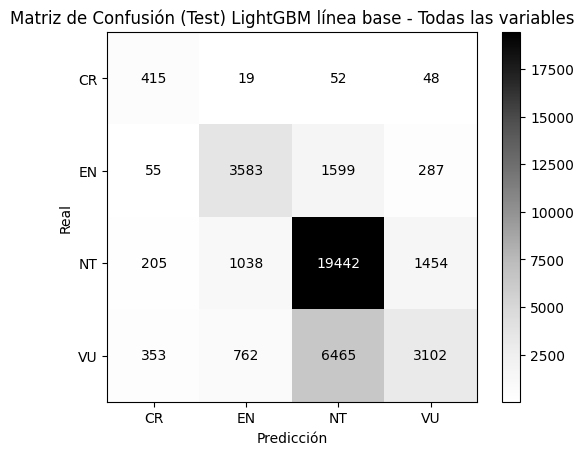

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 165296, number of used features: 15
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 165300, number of used features: 15
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training

<Figure size 800x600 with 0 Axes>

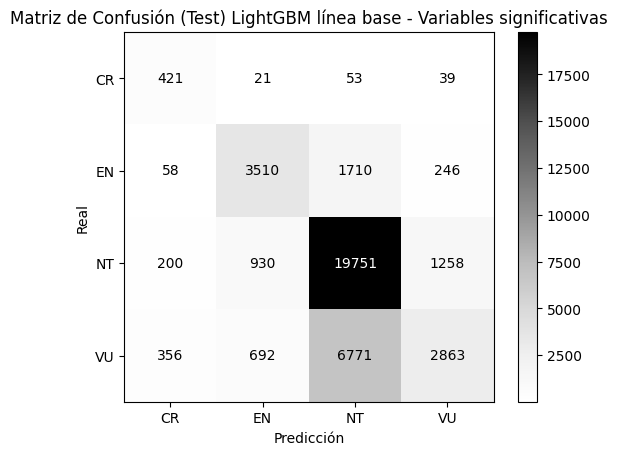


Resultados finales del algoritmo LightGBM en línea base:


Datos  Test Accuracy  Test Recall  Test F1-score  \
0       Todas las variables       0.682682     0.648588        0.59201   
1  Variables significativas       0.682759     0.645989        0.58926   

   Test Roc-auc  Test Kappa  CV Accuracy  CV Recall_macro  CV F1_macro  \
0      0.850751    0.414228     0.683852         0.651669     0.598951   
1      0.849364    0.407466     0.684998         0.646606     0.594268   

   CV Roc-auc  CV Kappa  
0    0.853605  0.414879  
1    0.852953  0.410774

In [38]:
# Importación de bibliotecas necesarias
from lightgbm import LGBMClassifier # Clasificador LightGBM
from sklearn.model_selection import StratifiedKFold, cross_val_score  # Validación cruzada estratificada y evaluación por CV
from sklearn.metrics import (  # Métricas de evaluación
    accuracy_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score
)
from imblearn.over_sampling import SMOTE  # Técnica de sobremuestreo para equilibrar clases minoritarias
from imblearn.pipeline import Pipeline as ImbPipeline #Creación de pipelines

# Definición de la función para entrenar, validar y evaluar un modelo LightGBM usando un pipeline
def evaluate_lgbm(X_train, X_test, y_train, y_test, data_type):
    results = {}  # Diccionario para almacenar las métricas de evaluación

    # Clasificador LightGBM con objetivo multiclase
    lgbm = LGBMClassifier(objective='multiclass', random_state=42)

    # Pipeline de procesamiento y modelado con técnicas de balanceo
    pipeline = ImbPipeline([ # Sin escalado
        ('smote', SMOTE(random_state=42)),  # Balanceo con SMOTE
        ('lgbm', lgbm)  # Algoritmo LightGBM para entrenar
    ])

    # Configura la validación cruzada estratificada de 5 particiones, con barajado
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Lista de métricas a evaluar usando cross_val_score
    metrics = ['accuracy', 'recall_macro', 'f1_macro']

    # Recorre cada métrica para evaluarla mediante validación cruzada
    for metric in metrics:
        # Calcula la media de la métrica en las 5 particiones
        score = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=metric).mean()
        # Guarda la métrica con formato legible
        results[f'CV {metric.capitalize()}'] = score

    # Inicializa listas para guardar AUC y Kappa por cada fold manualmente
    auc_scores = []
    kappa_scores = []

    # Validación cruzada manual para calcular AUC y Kappa (no soportados directamente en cross_val_score)
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        # Entrena el modelo en el fold actual
        pipeline.fit(X_tr, y_tr)

        # Intenta predecir probabilidades para calcular AUC (puede fallar si no se soporta)
        try:
            probas = pipeline.predict_proba(X_val)
            # AUC multiclase usando estrategia "one-vs-rest" y promedio macro
            auc = roc_auc_score(y_val, probas, multi_class='ovr', average='macro')
            auc_scores.append(auc)
        except:
            # Si no se puede calcular, añade un NaN
            auc_scores.append(np.nan)

        # Predicción de clases para calcular Kappa
        y_val_pred = pipeline.predict(X_val)
        # Añade el valor de Kappa para el fold actual
        kappa_scores.append(cohen_kappa_score(y_val, y_val_pred))

    # Calcula el promedio de AUC (ignorando NaNs) y Kappa
    results['CV Roc-auc'] = np.nanmean(auc_scores)
    results['CV Kappa'] = np.mean(kappa_scores)

    # Entrena el modelo final sobre todo el conjunto de entrenamiento
    pipeline.fit(X_train, y_train)

    # Realiza predicciones sobre el conjunto de prueba
    y_pred = pipeline.predict(X_test)

    # Almacena el tipo de datos evaluado
    results['Datos'] = data_type

    # Calcula las métricas de evaluación en el conjunto de prueba
    results['Test Accuracy'] = accuracy_score(y_test, y_pred)  # Precisión
    results['Test Recall'] = recall_score(y_test, y_pred, average='macro')  # Recall macro
    results['Test F1-score'] = f1_score(y_test, y_pred, average='macro')  # F1-score macro
    results['Test Kappa'] = cohen_kappa_score(y_test, y_pred)  # Kappa de Cohen

    # Intenta calcular el AUC sobre el conjunto de prueba
    try:
        y_proba = pipeline.predict_proba(X_test)
        results['Test Roc-auc'] = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
    except:
        results['Test Roc-auc'] = 'N/A'  # Si falla, se asigna 'N/A'

    # Genera la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Define las etiquetas de clase en formato interpretable
    class_labels = ['CR', 'EN', 'NT', 'VU']

    # Inicializa el objeto para visualizar la matriz
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

    # Configura el tamaño de la figura
    plt.figure(figsize=(8, 6))

    # Muestra la matriz con estilo gris y valores como enteros
    disp.plot(cmap='Greys', values_format='d')

    # Título ejes
    plt.title(f'Matriz de Confusión (Test) LightGBM línea base - {data_type}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')

    # Muestra el gráfico
    plt.show()

    # Devuelve el diccionario con todas las métricas
    return results

# Ejecuta la función de evaluación sobre cada conjunto de datos

# Inicializa lista para almacenar resultados de los datasets
lgbm_results = []

# Todas las variables
lgbm_results.append(evaluate_lgbm(X_train.values, X_test.values, y_train.values, y_test.values, 'Todas las variables'))

# Variables significativas
lgbm_results.append(evaluate_lgbm(X_sig_train.values, X_sig_test.values, y_sig_train.values, y_sig_test.values, 'Variables significativas'))

# Crea un DataFrame con todos los resultados recopilados
lgbm_df = pd.DataFrame(lgbm_results)

# Muestra los resultados seleccionados de forma tabular
print("\nResultados finales del algoritmo LightGBM en línea base:")
display(lgbm_df[
    ['Datos',
     'Test Accuracy', 'Test Recall', 'Test F1-score', 'Test Roc-auc', 'Test Kappa',
     'CV Accuracy', 'CV Recall_macro', 'CV F1_macro', 'CV Roc-auc', 'CV Kappa']
])


Algoritmo LightGBM con ajuste de hiperparámetros

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 206624, number of used features: 24
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
Mejores hiperparámetros para LightGBM - Todas las variables :
 - lgbm__learning_rate: 0.1
 - lgbm__max_depth: 9
 - lgbm__min_data_in_leaf: 10
 - lgbm__n_estimators: 200
 - lgbm__num_leaves: 60
[LightGBM] [Warning] min_data_in_leaf is set=10, min_chil

<Figure size 800x600 with 0 Axes>

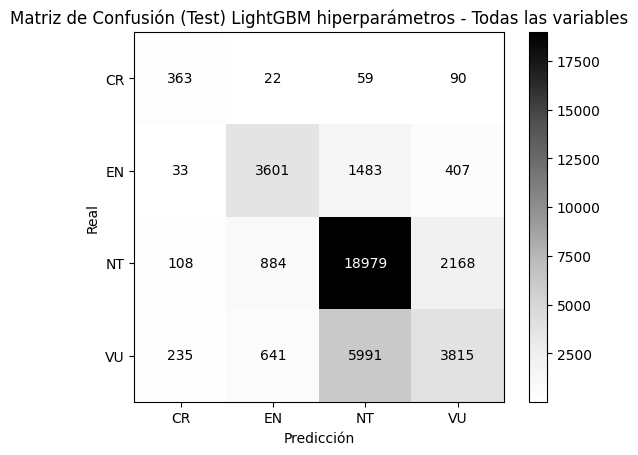

c:\Users\Jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004500 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 206624, number of used features: 15
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
Mejores hiperparámetros para LightGBM - Variables significativas :
 - lgbm__learning_rate: 0.1
 - lgbm__max_depth: 9
 - lgbm__min_data_in_leaf: 30
 - lgbm__n_estimators: 200
 - lgbm__num_leaves: 60
[LightGBM] [Warning] min_data_in_leaf is set=30, min

<Figure size 800x600 with 0 Axes>

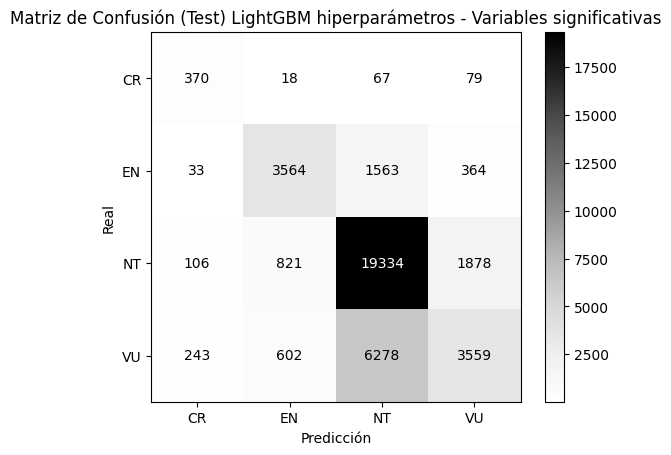


Resultados finales del algoritmo LightGBM con ajuste de hiperparámetros:


Datos  Test Accuracy  Test Recall  Test F1-score  \
0       Todas las variables       0.688238     0.636517       0.617488   
1  Variables significativas       0.690013     0.636137       0.616312   

   Test Roc-auc  Test Kappa  CV Accuracy  CV Recall_macro  CV F1_macro  \
0      0.857989    0.429874     0.688052         0.634529     0.617535   
1      0.857715    0.426901     0.691359         0.631657     0.618063   

   CV Roc-auc  CV Kappa  
0    0.860089  0.427734  
1    0.859916  0.428384

In [27]:
# Importación de bibliotecas necesarias
from lightgbm import LGBMClassifier # Clasificador LightGBM
# Validación cruzada estratificada, evaluación por CV y búsqueda de hiperparámetros por CV
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import (  # Métricas de evaluación
    accuracy_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score
)
from imblearn.over_sampling import SMOTE  # Técnica de sobremuestreo para equilibrar clases minoritarias
from imblearn.pipeline import Pipeline as ImbPipeline #Creación de pipelines

# Función para buscar mejores hiperparámetros de LightGBM
def get_best_lgbm_params(X, y, data_type):

    # Definición de la grilla de búsqueda de hiperparámetros de LightGBM
    param_grid = {
        'lgbm__n_estimators': [10, 50, 100, 200],
        'lgbm__max_depth': [3, 5, 7, 9],
        'lgbm__learning_rate': [0.01, 0.1, 1.0, 2.0],
        'lgbm__num_leaves': [15, 30, 45, 60],
        'lgbm__min_data_in_leaf': [10, 20, 30]
    }

    # Inicialización del modelo LightGBM con configuración para clasificación multiclase
    lgbm = LGBMClassifier(objective='multiclass', random_state=42)

    # Pipeline de procesamiento y modelado con técnicas de balanceo
    pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=42)), # Balanceo con SMOTE
        ('lgbm', lgbm) # Algoritmo LightGBM para entrenar
    ])

    # Configura la validación cruzada estratificada de 5 particiones, con barajado
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Búsqueda de hiperparámetros con GridSearch mediante validación cruzada y puntuación basada en F1-score macro
    grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring='f1_macro', n_jobs=-1)
    # Ajuste del modelo con búsqueda de hiperparámetros
    grid.fit(X, y)

    # Recuperar los hiperparámetros óptimos encontrados
    print(f"Mejores hiperparámetros para LightGBM - {data_type} :")
    for k, v in grid.best_params_.items():
        print(f" - {k}: {v}")

    # Obtener esos mejores hiperparámetros
    return grid.best_params_

# Función para ajustar hiperparámetros, entrenar y evaluar LightGBM
def evaluate_lgbm_with_params(X_train, X_test, y_train, y_test, data_type, best_params):
    results = {} # Diccionario para almacenar las métricas de evaluación

    # Diseño del modelo LightGBM con los mejores hiperparámetros encontrados con la función
    lgbm = LGBMClassifier(
        objective='multiclass',
        random_state=42,
        n_estimators=best_params['lgbm__n_estimators'],
        max_depth=best_params['lgbm__max_depth'],
        learning_rate=best_params['lgbm__learning_rate'],
        num_leaves=best_params['lgbm__num_leaves'],
        min_data_in_leaf=best_params['lgbm__min_data_in_leaf']
    )

    # Pipeline de procesamiento y modelado con técnicas de balanceo
    pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=42)), # Balanceo con SMOTE
        ('lgbm', lgbm) # Algoritmo LightGBM con hiperparámetros para entrenar
    ])

    # Configura la validación cruzada estratificada de 5 particiones, con barajado
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Recorre cada métrica para evaluarla mediante validación cruzada
    for metric in ['accuracy', 'recall_macro', 'f1_macro']:
        # Calcula la media de la métrica en las 5 particiones
        score = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=metric).mean()
        # Guarda la métrica con formato legible
        results[f'CV {metric.capitalize()}'] = score

    # Inicializa listas para guardar AUC y Kappa por cada fold manualmente
    auc_scores, kappa_scores = [], []

    # Validación cruzada manual para calcular AUC y Kappa (no soportados directamente en cross_val_score)
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        # Entrena el modelo en el fold actual
        pipeline.fit(X_tr, y_tr)

        # Intenta predecir probabilidades para calcular AUC (puede fallar si no se soporta)
        try:
            probas = pipeline.predict_proba(X_val)
            # AUC multiclase usando estrategia "one-vs-rest" y promedio macro
            auc = roc_auc_score(y_val, probas, multi_class='ovr', average='macro')
            auc_scores.append(auc)
        except:
            # Si no se puede calcular, añade un NaN
            auc_scores.append(np.nan)

        # Predicción de clases para calcular Kappa
        y_val_pred = pipeline.predict(X_val)
        # Añade el valor de Kappa para el fold actual
        kappa_scores.append(cohen_kappa_score(y_val, y_val_pred))

    # Calcula el promedio de AUC (ignorando NaNs) y Kappa
    results['CV Roc-auc'] = np.nanmean(auc_scores)
    results['CV Kappa'] = np.mean(kappa_scores)

    # Entrena el modelo final sobre todo el conjunto de entrenamiento
    pipeline.fit(X_train, y_train)

    # Realiza predicciones sobre el conjunto de prueba
    y_pred = pipeline.predict(X_test)

    # Almacena el tipo de datos evaluado
    results['Datos'] = data_type

    # Calcula las métricas de evaluación en el conjunto de prueba
    results['Test Accuracy'] = accuracy_score(y_test, y_pred) # Precisión
    results['Test Recall'] = recall_score(y_test, y_pred, average='macro') # Recall macro
    results['Test F1-score'] = f1_score(y_test, y_pred, average='macro')  # F1-score macro
    results['Test Kappa'] = cohen_kappa_score(y_test, y_pred) # Kappa de Cohen

    # Intenta calcular el AUC sobre el conjunto de prueba
    try:
        y_proba = pipeline.predict_proba(X_test)
        results['Test Roc-auc'] = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
    except:
        results['Test Roc-auc'] = 'N/A' # Si falla, se asigna 'N/A'

    # Genera la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Define las etiquetas de clase en formato interpretable
    class_labels = ['CR', 'EN', 'NT', 'VU']

    # Inicializa el objeto para visualizar la matriz
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

    # Configura el tamaño de la figura
    plt.figure(figsize=(8, 6))

    # Muestra la matriz con estilo gris y valores como enteros
    disp.plot(cmap='Greys', values_format='d')

    # Título ejes
    plt.title(f'Matriz de Confusión (Test) LightGBM hiperparámetros - {data_type}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')

    # Muestra el gráfico
    plt.show()

    # Devuelve el diccionario con todas las métricas
    return results

# Ejecuta las funciones sobre cada conjunto de datos

# Inicializa lista para almacenar resultados de los datasets
lgbm_tuned_results = []

# Buscar mejores hiperparámetros para los datasets con todas las variables
best_lgbm_params = get_best_lgbm_params(X_train.values, y_train.values, 'Todas las variables')

# Todas las variables
lgbm_tuned_results.append(evaluate_lgbm_with_params(X_train.values, X_test.values, y_train.values, y_test.values,
                                                    'Todas las variables', best_params=best_lgbm_params))

# Buscar mejores hiperparámetros para los datasets con las variables significativas
best_lgbm_params_sig = get_best_lgbm_params(X_sig_train.values, y_sig_train.values, 'Variables significativas')

# Variables significativas
lgbm_tuned_results.append(evaluate_lgbm_with_params(X_sig_train.values, X_sig_test.values, y_sig_train.values, y_sig_test.values,
                                                    'Variables significativas', best_params=best_lgbm_params_sig))

# Crea un DataFrame con todos los resultados recopilados
lgbm_tuned_df = pd.DataFrame(lgbm_tuned_results)

# Muestra los resultados seleccionados de forma tabular
print("\nResultados finales del algoritmo LightGBM con ajuste de hiperparámetros:")
display(lgbm_tuned_df[
    ['Datos',
     'Test Accuracy', 'Test Recall', 'Test F1-score', 'Test Roc-auc', 'Test Kappa',
     'CV Accuracy', 'CV Recall_macro', 'CV F1_macro', 'CV Roc-auc', 'CV Kappa']
])


In [ ]:
#pip install tensorflow
#!pip install scikeras
#pip install "scikit-learn<1.6"

Algoritmo Neural Networks sin ajuste de hiperparámetros

<Figure size 800x600 with 0 Axes>

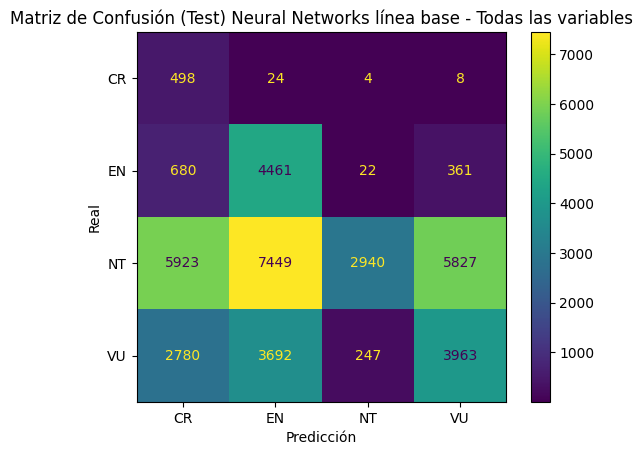

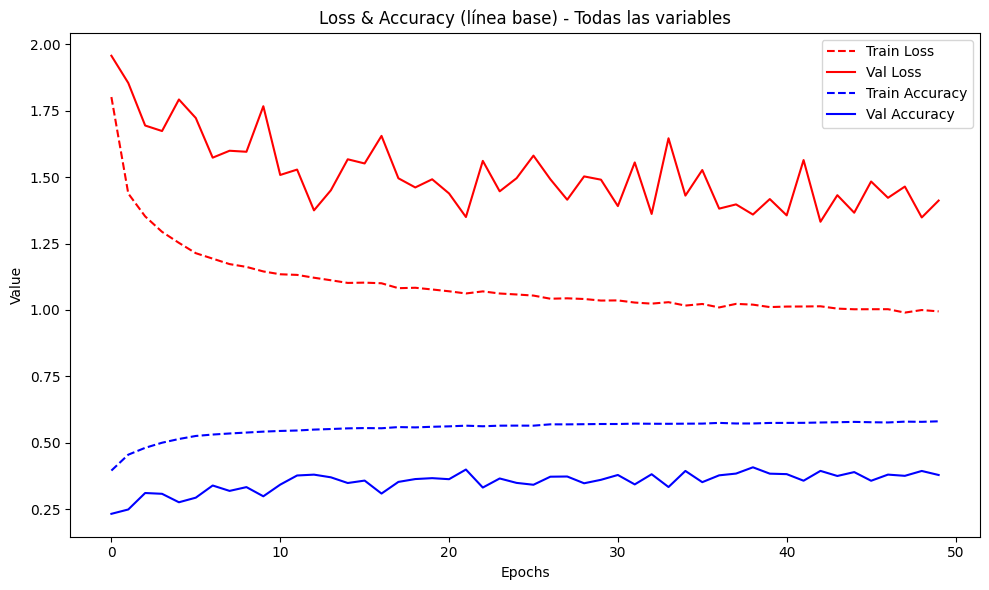

<Figure size 800x600 with 0 Axes>

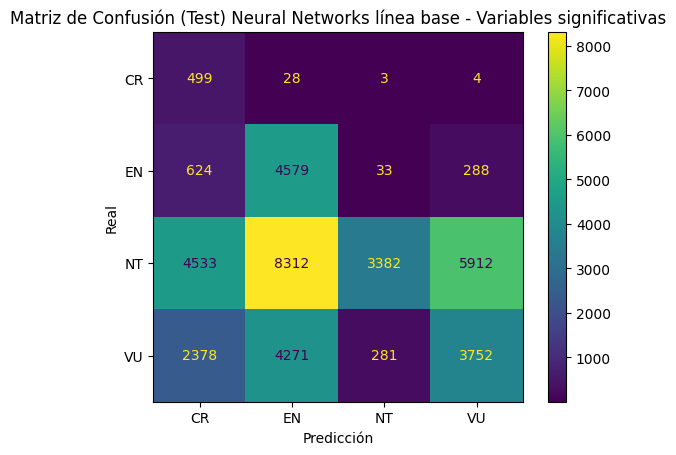

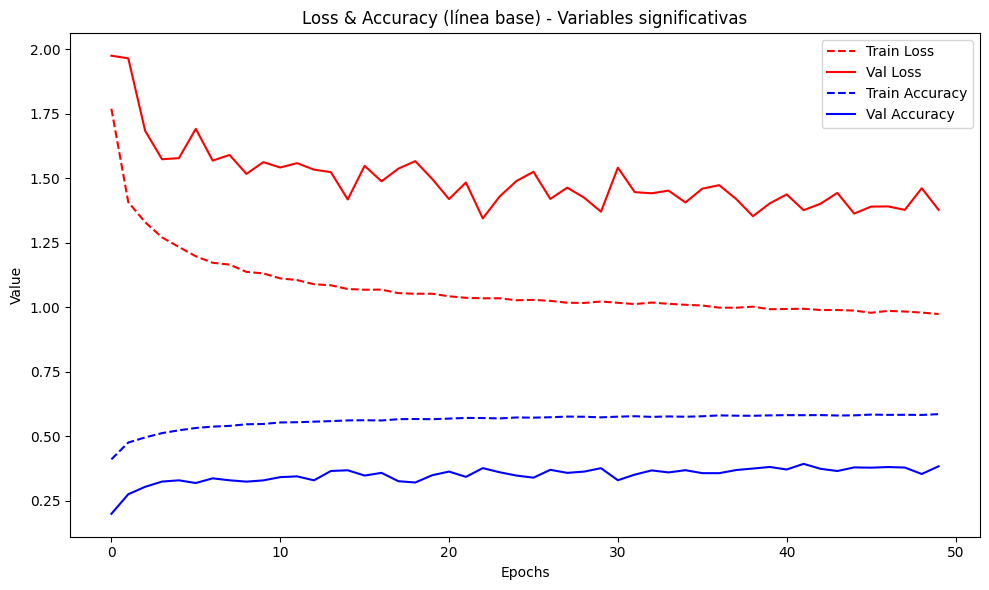

Resultados finales del algoritmo Neural Networks en línea base


Datos  Test Accuracy  Test Recall  Test F1-score  \
0       Todas las variables       0.305100     0.560987       0.282429   
1  Variables significativas       0.314103     0.566848       0.286263   

   Test Roc-auc  Test Kappa  CV Accuracy  CV Recall_macro  CV F1_macro  \
0      0.772918    0.153134     0.310295         0.571428     0.277946   
1      0.776864    0.153012     0.309126         0.567248     0.284524   

   CV Roc-auc  CV Kappa  
0    0.774866  0.139732  
1    0.775994  0.144845

In [ ]:
# Importación de bibliotecas necesarias para el modelo y evaluación
from scikeras.wrappers import KerasClassifier  # Wrapper para usar Keras con scikit-learn
from tensorflow.keras.models import Sequential  # Modelo secuencial de Keras
from tensorflow.keras.layers import Dense, Dropout, Input  # Capas densas, de abandono y de entrada
from tensorflow.keras.utils import to_categorical  # Codificación one-hot para etiquetas categóricas
from tensorflow.keras.optimizers import Adam, RMSprop  # Optimizadores comunes para redes neuronales
from sklearn.model_selection import StratifiedKFold, cross_val_score  # Validación cruzada estratificada
from sklearn.utils.class_weight import compute_class_weight  # Cálculo de pesos para clases desbalanceadas
from sklearn.metrics import (  # Métricas de evaluación
    accuracy_score, recall_score, f1_score, roc_auc_score,
    cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.preprocessing import MinMaxScaler # Normalización MinMax
from imblearn.over_sampling import SMOTE  # Técnica de sobremuestreo para equilibrar clases minoritarias
from imblearn.pipeline import Pipeline as ImbPipeline #Creación de pipelines

# Definición de la función para entrenar, validar y evaluar una red neuronal usando un pipeline
def evaluate_nn_baseline(X_train, X_test, y_train, y_test, data_type):
    results = {'Datos': data_type}  # Diccionario para almacenar las métricas de evaluación
    num_classes = len(np.unique(y_train))  # Cantidad de clases distintas

    # Cálculo de pesos de clase para lidiar con desbalance
    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = dict(enumerate(class_weights))

    # Función para construir el modelo secuencial de red neuronal
    def create_baseline_model():
        model = Sequential([
            Input(shape=(X_train.shape[1],)),  # Capa de entrada con dimensión de variables
            Dense(64, activation='relu'),  # Capa oculta densa con activación ReLU
            Dropout(0.2),  # Capa Dropout para prevenir sobreajuste
            Dense(32, activation='relu'),  # Segunda capa oculta
            Dropout(0.2),  # Segundo Dropout
            Dense(num_classes, activation='softmax')  # Capa de salida con softmax para clasificación multiclase
        ])
        # Compilación del modelo con optimizador Adam y función de pérdida categórica
        model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
        return model

    # Pipeline con escalado, SMOTE y red neuronal
    pipeline = ImbPipeline([
        ('scaler', MinMaxScaler()),  # Escalado MinMax
        ('smote', SMOTE(random_state=42)),  # Balanceo con SMOTE
        #('nn', KerasClassifier(model=create_baseline_model, epochs=50, batch_size=32, verbose=0, class_weight=class_weight_dict))  # Clasificador con red neuronal
        ('nn', KerasClassifier(model=create_baseline_model, loss="categorical_crossentropy",epochs=50, batch_size=32, verbose=0, class_weight=class_weight_dict))

    ])

    # Configura la validación cruzada estratificada de 5 particiones, con barajado
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Lista de métricas a evaluar usando cross_val_score
    for name, score in zip(['Accuracy', 'Recall_macro', 'F1_macro'], ['accuracy', 'recall_macro', 'f1_macro']):
        # Calcula la media de la métrica en las 5 particiones
        value = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=score).mean()
        # Guarda la métrica con formato legible
        results[f'CV {name}'] = value

    # Inicializa listas para guardar AUC y Kappa por cada fold manualmente
    auc_scores, kappa_scores = [], []

    # Validación cruzada manual para calcular AUC y Kappa (no soportados directamente en cross_val_score)
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        # Entrena el modelo en el fold actual
        pipeline.fit(X_tr, y_tr)

        # Predicción de clases para calcular Kappa
        y_val_pred = pipeline.predict(X_val)

        # Intenta predecir probabilidades para calcular AUC (puede fallar si no se soporta)
        try:
            y_val_proba = pipeline.predict_proba(X_val)
            # AUC multiclase usando estrategia "one-vs-rest" y promedio macro
            auc = roc_auc_score(y_val, y_val_proba, multi_class='ovr', average='macro')
            auc_scores.append(auc)
        except:
            # Si no se puede calcular, añade un NaN
            auc_scores.append(np.nan)

        # Añade el valor de Kappa para el fold actual
        kappa_scores.append(cohen_kappa_score(y_val, y_val_pred))

    # Calcula el promedio de AUC (ignorando NaNs) y Kappa
    results['CV Roc-auc'] = np.nanmean(auc_scores)
    results['CV Kappa'] = np.mean(kappa_scores)

    # Entrena el modelo final sobre todo el conjunto de entrenamiento
    pipeline.fit(X_train, y_train)

    # Realiza predicciones sobre el conjunto de prueba
    y_pred = pipeline.predict(X_test)

    # Intenta calcular el AUC sobre el conjunto de prueba
    try:
        y_proba = pipeline.predict_proba(X_test)
        results['Test Roc-auc'] = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
    except:
        results['Test Roc-auc'] = 'N/A'  # Si falla, se asigna 'N/A'

    # Calcula las métricas de evaluación en el conjunto de prueba
    results['Test Accuracy'] = accuracy_score(y_test, y_pred)  # Precisión
    results['Test Recall'] = recall_score(y_test, y_pred, average='macro')  # Recall macro
    results['Test F1-score'] = f1_score(y_test, y_pred, average='macro')  # F1-score macro
    results['Test Kappa'] = cohen_kappa_score(y_test, y_pred)  # Kappa de Cohen

    # Genera la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Define las etiquetas de clase en formato interpretable
    class_labels = ['CR', 'EN', 'NT', 'VU']

    # Inicializa el objeto para visualizar la matriz
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

    # Configura el tamaño de la figura
    plt.figure(figsize=(8, 6))

    # Muestra la matriz con estilo viridis y valores como enteros
    disp.plot(cmap='viridis', values_format='d')

    # Título ejes
    plt.title(f'Matriz de Confusión (Test) Neural Networks línea base - {data_type}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')

    # Muestra el gráfico
    plt.show()

    # ENTRENAMIENTO ADICIONAL para obtener curvas de pérdida y precisión
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_train_res, y_train_res = SMOTE(random_state=42).fit_resample(X_train_scaled, y_train)
    y_train_cat = to_categorical(y_train_res, num_classes=num_classes)

    # Construye y entrena el modelo para monitorear el desempeño
    final_model = create_baseline_model()
    history = final_model.fit(
        X_train_res, y_train_cat,
        epochs=50, batch_size=32,
        class_weight=class_weight_dict,
        verbose=0, validation_split=0.2
    )

    # Visualización de curvas de pérdida y precisión
    plt.figure(figsize=(10, 6))  # Configura el tamaño de la figura

    # Curvas de pérdida (entrenamiento y validación)
    plt.plot(history.history['loss'], label='Train Loss', linestyle='--', color='red')
    plt.plot(history.history['val_loss'], label='Val Loss', linestyle='-', color='red')

    # Curvas de precisión (entrenamiento y validación)
    plt.plot(history.history['accuracy'], label='Train Accuracy', linestyle='--', color='blue')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy', linestyle='-', color='blue')

    # Título ejes
    plt.title(f'Loss & Accuracy (línea base) - {data_type}')
    plt.xlabel('Epochs')
    plt.ylabel('Value')

    # Leyenda para identificar curvas
    plt.legend()

    # Ajusta el diseño para que no se superpongan los elementos
    plt.tight_layout()

    # Muestra el gráfico
    plt.show()

    # Devuelve el diccionario con todas las métricas
    return results

# Ejecuta la función de evaluación sobre cada conjunto de datos preprocesado

# Inicializa lista para almacenar resultados de los datasets
nn_results = []

# Todas las variables
nn_results.append(evaluate_nn_baseline(X_train.values, X_test.values, y_train.values, y_test.values, 'Todas las variables'))

# Variables significativas
nn_results.append(evaluate_nn_baseline(X_sig_train.values, X_sig_test.values, y_sig_train.values, y_sig_test.values, 'Variables significativas'))

# Crea un DataFrame con todos los resultados recopilados
nn_df = pd.DataFrame(nn_results)

# Muestra los resultados seleccionados de forma tabular
print("Resultados finales del algoritmo Neural Networks en línea base")
display(nn_df[
    ['Datos', 'Test Accuracy', 'Test Recall', 'Test F1-score', 'Test Roc-auc', 'Test Kappa',
     'CV Accuracy', 'CV Recall_macro', 'CV F1_macro', 'CV Roc-auc', 'CV Kappa']
])


Algoritmo Neural Networks con ajuste de hiperparámetros

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Mejores hiperparámetros para Neural Networks - Todas las variables:
{'nn__batch_size': 32, 'nn__epochs': 50, 'nn__model__activation': 'relu', 'nn__model__dropout_rate': 0.2, 'nn__model__hidden_layer_sizes': (64, 32), 'nn__model__optimizer': 'adam'}


<Figure size 800x600 with 0 Axes>

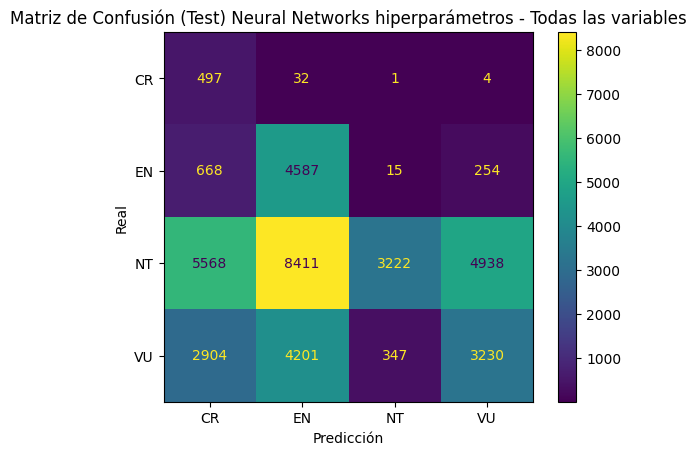

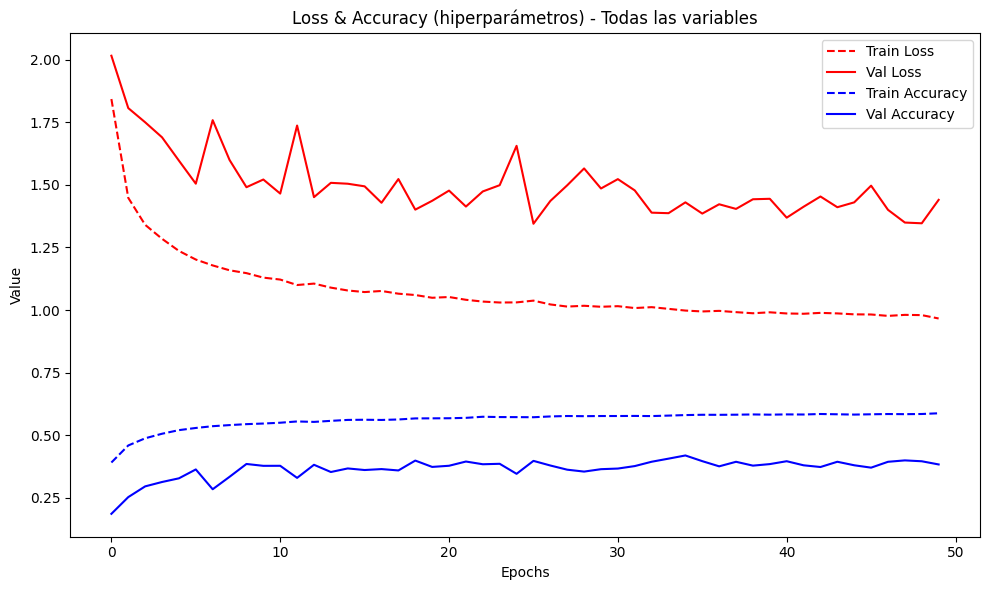

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Mejores hiperparámetros para Neural Networks - Variables significativas:
{'nn__batch_size': 16, 'nn__epochs': 50, 'nn__model__activation': 'relu', 'nn__model__dropout_rate': 0.2, 'nn__model__hidden_layer_sizes': (64, 32), 'nn__model__optimizer': 'adam'}


<Figure size 800x600 with 0 Axes>

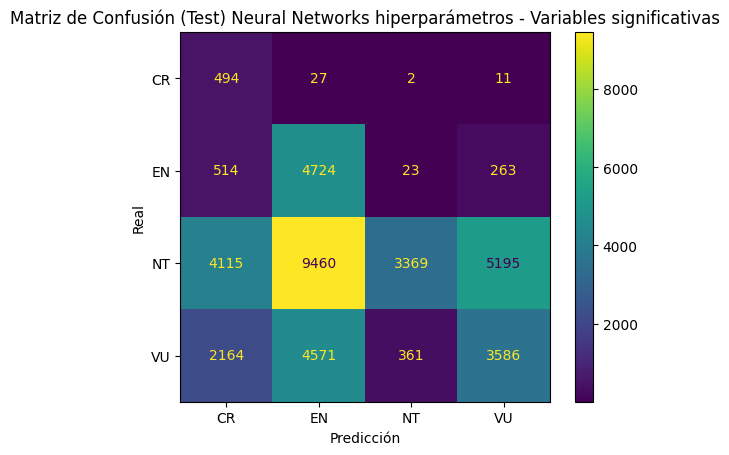

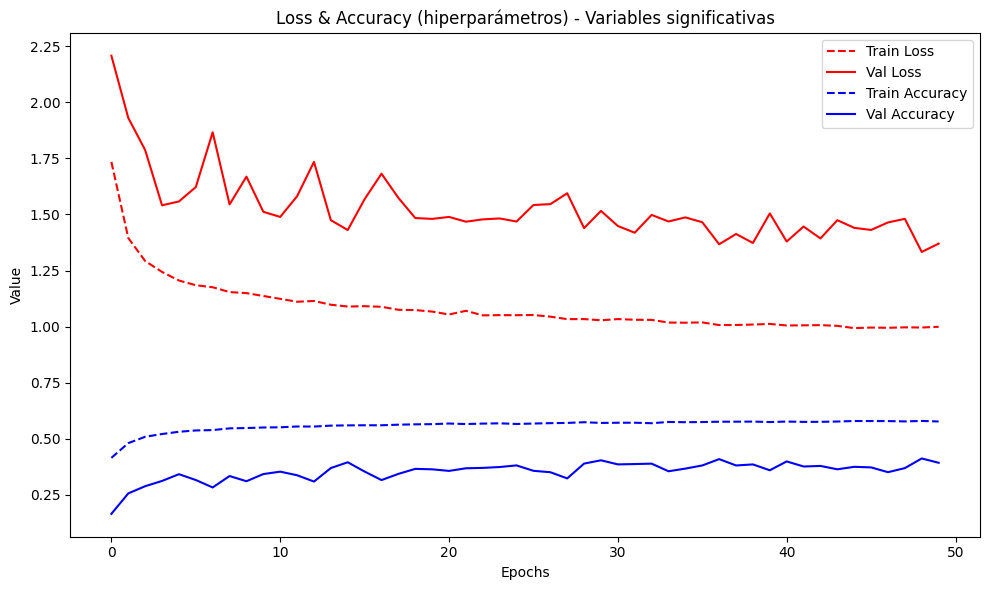

Resultados finales del algoritmo Neural Networks con ajuste de hiperparámetros


Datos  Test Accuracy  Test Recall  Test F1-score  \
0       Todas las variables       0.296715     0.552250       0.272369   
1  Variables significativas       0.313100     0.567038       0.284658   

   Test Roc-auc  Test Kappa  CV Accuracy  CV Recall_macro  CV F1_macro  \
0      0.766723    0.143979     0.310879         0.570530     0.287657   
1      0.781412    0.151766     0.309424         0.560879     0.279029   

   CV Roc-auc  CV Kappa  
0    0.775432  0.146951  
1    0.775570  0.148500

In [34]:
# Importación de bibliotecas necesarias para el modelo y evaluación
from scikeras.wrappers import KerasClassifier  # Wrapper para usar Keras con scikit-learn
from tensorflow.keras.models import Sequential  # Modelo secuencial de Keras
from tensorflow.keras.layers import Dense, Dropout, Input  # Capas densas, de abandono y de entrada
from tensorflow.keras.utils import to_categorical  # Codificación one-hot para etiquetas categóricas
from tensorflow.keras.optimizers import Adam, RMSprop  # Optimizadores comunes para redes neuronales
# Validación cruzada estratificada, evaluación por CV y búsqueda de hiperparámetros por CV
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.utils.class_weight import compute_class_weight  # Cálculo de pesos para clases desbalanceadas
from sklearn.metrics import (  # Métricas de evaluación
    accuracy_score, recall_score, f1_score, roc_auc_score,
    cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.preprocessing import MinMaxScaler # Normalización MinMax
from imblearn.over_sampling import SMOTE  # Técnica de sobremuestreo para equilibrar clases minoritarias
from imblearn.pipeline import Pipeline as ImbPipeline #Creación de pipelines

# # Definición de la función para entrenar, validar y evaluar una red neuronal con búsqueda de hiperparámetros y pipeline
def evaluate_nn_with_params(X_train, X_test, y_train, y_test, data_type):
    results = {'Datos': data_type}  # Diccionario para almacenar resultados
    num_classes = len(np.unique(y_train))  # Cantidad de clases distintas

    # Cálculo de pesos de clase para manejar desbalanceo
    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = dict(enumerate(class_weights))

    # Función para construir el modelo con hiperparámetros configurables
    def build_model(hidden_layer_sizes=(64,), activation='relu', optimizer='adam', dropout_rate=0.2):
        model = Sequential()
        model.add(Input(shape=(X_train.shape[1],)))  # Capa de entrada

        # Capas ocultas configurables
        for units in hidden_layer_sizes:
            model.add(Dense(units, activation=activation))
            model.add(Dropout(dropout_rate))

        # Capa de salida con activación softmax para clasificación multiclase
        model.add(Dense(num_classes, activation='softmax'))

        # Selección del optimizador
        opt = Adam() if optimizer == 'adam' else RMSprop()
        # Compilación del modelo con optimizador y función de pérdida categórica
        model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
        return model

    # Pipeline con escalado, SMOTE y red neuronal
    pipeline = ImbPipeline([
        ('scaler', MinMaxScaler()), # Escalado MinMax
        ('smote', SMOTE(random_state=42)), # Balanceo con SMOTE
        ('nn', KerasClassifier( # Clasificador con red neuronal
            model=build_model,
            loss="categorical_crossentropy",
            verbose=0,
            class_weight=class_weight_dict
        ))
    ])

    # Definición de la grilla de búsqueda de hiperparámetros de red neuronal
    param_grid = {
        'nn__model__hidden_layer_sizes': [(64,), (64, 32)],
        'nn__model__activation': ['relu', 'tanh'],
        'nn__model__optimizer': ['adam', 'rmsprop'],
        'nn__model__dropout_rate': [0.2, 0.5],
        'nn__epochs': [30, 50],
        'nn__batch_size': [16, 32]
    }

    # Búsqueda de hiperparámetros con validación cruzada (F1 macro como métrica)
    grid = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1_macro', n_jobs=-1, verbose=2)
    grid.fit(X_train, y_train)

    # Extraer el mejor pipeline y parámetros
    best_pipeline = grid.best_estimator_
    best_params = grid.best_params_
    print(f"Mejores hiperparámetros para Neural Networks - {data_type}:\n{best_params}")

    # Configura la validación cruzada estratificada de 5 particiones, con barajado
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Lista de métricas a evaluar usando cross_val_score
    for name, score in zip(['Accuracy', 'Recall_macro', 'F1_macro'], ['accuracy', 'recall_macro', 'f1_macro']):
        val = cross_val_score(best_pipeline, X_train, y_train, cv=cv, scoring=score).mean()
        results[f'CV {name}'] = val

    # Validación cruzada manual para calcular AUC y Kappa (no soportados directamente en cross_val_score)
    auc_scores, kappa_scores = [], []
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        # Entrena el modelo en el fold actual
        best_pipeline.fit(X_tr, y_tr)

        # Predicción de clases para calcular Kappa
        y_val_pred = best_pipeline.predict(X_val)

        # Intenta predecir probabilidades para calcular AUC (puede fallar si no se soporta)
        try:
            y_val_proba = best_pipeline.predict_proba(X_val)
            # AUC multiclase usando estrategia "one-vs-rest" y promedio macro
            auc = roc_auc_score(y_val, y_val_proba, multi_class='ovr', average='macro')
            auc_scores.append(auc)
        except:
            # Si no se puede calcular, añade un NaN
            auc_scores.append(np.nan)

        # Añade el valor de Kappa para el fold actual
        kappa_scores.append(cohen_kappa_score(y_val, y_val_pred))

    # Calcula el promedio de AUC (ignorando NaNs) y Kappa
    results['CV Roc-auc'] = np.nanmean(auc_scores)
    results['CV Kappa'] = np.mean(kappa_scores)

    # Entrena el modelo final sobre todo el conjunto de entrenamiento
    best_pipeline.fit(X_train, y_train)

    # Realiza predicciones sobre el conjunto de prueba
    y_pred = best_pipeline.predict(X_test)

    # Intenta calcular el AUC sobre el conjunto de prueba
    try:
        y_proba = best_pipeline.predict_proba(X_test)
        results['Test Roc-auc'] = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
    except:
        results['Test Roc-auc'] = 'N/A' # Si falla, se asigna 'N/A'

    # Calcula las métricas de evaluación en el conjunto de prueba
    results['Test Accuracy'] = accuracy_score(y_test, y_pred)  # Precisión
    results['Test Recall'] = recall_score(y_test, y_pred, average='macro')  # Recall macro
    results['Test F1-score'] = f1_score(y_test, y_pred, average='macro')  # F1-score macro
    results['Test Kappa'] = cohen_kappa_score(y_test, y_pred)  # Kappa de Cohen

    # Genera la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Define las etiquetas de clase en formato interpretable
    class_labels = ['CR', 'EN', 'NT', 'VU']

    # Inicializa el objeto para visualizar la matriz
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

    # Configura el tamaño de la figura
    plt.figure(figsize=(8, 6))

    # Muestra la matriz con estilo viridis y valores como enteros
    disp.plot(cmap='viridis', values_format='d')

    # Título ejes
    plt.title(f'Matriz de Confusión (Test) Neural Networks hiperparámetros - {data_type}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')

    # Muestra el gráfico
    plt.show()

    # ENTRENAMIENTO para visualizar curvas de entrenamiento
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_train_res, y_train_res = SMOTE(random_state=42).fit_resample(X_train_scaled, y_train)
    y_train_cat = to_categorical(y_train_res, num_classes=num_classes)

    # Construye y entrena el modelo con los mejores parámetros para monitorear el desempeño
    final_model = build_model(
        hidden_layer_sizes=best_params['nn__model__hidden_layer_sizes'],
        activation=best_params['nn__model__activation'],
        optimizer=best_params['nn__model__optimizer'],
        dropout_rate=best_params['nn__model__dropout_rate']
    )
    history = final_model.fit(
        X_train_res, y_train_cat,
        epochs=best_params['nn__epochs'],
        batch_size=best_params['nn__batch_size'],
        class_weight=class_weight_dict,
        verbose=0, validation_split=0.2
    )

    # Visualización de curvas de pérdida y precisión
    plt.figure(figsize=(10, 6)) # Configura el tamaño de la figura

    # Curvas de pérdida (entrenamiento y validación)
    plt.plot(history.history['loss'], label='Train Loss', linestyle='--', color='red')
    plt.plot(history.history['val_loss'], label='Val Loss', linestyle='-', color='red')

    # Curvas de precisión (entrenamiento y validación)
    plt.plot(history.history['accuracy'], label='Train Accuracy', linestyle='--', color='blue')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy', linestyle='-', color='blue')

    # Título ejes
    plt.title(f'Loss & Accuracy (hiperparámetros) - {data_type}')
    plt.xlabel('Epochs')
    plt.ylabel('Value')

    # Leyenda para identificar curvas
    plt.legend()

    # Ajusta el diseño para que no se superpongan los elementos
    plt.tight_layout()

    # Muestra el gráfico
    plt.show()

    # Devuelve el diccionario con todas las métricas
    return results

# Ejecuta la función de evaluación con hiperparámetros sobre cada conjunto de datos

# Inicializa lista para almacenar resultados de los datasets
nn_tuned_results = []

# Todas las variables
nn_tuned_results.append(evaluate_nn_with_params(X_train.values, X_test.values, y_train.values, y_test.values, 'Todas las variables'))

# Variables significativas
nn_tuned_results.append(evaluate_nn_with_params(X_sig_train.values, X_sig_test.values, y_sig_train.values, y_sig_test.values, 'Variables significativas'))

# Crea un DataFrame con todos los resultados recopilados
nn_tuned_df = pd.DataFrame(nn_tuned_results)

# Muestra los resultados seleccionados de forma tabular
print("Resultados finales del algoritmo Neural Networks con ajuste de hiperparámetros")
display(nn_tuned_df[
    ['Datos', 'Test Accuracy', 'Test Recall', 'Test F1-score', 'Test Roc-auc', 'Test Kappa',
     'CV Accuracy', 'CV Recall_macro', 'CV F1_macro', 'CV Roc-auc', 'CV Kappa']
])


Interpretabilidad con SHAP y mapas predictivos con el algoritmo XGBoost con ajuste de hiperparámetros y variables significativas

c:\Users\Jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\Jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:53:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Mejores hiperparámetros para XGBoost - Variables significativas :
 - xgb__booster: gbtree
 - xgb__learning_rate: 0.1
 - xgb__max_depth: 9
 - xgb__n_estimators: 200


<Figure size 800x600 with 0 Axes>

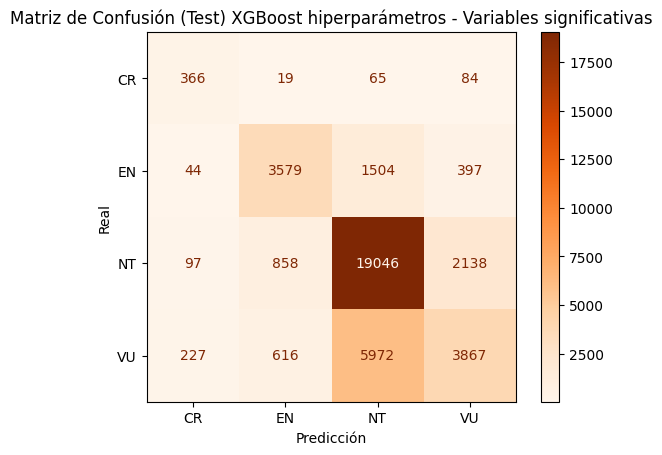


Interpretabilidad SHAP:
SHAP Summary plot para clase 0 (primeras 50 instancias):


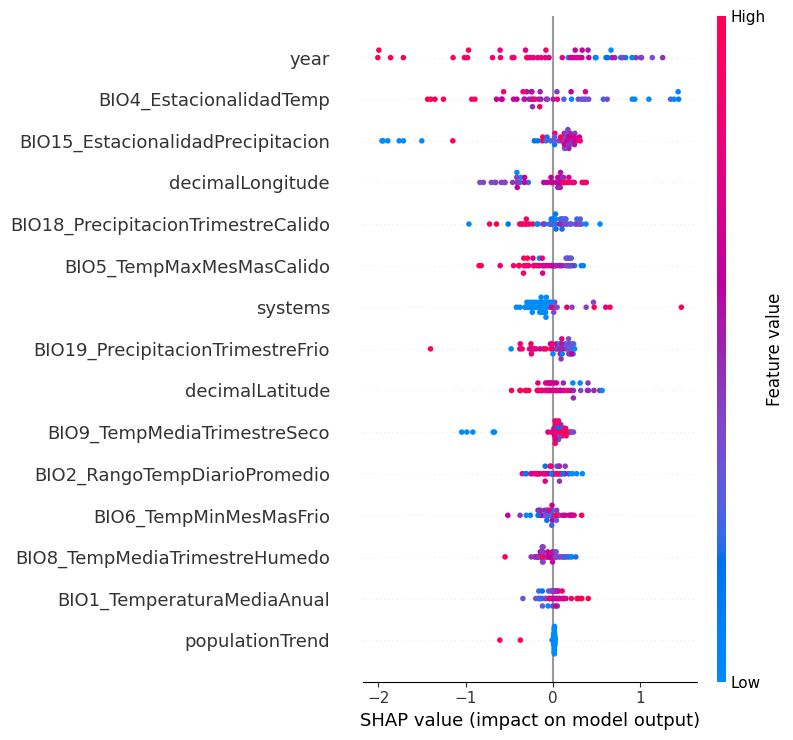

SHAP Summary plot para clase 1 (primeras 50 instancias):


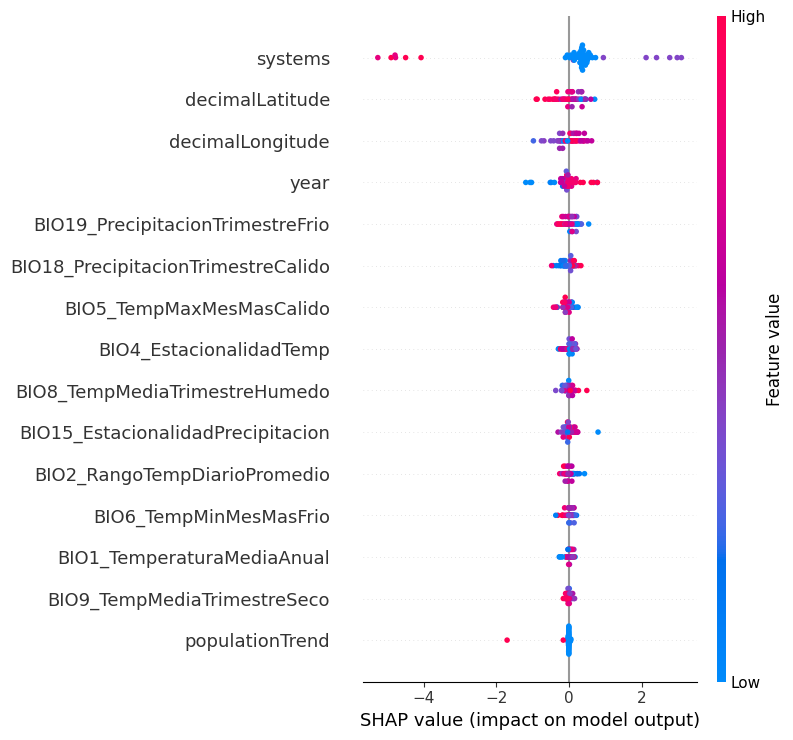

SHAP Summary plot para clase 2 (primeras 50 instancias):


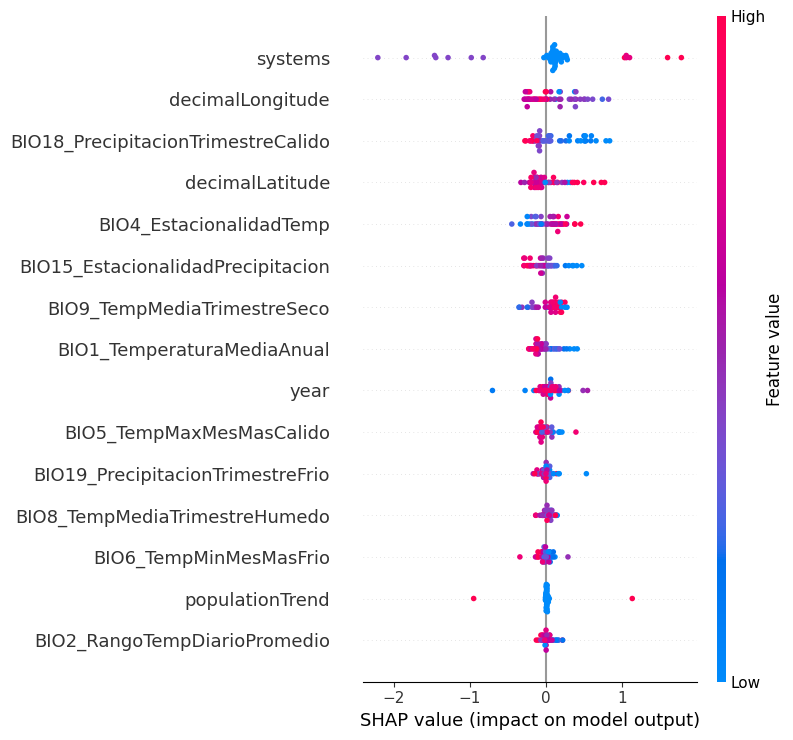

SHAP Summary plot para clase 3 (primeras 50 instancias):


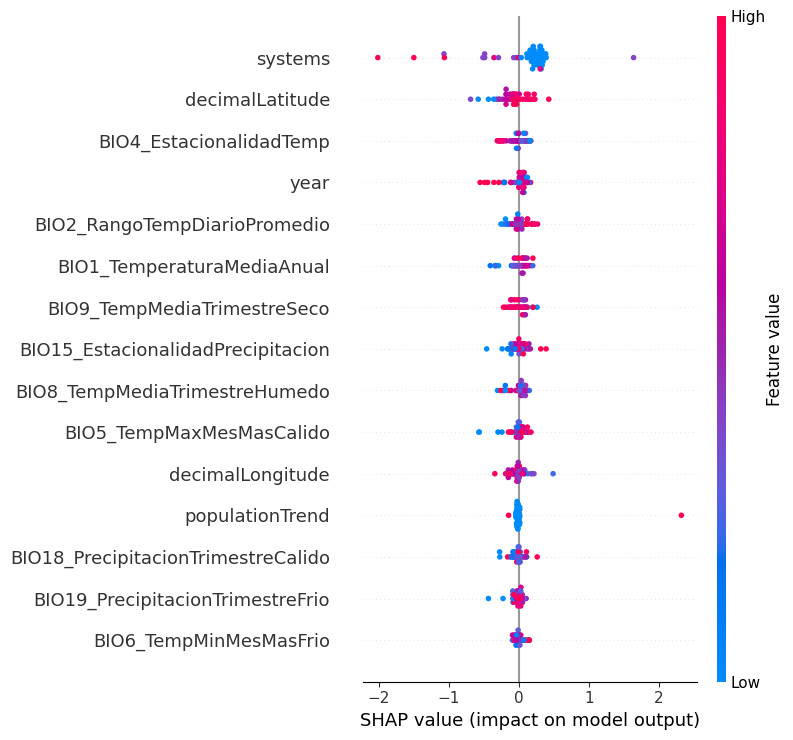

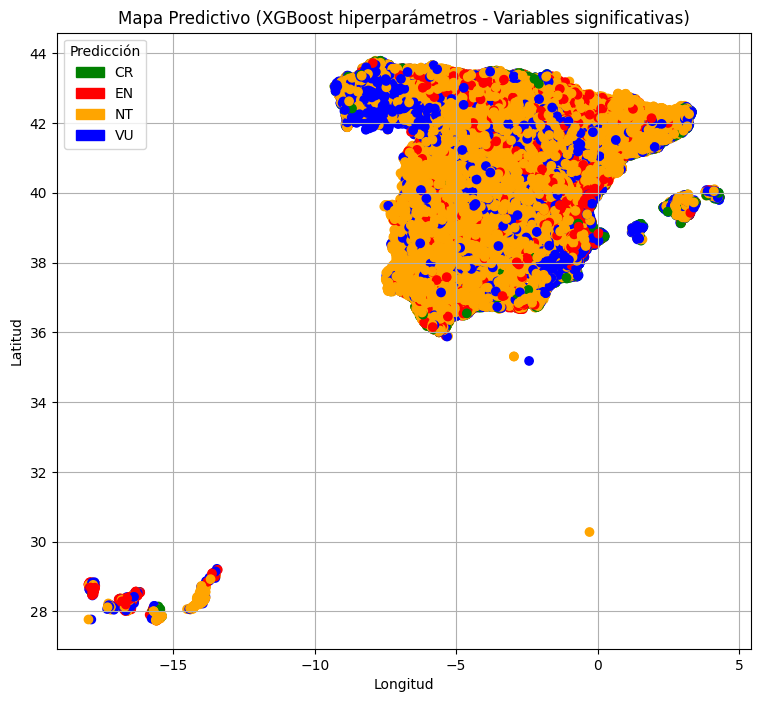

Mapa interactivo guardado como mapa_predictivo_XGBoost_hiperparametros_variables_significativas.html

Resultados finales del algoritmo XGBoost con ajuste de hiperparámetros:


Datos  Test Accuracy  Test Recall  Test F1-score  \
0  Variables significativas        0.69081     0.638899       0.621268   

   Test Roc-auc  Test Kappa  CV Accuracy  CV Recall_macro  CV F1_macro  \
0      0.857819    0.433686     0.687269         0.630911     0.613959   

   CV Roc-auc  CV Kappa  
0    0.860157  0.426827

In [84]:
# Importación de bibliotecas necesarias
from xgboost import XGBClassifier # Clasificador XGBoost
# Validación cruzada estratificada, evaluación por CV y búsqueda de hiperparámetros por CV
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import ( # Métricas de evaluación
    accuracy_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score
)
# Técnica de sobremuestreo para equilibrar clases minoritarias
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline #Creación de pipelines
import shap # Interpretabilidad con SHAP
# Interpretabilidad con LIME
import lime
import lime.lime_tabular
# Librería GeoPandas, que extiende pandas para trabajar con datos geoespaciales (datos con coordenadas y geometrías)
import geopandas as gpd
# Clase Point de Shapely que permite crear objetos geométricos de tipo punto (coordenadas X, Y).
from shapely.geometry import Point
# Librería Folium para crear mapas interactivos basados en Leaflet.js desde Python.
import folium
# Template y MacroElement de Branca se usan para añadir elementos HTML/CSS personalizados a los mapas de Folium.
from branca.element import Template, MacroElement
import matplotlib.patches as mpatches # Para crear leyenda con diferentes colores

# Función para buscar mejores hiperparámetros de XGBoost
def get_best_xgb_params(X, y, data_type):

    # Definimos la malla de hiperparámetros para el modelo XGBoost
    param_grid = {
        'xgb__n_estimators': [10, 50, 100, 200],
        'xgb__max_depth': [3, 5, 7, 9],
        'xgb__learning_rate': [0.01, 0.1, 1.0, 2.0],
        'xgb__booster': ['gbtree', 'gblinear', 'dart']
    }

    # Definición del modelo base XGBoost con configuración fija
    xgb = XGBClassifier(
        use_label_encoder=False,
        eval_metric='mlogloss',
        objective='multi:softprob',
        random_state=42
    )

    # Pipeline de procesamiento y modelado con técnicas de balanceo
    pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=42)), # Balanceo con SMOTE
        ('xgb', xgb) # Algoritmo XGBoost para entrenar
    ])

    # Configura la validación cruzada estratificada de 5 particiones, con barajado
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Búsqueda de hiperparámetros con GridSearch mediante validación cruzada y puntuación basada en F1-score macro
    grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring='f1_macro', n_jobs=-1)
    # Ajuste del modelo con búsqueda de hiperparámetros
    grid.fit(X, y)

    # Recuperar los hiperparámetros óptimos encontrados
    print(f"Mejores hiperparámetros para XGBoost - {data_type} :")
    for k, v in grid.best_params_.items():
        print(f" - {k}: {v}")

    # Obtener esos mejores hiperparámetros
    return grid.best_params_

# Función para ajustar hiperparámetros, entrenar y evaluar XGBoost
def evaluate_xgb_with_params(X_train, X_test, y_train, y_test, data_type, best_params, feature_names):
    results = {} # Diccionario para almacenar las métricas de evaluación

    # Diseño del modelo XGBoost con los mejores hiperparámetros encontrados con la función
    xgb = XGBClassifier(
        eval_metric='mlogloss',
        objective='multi:softprob',
        random_state=42,
        n_estimators=best_params['xgb__n_estimators'],
        max_depth=best_params['xgb__max_depth'],
        learning_rate=best_params['xgb__learning_rate'],
        booster=best_params['xgb__booster']
    )

    # Pipeline de procesamiento y modelado con técnicas de balanceo
    pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=42)), # Balanceo con SMOTE
        ('xgb', xgb) # Algoritmo XGBoost con hiperparámetros para entrenar
    ])

    # Configura la validación cruzada estratificada de 5 particiones, con barajado
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Recorre cada métrica para evaluarla mediante validación cruzada
    for metric in ['accuracy', 'recall_macro', 'f1_macro']:
        # Calcula la media de la métrica en las 5 particiones
        score = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=metric).mean()
        # Guarda la métrica con formato legible
        results[f'CV {metric.capitalize()}'] = score

    # Inicializa listas para guardar AUC y Kappa por cada fold manualmente
    auc_scores, kappa_scores = [], []

    # Validación cruzada manual para calcular AUC y Kappa (no soportados directamente en cross_val_score)
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        # Entrena el modelo en el fold actual
        pipeline.fit(X_tr, y_tr)

        # Intenta predecir probabilidades para calcular AUC (puede fallar si no se soporta)
        try:
            probas = pipeline.predict_proba(X_val)
            # AUC multiclase usando estrategia "one-vs-rest" y promedio macro
            auc = roc_auc_score(y_val, probas, multi_class='ovr', average='macro')
            auc_scores.append(auc)
        except:
            # Si no se puede calcular, añade un NaN
            auc_scores.append(np.nan)

        # Predicción de clases para calcular Kappa
        y_val_pred = pipeline.predict(X_val)
        # Añade el valor de Kappa para el fold actual
        kappa_scores.append(cohen_kappa_score(y_val, y_val_pred))

    # Calcula el promedio de AUC (ignorando NaNs) y Kappa
    results['CV Roc-auc'] = np.nanmean(auc_scores)
    results['CV Kappa'] = np.mean(kappa_scores)

    # Entrena el modelo final sobre todo el conjunto de entrenamiento
    pipeline.fit(X_train, y_train)

    # Realiza predicciones sobre el conjunto de prueba
    y_pred = pipeline.predict(X_test)

    # Almacena el tipo de datos evaluado
    results['Datos'] = data_type

    # Calcula las métricas de evaluación en el conjunto de prueba
    results['Test Accuracy'] = accuracy_score(y_test, y_pred) # Precisión
    results['Test Recall'] = recall_score(y_test, y_pred, average='macro') # Recall macro
    results['Test F1-score'] = f1_score(y_test, y_pred, average='macro')  # F1-score macro
    results['Test Kappa'] = cohen_kappa_score(y_test, y_pred) # Kappa de Cohen

    # Intenta calcular el AUC sobre el conjunto de prueba
    try:
        y_proba = pipeline.predict_proba(X_test)
        results['Test Roc-auc'] = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
    except:
        results['Test Roc-auc'] = 'N/A' # Si falla, se asigna 'N/A'

    # Genera la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Define las etiquetas de clase en formato interpretable
    class_labels = ['CR', 'EN', 'NT', 'VU']

    # Inicializa el objeto para visualizar la matriz
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

    # Configura el tamaño de la figura
    plt.figure(figsize=(8, 6))

    # Muestra la matriz con estilo naranja y valores como enteros
    disp.plot(cmap='Oranges', values_format='d')

    # Título ejes
    plt.title(f'Matriz de Confusión (Test) XGBoost hiperparámetros - {data_type}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')

    # Muestra el gráfico
    plt.show()

    # ---- INTERPRETABILIDAD ----

    print("\nInterpretabilidad SHAP:")
    explainer = shap.Explainer(pipeline.named_steps['xgb'], X_train)

    # Calculamos la explicación para las primeras 50 instancias
    shap_expl = explainer(X_test[:50])

    for i in range(0,4):
       # Summary plot para cada clase 
        print(f"SHAP Summary plot para clase {i} (primeras 50 instancias):")
        shap.summary_plot(
            shap_expl.values[:, :, i],      
            X_test[:50], 
            feature_names
        )

        
    # ----- MAPAS PREDICTIVOS GEOESPACIALES -----

    # Si X_test no es un DataFrame, lo convertimos a DataFrame con nombres de columnas específicos
    if not isinstance(X_test, pd.DataFrame):
        X_test_df = pd.DataFrame(X_test, columns=['decimalLatitude', 'decimalLongitude', 'year', 'populationTrend', 'systems',
                                                  'BIO1_TemperaturaMediaAnual', 'BIO2_RangoTempDiarioPromedio', 'BIO4_EstacionalidadTemp',
                                                  'BIO5_TempMaxMesMasCalido', 'BIO6_TempMinMesMasFrio', 'BIO8_TempMediaTrimestreHumedo',
                                                  'BIO9_TempMediaTrimestreSeco', 'BIO15_EstacionalidadPrecipitacion',
                                                  'BIO18_PrecipitacionTrimestreCalido', 'BIO19_PrecipitacionTrimestreFrio'])
    else:
        # Si ya es DataFrame, hacemos una copia para evitar modificar el original
        X_test_df = X_test.copy()
    
    # Extraemos latitudes y longitudes en tipo float
    latitudes = X_test_df['decimalLatitude'].astype(float)
    longitudes = X_test_df['decimalLongitude'].astype(float)
    
    # Creamos una lista de objetos Point (de Shapely) a partir de las coordenadas (longitud, latitud)
    geometry = [Point(xy) for xy in zip(longitudes, latitudes)]
    
    # Creamos un GeoDataFrame con la predicción y la geometría (puntos), usando el sistema de coordenadas WGS84 (EPSG:4326)
    gdf_pred = gpd.GeoDataFrame({'prediccion': y_pred}, geometry=geometry, crs="EPSG:4326")
    
    # Diccionarios para colores y nombres originales de las clases
    color_map = {0: 'green', 1: 'red', 2: 'orange', 3: 'blue'}
    nombres_clases = {0: 'CR', 1: 'EN', 2: 'NT', 3: 'VU'}
    
    # Añadimos columna de color para el mapa estático
    gdf_pred['color'] = gdf_pred['prediccion'].map(color_map)
    
    # --- Mapa estático con Matplotlib y GeoPandas ---

    # Creamos figura y ejes con tamaño específico
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Graficamos usando colores personalizados
    gdf_pred.plot(color=gdf_pred['color'], ax=ax, legend=False)

    # Título y ejes
    plt.title(f'Mapa Predictivo (XGBoost hiperparámetros - {data_type})')
    plt.xlabel("Longitud")
    plt.ylabel("Latitud")

    # Mostrar rejilla
    plt.grid(True)
    
    # Leyenda manual con nombres originales
    handles = [mpatches.Patch(color=color_map[k], label=nombres_clases[k]) for k in color_map]
    plt.legend(handles=handles, title="Predicción")

    # Mostrar la figura
    plt.show()
    
    # --- Mapa interactivo con Folium ---

    # Calcular el centro del mapa como la media de las latitudes y longitudes
    center = [latitudes.mean(), longitudes.mean()]

    # Crear el mapa centrado y con zoom inicial 7
    m = folium.Map(location=center, zoom_start=7)
    
    # Añadir marcadores circulares para cada punto con color según la predicción
    for lat, lon, pred in zip(latitudes, longitudes, y_pred):
        folium.CircleMarker(
            location=[lat, lon], # Coordenadas del punto
            radius=4, # Tamaño del marcador
            color=color_map.get(pred), # Color según la clase predicha
            fill=True, # Relleno del círculo
            fill_opacity=0.7, # Opacidad del relleno
            popup=f"Predicción: {nombres_clases.get(pred)}" # Texto que aparece al hacer clic
        ).add_to(m)
    
    # Plantilla HTML para crear una leyenda personalizada en el mapa Folium
    template = """
    {% macro html(this, kwargs) %}
    <div style="
        position: fixed; 
        bottom: 50px; left: 50px; width: 150px; height: 130px; 
        background-color: white; 
        border:2px solid grey; 
        z-index:9999; 
        font-size:14px;
        ">
        &nbsp;<b> Leyenda Clases </b> <br>
        &nbsp;<i class="fa fa-circle fa-1x" style="color:green"></i>&nbsp; CR:0 <br>
        &nbsp;<i class="fa fa-circle fa-1x" style="color:red"></i>&nbsp; EN:1 <br>
        &nbsp;<i class="fa fa-circle fa-1x" style="color:orange"></i>&nbsp; NT:2 <br>
        &nbsp;<i class="fa fa-circle fa-1x" style="color:blue"></i>&nbsp; VU:3 <br>
    </div>
    {% endmacro %}
    """

    # Crear un elemento macro para incluir la plantilla HTML en el mapa
    macro = MacroElement()
    macro._template = Template(template)
    m.get_root().add_child(macro)
    
    # Guardar y mostrar mapa interactivo
    m.save(f"mapa_predictivo_XGBoost_hiperparametros_{data_type.replace(' ', '_').lower()}.html")
    print(f"Mapa interactivo guardado como mapa_predictivo_XGBoost_hiperparametros_{data_type.replace(' ', '_').lower()}.html")
    
    m  # Para mostrar el mapa en notebook

    # Devuelve el diccionario con todas las métricas
    return results

# Ejecuta las funciones

# Inicializa lista para almacenar resultados
xgb_tuned_results = []

# Buscar mejores hiperparámetros usando solo las variables significativas
best_xgb_params_sig = get_best_xgb_params(X_sig_train.values, y_sig_train.values, 'Variables significativas')
feature_names = list(X_sig_train.columns)  
# Evaluar el modelo con variables significativas
xgb_tuned_results.append(evaluate_xgb_with_params(X_sig_train.values, X_sig_test.values, y_sig_train.values, y_sig_test.values,'Variables significativas', best_params=best_xgb_params_sig,feature_names=feature_names))

# Mostrar resultados finales en tabla
xgb_tuned_df = pd.DataFrame(xgb_tuned_results)

print("\nResultados finales del algoritmo XGBoost con ajuste de hiperparámetros:")
display(xgb_tuned_df[
    ['Datos',
     'Test Accuracy', 'Test Recall', 'Test F1-score', 'Test Roc-auc', 'Test Kappa',
     'CV Accuracy', 'CV Recall_macro', 'CV F1_macro', 'CV Roc-auc', 'CV Kappa']
])